In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import random

In [ ]:
sns.set()
sns.set_context('notebook',font_scale=1.2)
sns.set_style("darkgrid")
sns.set_palette(palette='deep')
pd.set_option("display.max_columns",None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
user_data=pd.read_csv('/content/drive/MyDrive/DSBA Projects/Capstone 1/Social Media Data for DSBA.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Data Report

### 2.a) Understanding how data was collected in terms of time, frequency and methodology
Please Refer the Project File

### 2.b) Visual inspection of data (rows, columns, descriptive details)

In [ ]:
user_data.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
print(f"The number of Observation (rows): {user_data.shape[0]} \n The number of Variables (columns): {user_data.shape[1]}")

The number of Observation (rows): 11760 
 The number of Variables (columns): 17


### Duplicate Observations

In [ ]:
print(f'The number of duplicate observations: {user_data.duplicated().sum()}')

The number of duplicate observations: 0


In [ ]:
#As there are no duplicate observation we can drop the UserID column
user_data.drop('UserID',axis=1,inplace=True)

### Missing Values

In [ ]:
missing = pd.DataFrame(user_data.isnull().sum())
missing.reset_index(inplace=True)
missing.columns = ['Variables','Missing_values']
missing.sort_values('Missing_values',ascending=False)

Variables  Missing_values
1                 Yearly_avg_view_on_travel_page             581
3        total_likes_on_outstation_checkin_given             381
7              Yearly_avg_comment_on_travel_page             206
10                        following_company_page             103
4                 yearly_avg_Outstation_checkins              75
2                               preferred_device              53
6                        preferred_location_type              31
0                                  Taken_product               0
5                               member_in_family               0
8   total_likes_on_outofstation_checkin_received               0
9             week_since_last_outstation_checkin               0
11            montly_avg_comment_on_company_page               0
12                                  working_flag               0
13                     travelling_network_rating               0
14                                    Adult_flag               0
15        Daily_Avg_mins_spend_on_traveling_page               0

In [ ]:
import textwrap
labels = list(missing.sort_values(by = 'Missing_values',ascending=False)['Variables'])
lbs = []
for l in labels:
    lbs.append(textwrap.fill(l,width=10))
lbs

['Yearly_avg\n_view_on_t\nravel_page',
 'total_like\ns_on_outst\nation_chec\nkin_given',
 'Yearly_avg\n_comment_o\nn_travel_p\nage',
 'following_\ncompany_pa\nge',
 'yearly_avg\n_Outstatio\nn_checkins',
 'preferred_\ndevice',
 'preferred_\nlocation_t\nype',
 'Taken_prod\nuct',
 'member_in_\nfamily',
 'total_like\ns_on_outof\nstation_ch\neckin_rece\nived',
 'week_since\n_last_outs\ntation_che\nckin',
 'montly_avg\n_comment_o\nn_company_\npage',
 'working_fl\nag',
 'travelling\n_network_r\nating',
 'Adult_flag',
 'Daily_Avg_\nmins_spend\n_on_travel\ning_page']

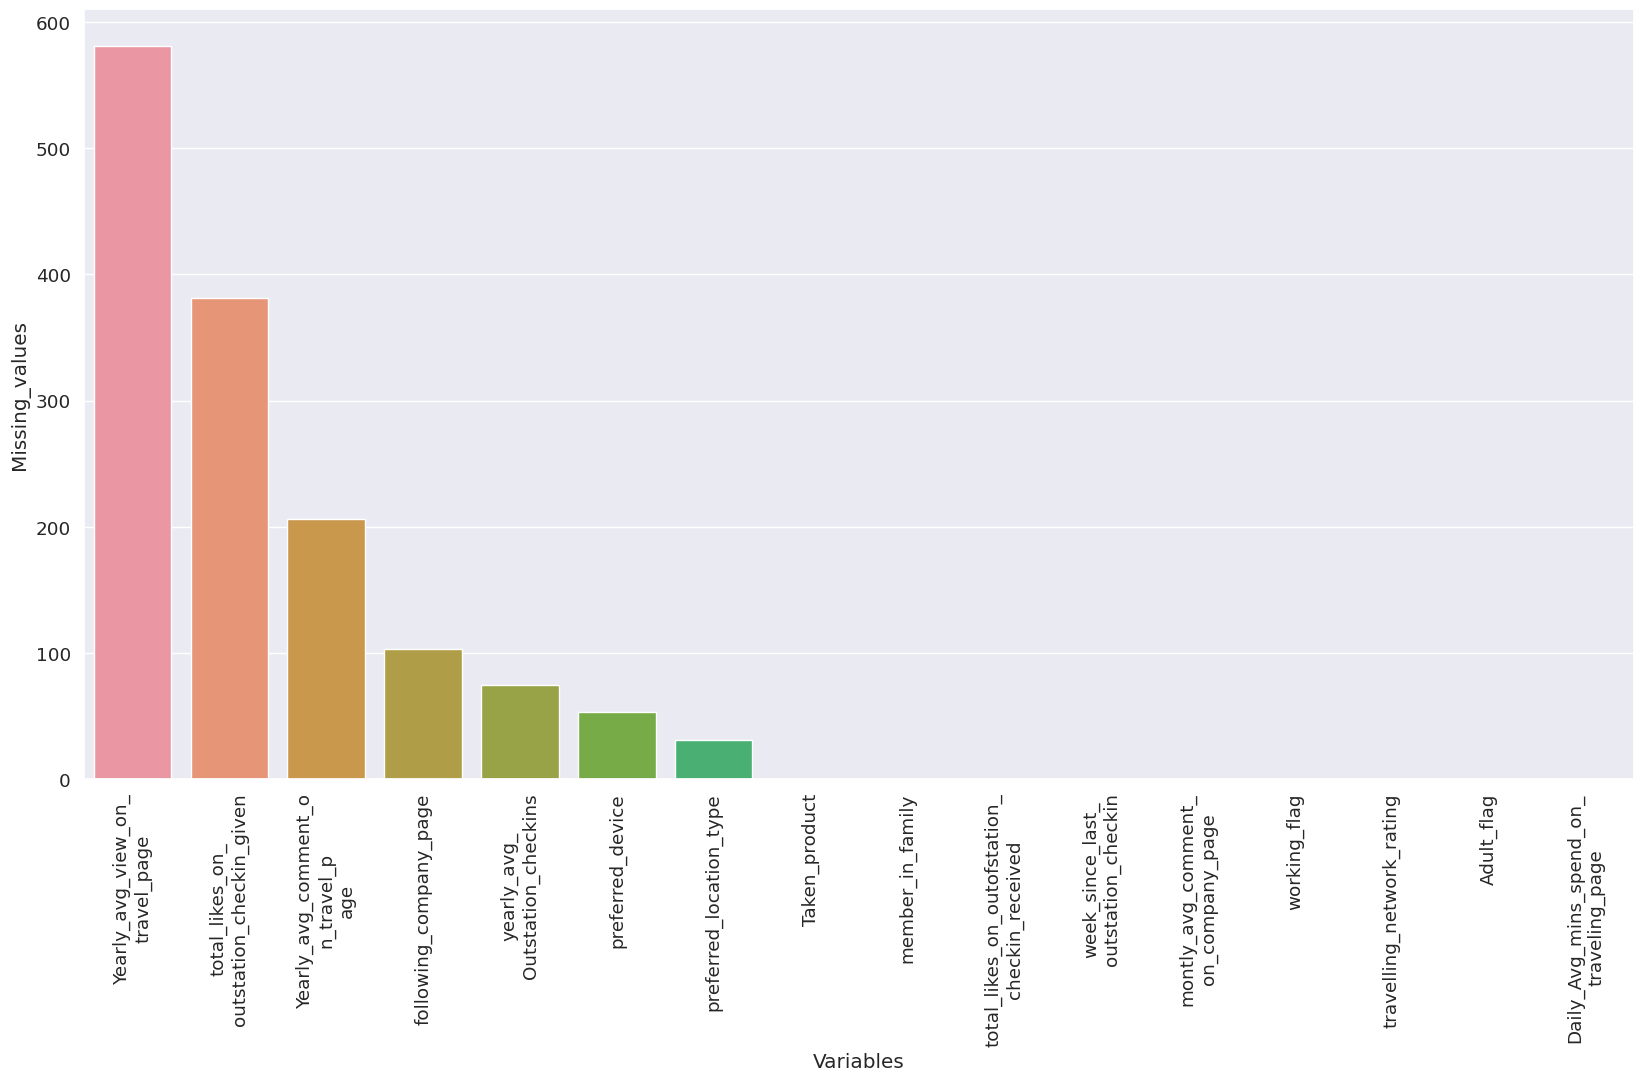

In [ ]:
# Plotting the number of missing values per variable
fig,axes = plt.subplots(figsize=(20,10))
sns.barplot(x='Variables',y='Missing_values',data=missing.sort_values(by='Missing_values',ascending=False))
axes.set_xticklabels(labels =['Yearly_avg_view_on_\ntravel_page',
 'total_likes_on_\noutstation_checkin_given',
 'Yearly_avg_comment_o\nn_travel_p\nage',
 'following_company_page',
 'yearly_avg_\nOutstation_checkins',
 'preferred_device',
 'preferred_location_type',
 'Taken_product',
 'member_in_family',
 'total_likes_on_outofstation_\ncheckin_received',
 'week_since_last_\noutstation_checkin',
 'montly_avg_comment_\non_company_page',
 'working_flag',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_\ntraveling_page'] ,rotation=90)
plt.show()

In [ ]:
round(user_data.isnull().sum() / len(user_data),3).sort_values()

Taken_product                                   0.000
member_in_family                                0.000
total_likes_on_outofstation_checkin_received    0.000
week_since_last_outstation_checkin              0.000
montly_avg_comment_on_company_page              0.000
working_flag                                    0.000
travelling_network_rating                       0.000
Adult_flag                                      0.000
Daily_Avg_mins_spend_on_traveling_page          0.000
preferred_location_type                         0.003
preferred_device                                0.005
yearly_avg_Outstation_checkins                  0.006
following_company_page                          0.009
Yearly_avg_comment_on_travel_page               0.018
total_likes_on_outstation_checkin_given         0.032
Yearly_avg_view_on_travel_page                  0.049
dtype: float64

In [ ]:
print('Number of Rows with atleast 1 missing values: ',user_data[user_data.isnull().sum(axis=1)>0].shape[0])

Number of Rows with atleast 1 missing values:  1304


In [ ]:
print('Percentage of Rows with atleast 1 missing values: {}%'.format(round((user_data[user_data.isnull().sum(axis=1)>0].shape[0] / user_data.shape[0])*100,2)))

Percentage of Rows with atleast 1 missing values: 11.09%


In [ ]:
print("Total Missing value proportion in the given data",round(user_data.isnull().sum().sum() / user_data.size,4))

Total Missing value proportion in the given data 0.0076


In [ ]:
round(user_data.describe().T,3)

count       mean        std  \
Yearly_avg_view_on_travel_page                11179.0    280.831     68.183   
total_likes_on_outstation_checkin_given       11379.0  28170.482  14385.032   
Yearly_avg_comment_on_travel_page             11554.0     74.790     24.027   
total_likes_on_outofstation_checkin_received  11760.0   6531.699   4706.614   
week_since_last_outstation_checkin            11760.0      3.204      2.616   
montly_avg_comment_on_company_page            11760.0     28.662     48.661   
travelling_network_rating                     11760.0      2.712      1.081   
Adult_flag                                    11760.0      0.794      0.852   
Daily_Avg_mins_spend_on_traveling_page        11760.0     13.817      9.071   

                                                 min       25%      50%  \
Yearly_avg_view_on_travel_page                  35.0    232.00    271.0   
total_likes_on_outstation_checkin_given       3570.0  16380.00  28076.0   
Yearly_avg_comment_on_travel_page                3.0     57.00     75.0   
total_likes_on_outofstation_checkin_received  1009.0   2940.75   4948.0   
week_since_last_outstation_checkin               0.0      1.00      3.0   
montly_avg_comment_on_company_page              11.0     17.00     22.0   
travelling_network_rating                        1.0      2.00      3.0   
Adult_flag                                       0.0      0.00      1.0   
Daily_Avg_mins_spend_on_traveling_page           0.0      8.00     12.0   

                                                   75%       max  
Yearly_avg_view_on_travel_page                  324.00     464.0  
total_likes_on_outstation_checkin_given       40525.00  252430.0  
Yearly_avg_comment_on_travel_page                92.00     815.0  
total_likes_on_outofstation_checkin_received   8393.25   20065.0  
week_since_last_outstation_checkin                5.00      11.0  
montly_avg_comment_on_company_page               27.00     500.0  
travelling_network_rating                         4.00       4.0  
Adult_flag                                        1.00       3.0  
Daily_Avg_mins_spend_on_traveling_page           18.00     270.0

<Axes: xlabel='preferred_device', ylabel='count'>

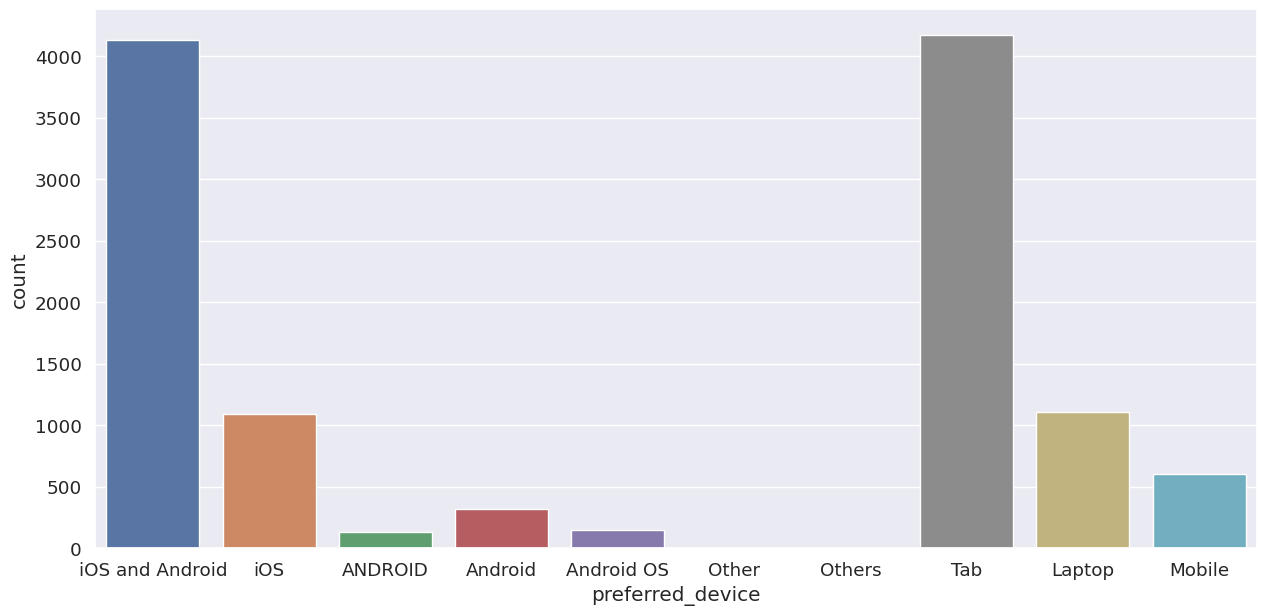

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=user_data, x='preferred_device')

In [ ]:
user_data['preferred_device'] =user_data['preferred_device'].replace("Android", "Android OS")
user_data['preferred device'] =user_data['preferred_device'].replace("ANDROID", "Android OS")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("Other","Others")

<Axes: xlabel='preferred_device', ylabel='count'>

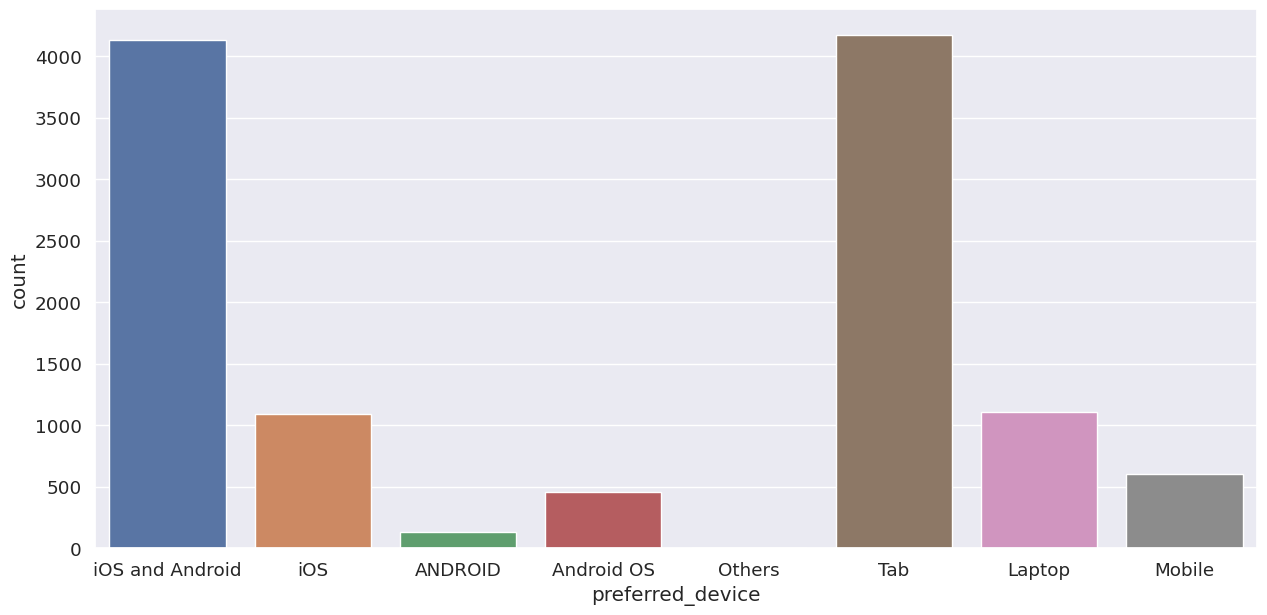

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=user_data, x='preferred_device')

In [ ]:
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("Android OS", "Mobile")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("Other","Mobile")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("iOS and Android","Mobile")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("Mobile","Mobile")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("iOS","Mobile")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("Tab","Mobile")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("Others","Mobile")
user_data[ 'preferred_device'] =user_data['preferred_device'].replace("ANDROID","Mobile")

<Axes: xlabel='preferred_device', ylabel='count'>

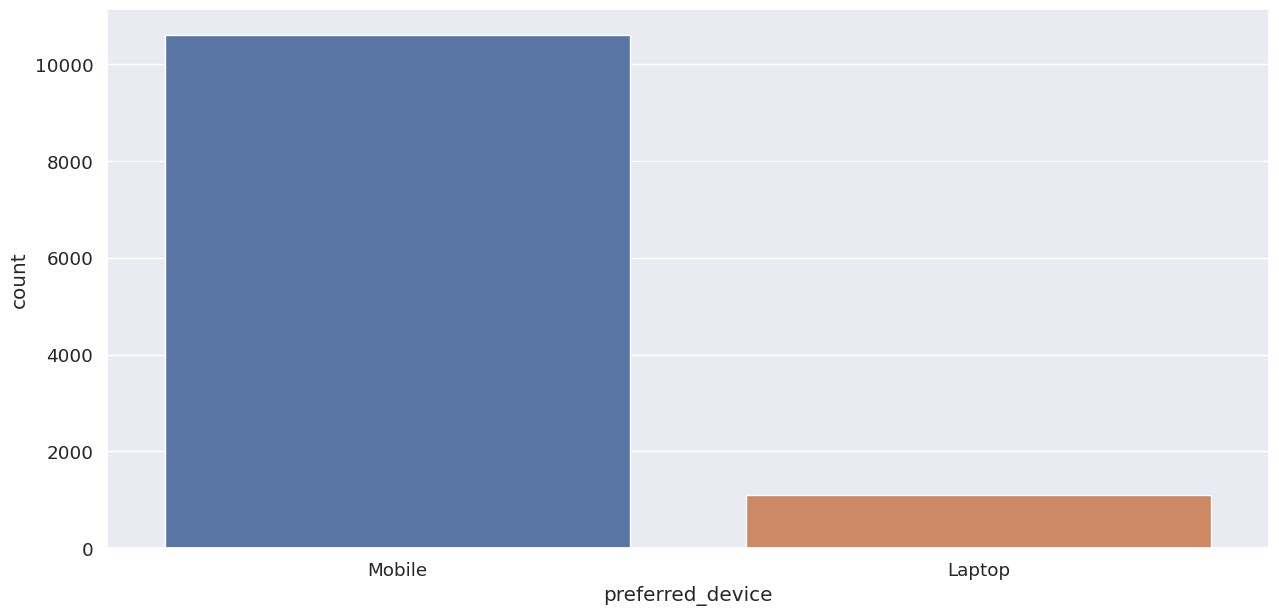

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=user_data, x='preferred_device')

In [ ]:
user_data[['preferred_device']].describe()

preferred_device
count             11707
unique                2
top              Mobile
freq              10599

In [ ]:
user_data.describe(include=['object']).T

count unique     top   freq
Taken_product                   11760      2      No   9864
preferred_device                11707      2  Mobile  10599
yearly_avg_Outstation_checkins  11685     30       1   4543
member_in_family                11760      7       3   4561
preferred_location_type         11729     15   Beach   2424
following_company_page          11657      4      No   8355
working_flag                    11760      2      No   9952
preferred device                11707      8     Tab   4172

In [ ]:
user_data['travelling_network_rating'].value_counts()

3    3672
4    3456
2    2424
1    2208
Name: travelling_network_rating, dtype: int64

In [ ]:
user_data['Adult_flag'].value_counts()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

In [ ]:
user_data['preferred_device'].value_counts()

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [ ]:
user_data['yearly_avg_Outstation_checkins'].value_counts()

1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64

In [ ]:
user_data['Taken_product'].value_counts()

No     9864
Yes    1896
Name: Taken_product, dtype: int64

<Axes: xlabel='Taken_product', ylabel='count'>

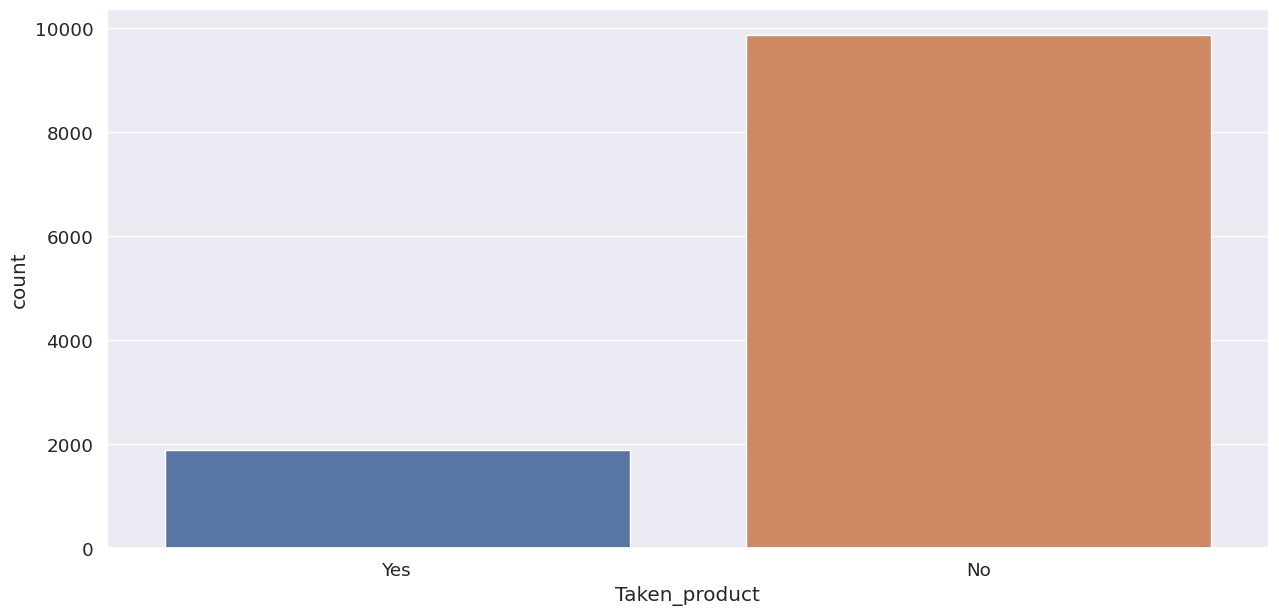

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=user_data, x='Taken_product')

In [ ]:
user_data['preferred_location_type'].value_counts()

In [ ]:
user_data['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

<Axes: xlabel='preferred_location_type', ylabel='count'>

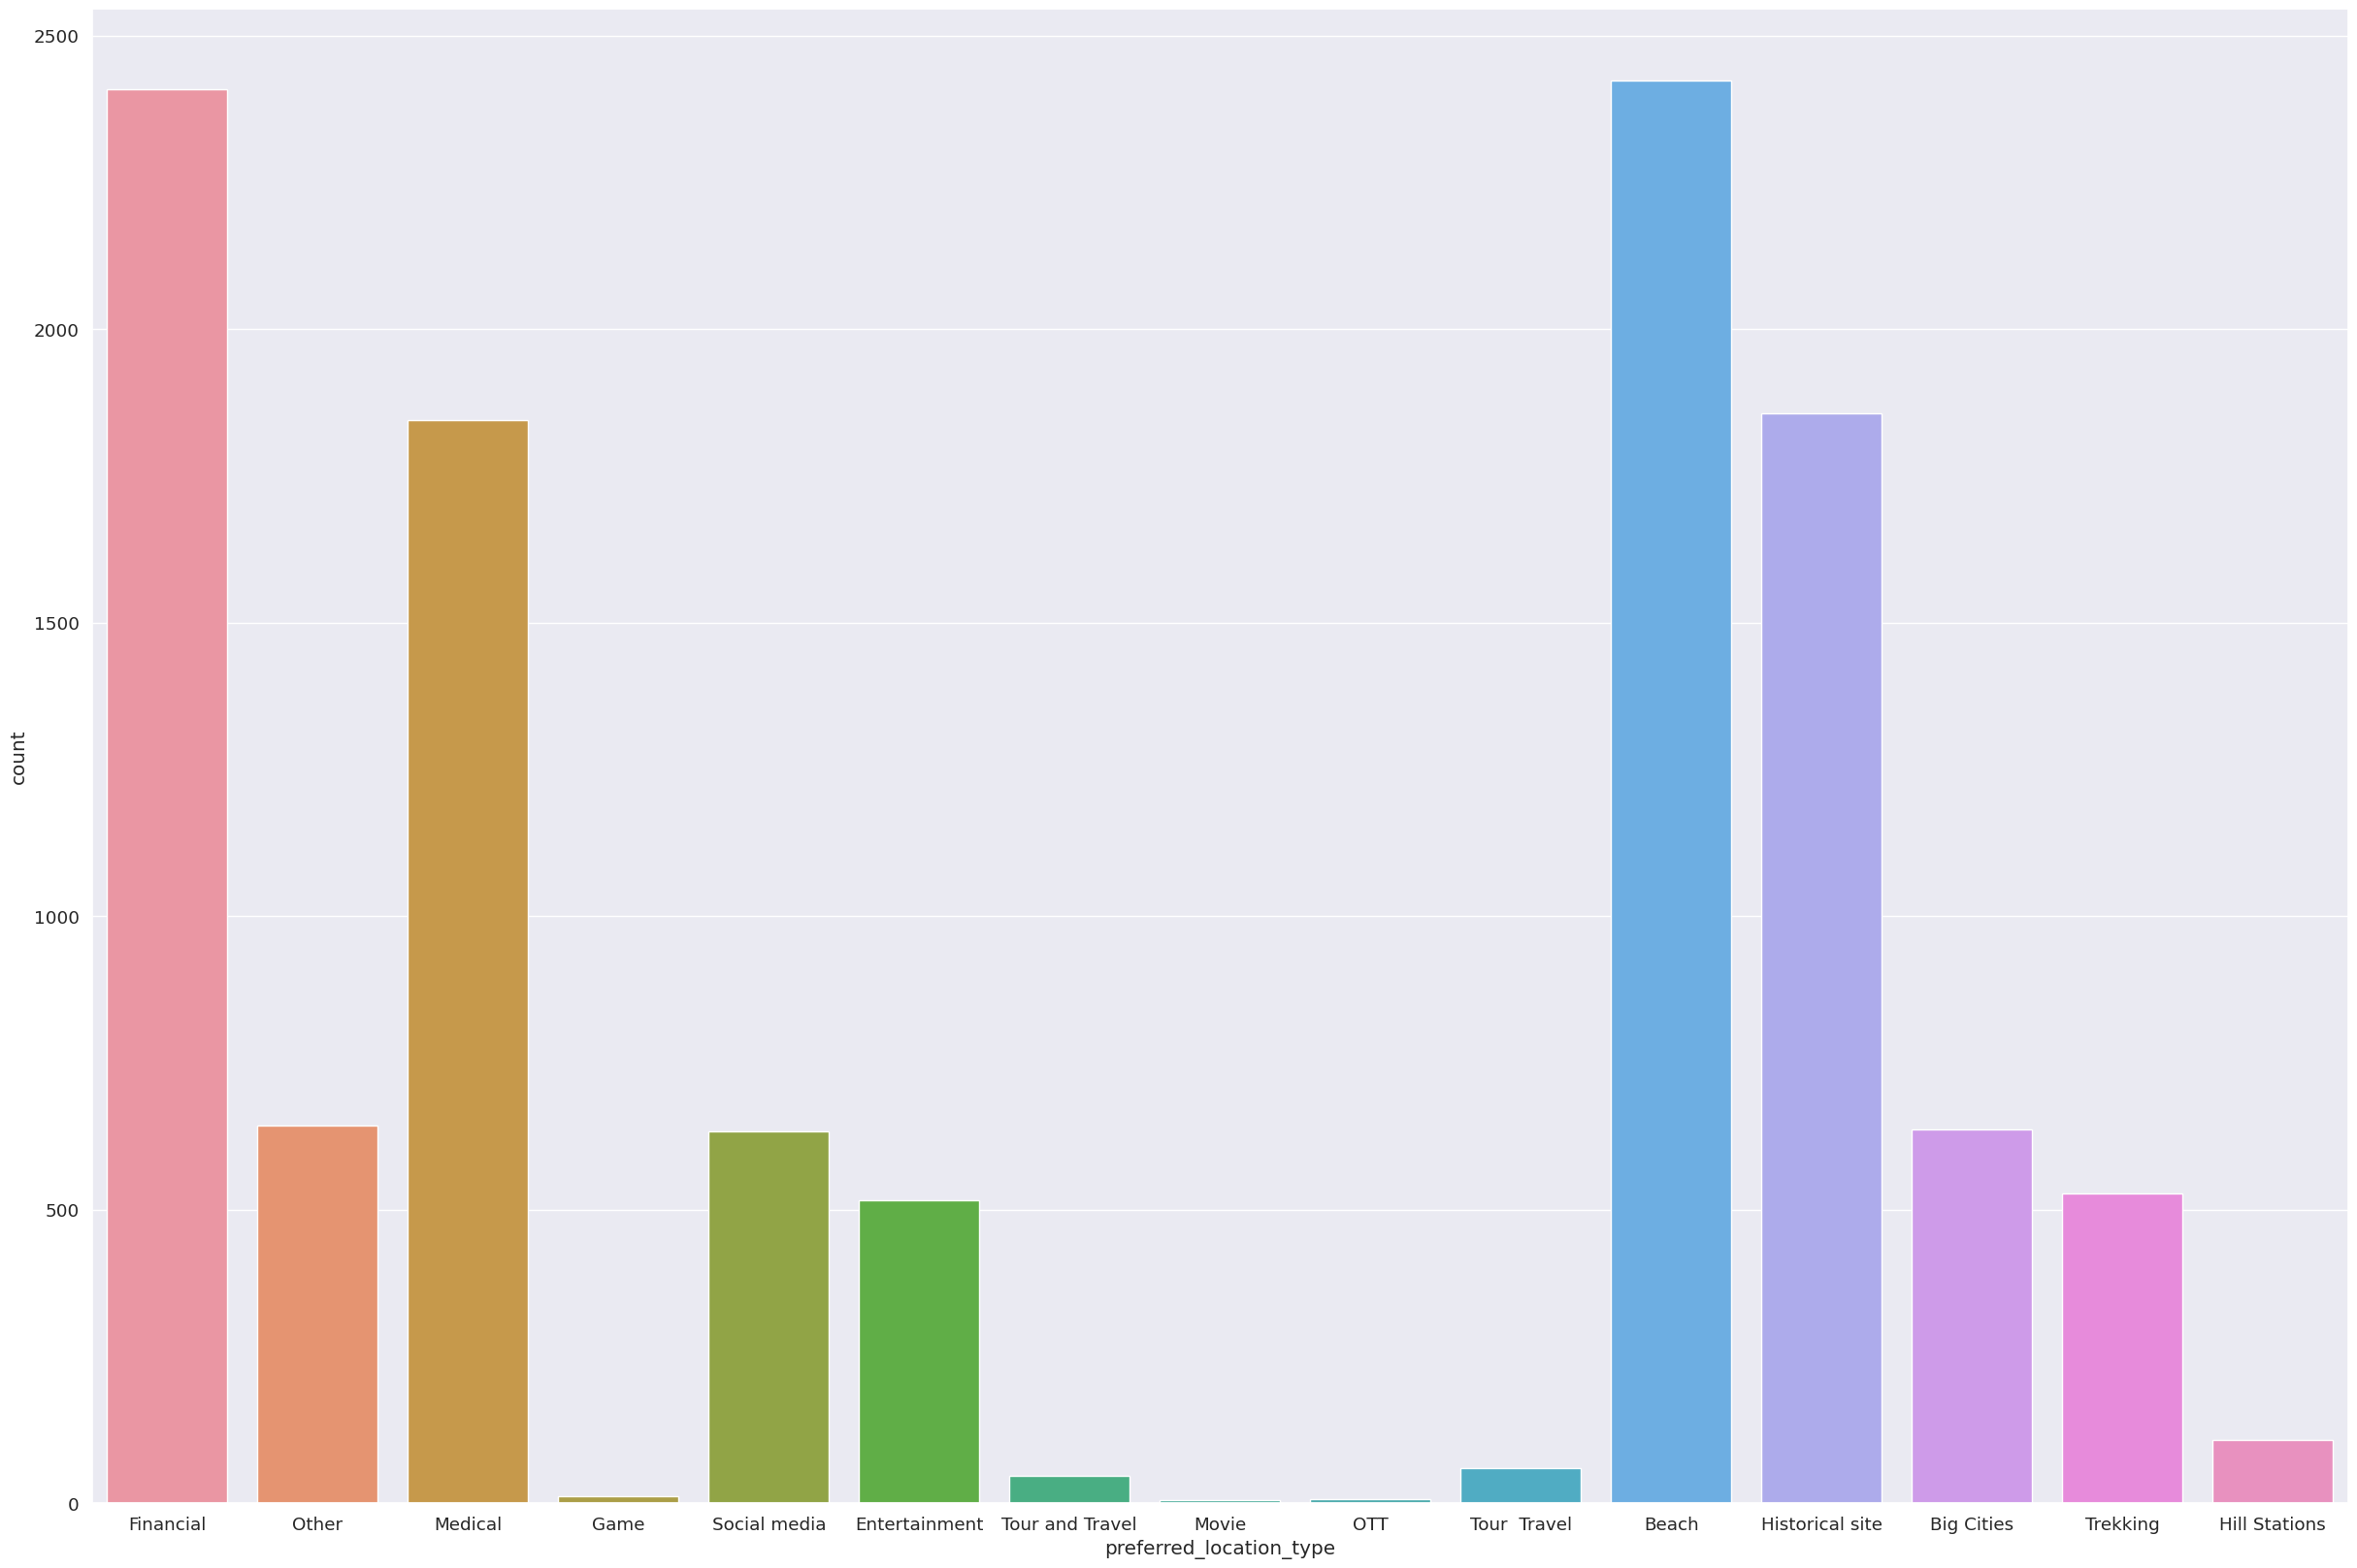

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(data=user_data, x='preferred_location_type')

#### Converting 'Adult_flag', 'week_since_last_outstation_checkin' and 'travelling_network_rating' to 'object' datatype because it is a categorical variable.

In [ ]:
user_data['travelling_network_rating'] = user_data['travelling_network_rating'].astype('object')
user_data['week_since_last_outstation_checkin'] = user_data['week_since_last_outstation_checkin'].astype('object')
user_data['Adult_flag'] = user_data['Adult_flag'].astype('object')

### Summary Statistics

In [ ]:
round(user_data.describe().T,3)

count       mean        std  \
Yearly_avg_view_on_travel_page                11179.0    280.831     68.183   
total_likes_on_outstation_checkin_given       11379.0  28170.482  14385.032   
Yearly_avg_comment_on_travel_page             11554.0     74.790     24.027   
total_likes_on_outofstation_checkin_received  11760.0   6531.699   4706.614   
montly_avg_comment_on_company_page            11760.0     28.662     48.661   
Daily_Avg_mins_spend_on_traveling_page        11760.0     13.817      9.071   

                                                 min       25%      50%  \
Yearly_avg_view_on_travel_page                  35.0    232.00    271.0   
total_likes_on_outstation_checkin_given       3570.0  16380.00  28076.0   
Yearly_avg_comment_on_travel_page                3.0     57.00     75.0   
total_likes_on_outofstation_checkin_received  1009.0   2940.75   4948.0   
montly_avg_comment_on_company_page              11.0     17.00     22.0   
Daily_Avg_mins_spend_on_traveling_page           0.0      8.00     12.0   

                                                   75%       max  
Yearly_avg_view_on_travel_page                  324.00     464.0  
total_likes_on_outstation_checkin_given       40525.00  252430.0  
Yearly_avg_comment_on_travel_page                92.00     815.0  
total_likes_on_outofstation_checkin_received   8393.25   20065.0  
montly_avg_comment_on_company_page               27.00     500.0  
Daily_Avg_mins_spend_on_traveling_page           18.00     270.0

In [ ]:
user_data.describe(include='object').T

count unique    top  freq
Taken_product                       11760      2     No  9864
preferred_device                    11707     10    Tab  4172
yearly_avg_Outstation_checkins      11685     30      1  4543
member_in_family                    11760      7      3  4561
preferred_location_type             11729     15  Beach  2424
week_since_last_outstation_checkin  11760     12      1  3070
following_company_page              11657      4     No  8355
working_flag                        11760      2     No  9952
travelling_network_rating           11760      4      3  3672
Adult_flag                          11760      4      0  5048

In [ ]:
num = user_data.select_dtypes(exclude=['object']).columns
cat = user_data.select_dtypes(exclude=['int64','float64']).columns

In [ ]:
user_data.groupby(user_data['Taken_product'])[num].mean()

Yearly_avg_view_on_travel_page  \
Taken_product                                   
No                                 285.438207   
Yes                                256.966280   

               total_likes_on_outstation_checkin_given  \
Taken_product                                            
No                                        28517.944258   
Yes                                       26363.298093   

               Yearly_avg_comment_on_travel_page  \
Taken_product                                      
No                                     74.848106   
Yes                                    74.487923   

               total_likes_on_outofstation_checkin_received  \
Taken_product                                                 
No                                              6861.478609   
Yes                                             4816.010549   

               montly_avg_comment_on_company_page  \
Taken_product                                       
No                                       28.64852   
Yes                                      28.72943   

               Daily_Avg_mins_spend_on_traveling_page  
Taken_product                                          
No                                          14.386963  
Yes                                         10.854430

In [ ]:
user_data.groupby(user_data['Taken_product'])[cat.drop('Taken_product')].count()

preferred_device  yearly_avg_Outstation_checkins  \
Taken_product                                                     
No                         9821                            9799   
Yes                        1886                            1886   

               member_in_family  preferred_location_type  \
Taken_product                                              
No                         9864                     9836   
Yes                        1896                     1893   

               week_since_last_outstation_checkin  following_company_page  \
Taken_product                                                               
No                                           9864                    9778   
Yes                                          1896                    1879   

               working_flag  travelling_network_rating  Adult_flag  
Taken_product                                                       
No                     9864                       9864        9864  
Yes                    1896                       1896        1896

### 2. c) Understanding of attributes (variable info, renaming if required)

In [ ]:
for c in cat:
    print(f'Value count of "{c}"')
    print(user_data[c].value_counts())
    print()

Value count of "Taken_product"
No     9864
Yes    1896
Name: Taken_product, dtype: int64

Value count of "preferred_device"
Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

Value count of "yearly_avg_Outstation_checkins"
1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64

Value count of "member_in_family"
3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

<Axes: xlabel='member_in_family', ylabel='count'>

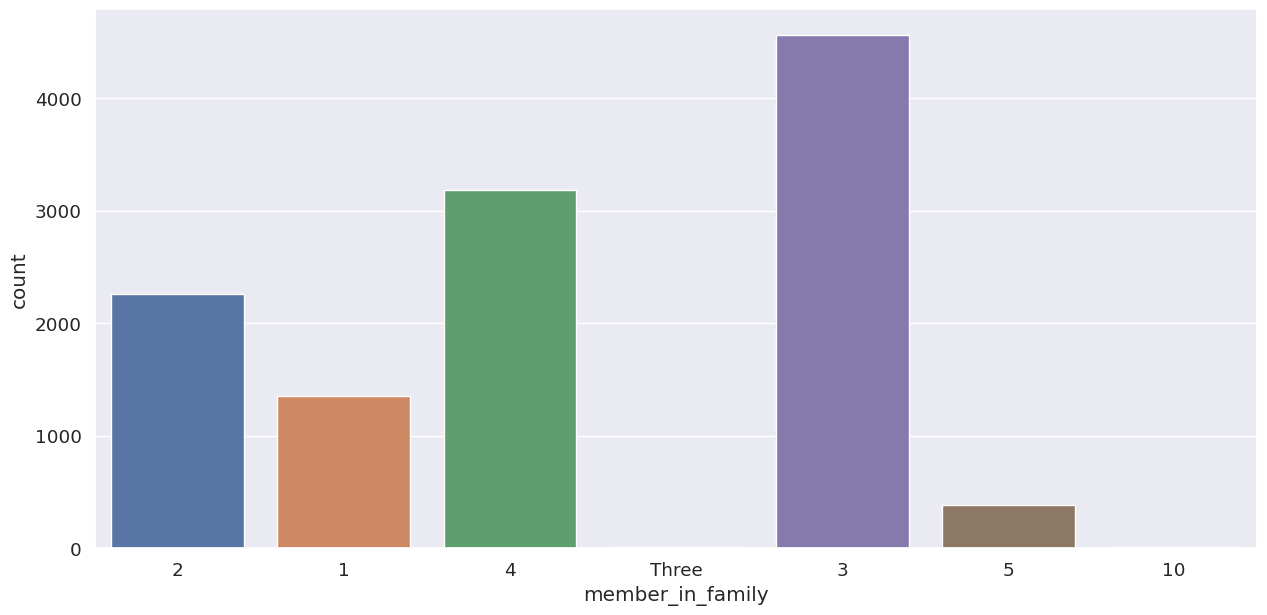

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=user_data, x='member_in_family')

### Targe variable : Class proportion

In [ ]:
user_data['Taken_product'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Taken_product, dtype: float64

## Data Wrangling

In [ ]:
user_data['preferred_device'].value_counts()

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [ ]:
#Cleaning redundant values
user_data['preferred_device'] = user_data['preferred_device'].replace(dict.fromkeys(['Android OS','ANDROID','Tab','iOS and Android','iOS','Android','Others','Other'],'Mobile'))
user_data['preferred_device'].value_counts()

Mobile    10599
Laptop     1108
Name: preferred_device, dtype: int64

In [ ]:
#Replace the '*' with the most frequent value (mode)
user_data['yearly_avg_Outstation_checkins'] = np.where(user_data['yearly_avg_Outstation_checkins']=='*'
                                                                ,user_data['yearly_avg_Outstation_checkins'].mode()
                                                                ,user_data['yearly_avg_Outstation_checkins'])

#### Converting  'yearly_avg_Outstation_checkins' as 'float' i.e. continuous datatype

In [ ]:
user_data['yearly_avg_Outstation_checkins'] = user_data['yearly_avg_Outstation_checkins'].astype('float64')

In [ ]:
#Replace 'Three' with the numerical value '3'
user_data['member_in_family'] = np.where(user_data['member_in_family']=='Three','3',user_data['member_in_family'])
user_data['member_in_family'].value_counts()

3     4576
4     3184
2     2256
1     1349
5      384
10      11
Name: member_in_family, dtype: int64

In [ ]:
#Combine two different Tour and Travel
user_data['preferred_location_type'] = user_data['preferred_location_type'].replace({'Tour  Travel':'Tour and Travel'})
user_data['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour and Travel     107
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [ ]:
#Replace '1' to 'Yes' and '0' to 'No' based on its proportion
user_data['following_company_page'] = user_data['following_company_page'].replace({'1':'Yes','0':'No'})
user_data['following_company_page'].value_counts()

No     8360
Yes    3297
Name: following_company_page, dtype: int64

<Axes: xlabel='following_company_page', ylabel='count'>

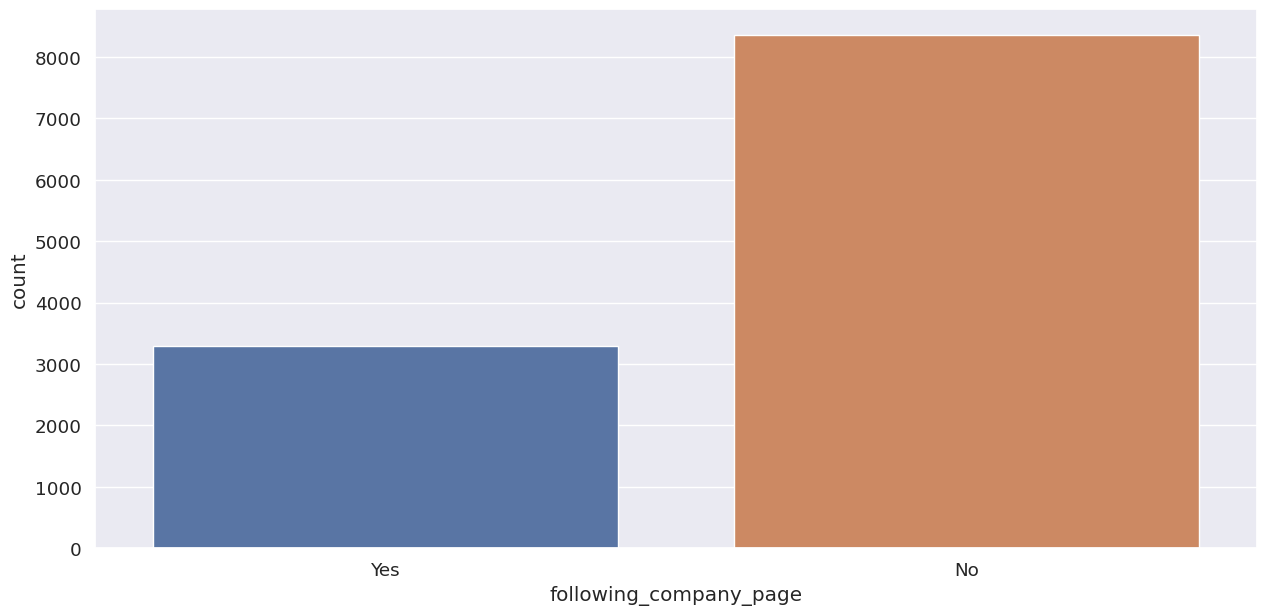

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=user_data, x='following_company_page')

In [ ]:
user_data['Adult_flag'] = user_data['Adult_flag'].replace(dict.fromkeys([2,3],1)).astype('object')
user_data['Adult_flag'].value_counts()

1    6712
0    5048
Name: Adult_flag, dtype: int64

## 3. Exploratory Data Analysis

In [ ]:
num = user_data.select_dtypes(exclude=['object']).columns
cat = user_data.select_dtypes(exclude=['int64','float64']).columns

In [ ]:
print(num.nunique())
print(cat.nunique())

7
9


#### 3.a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

Text(0.5, 1.0, 'Distribution of Numerical Variable')

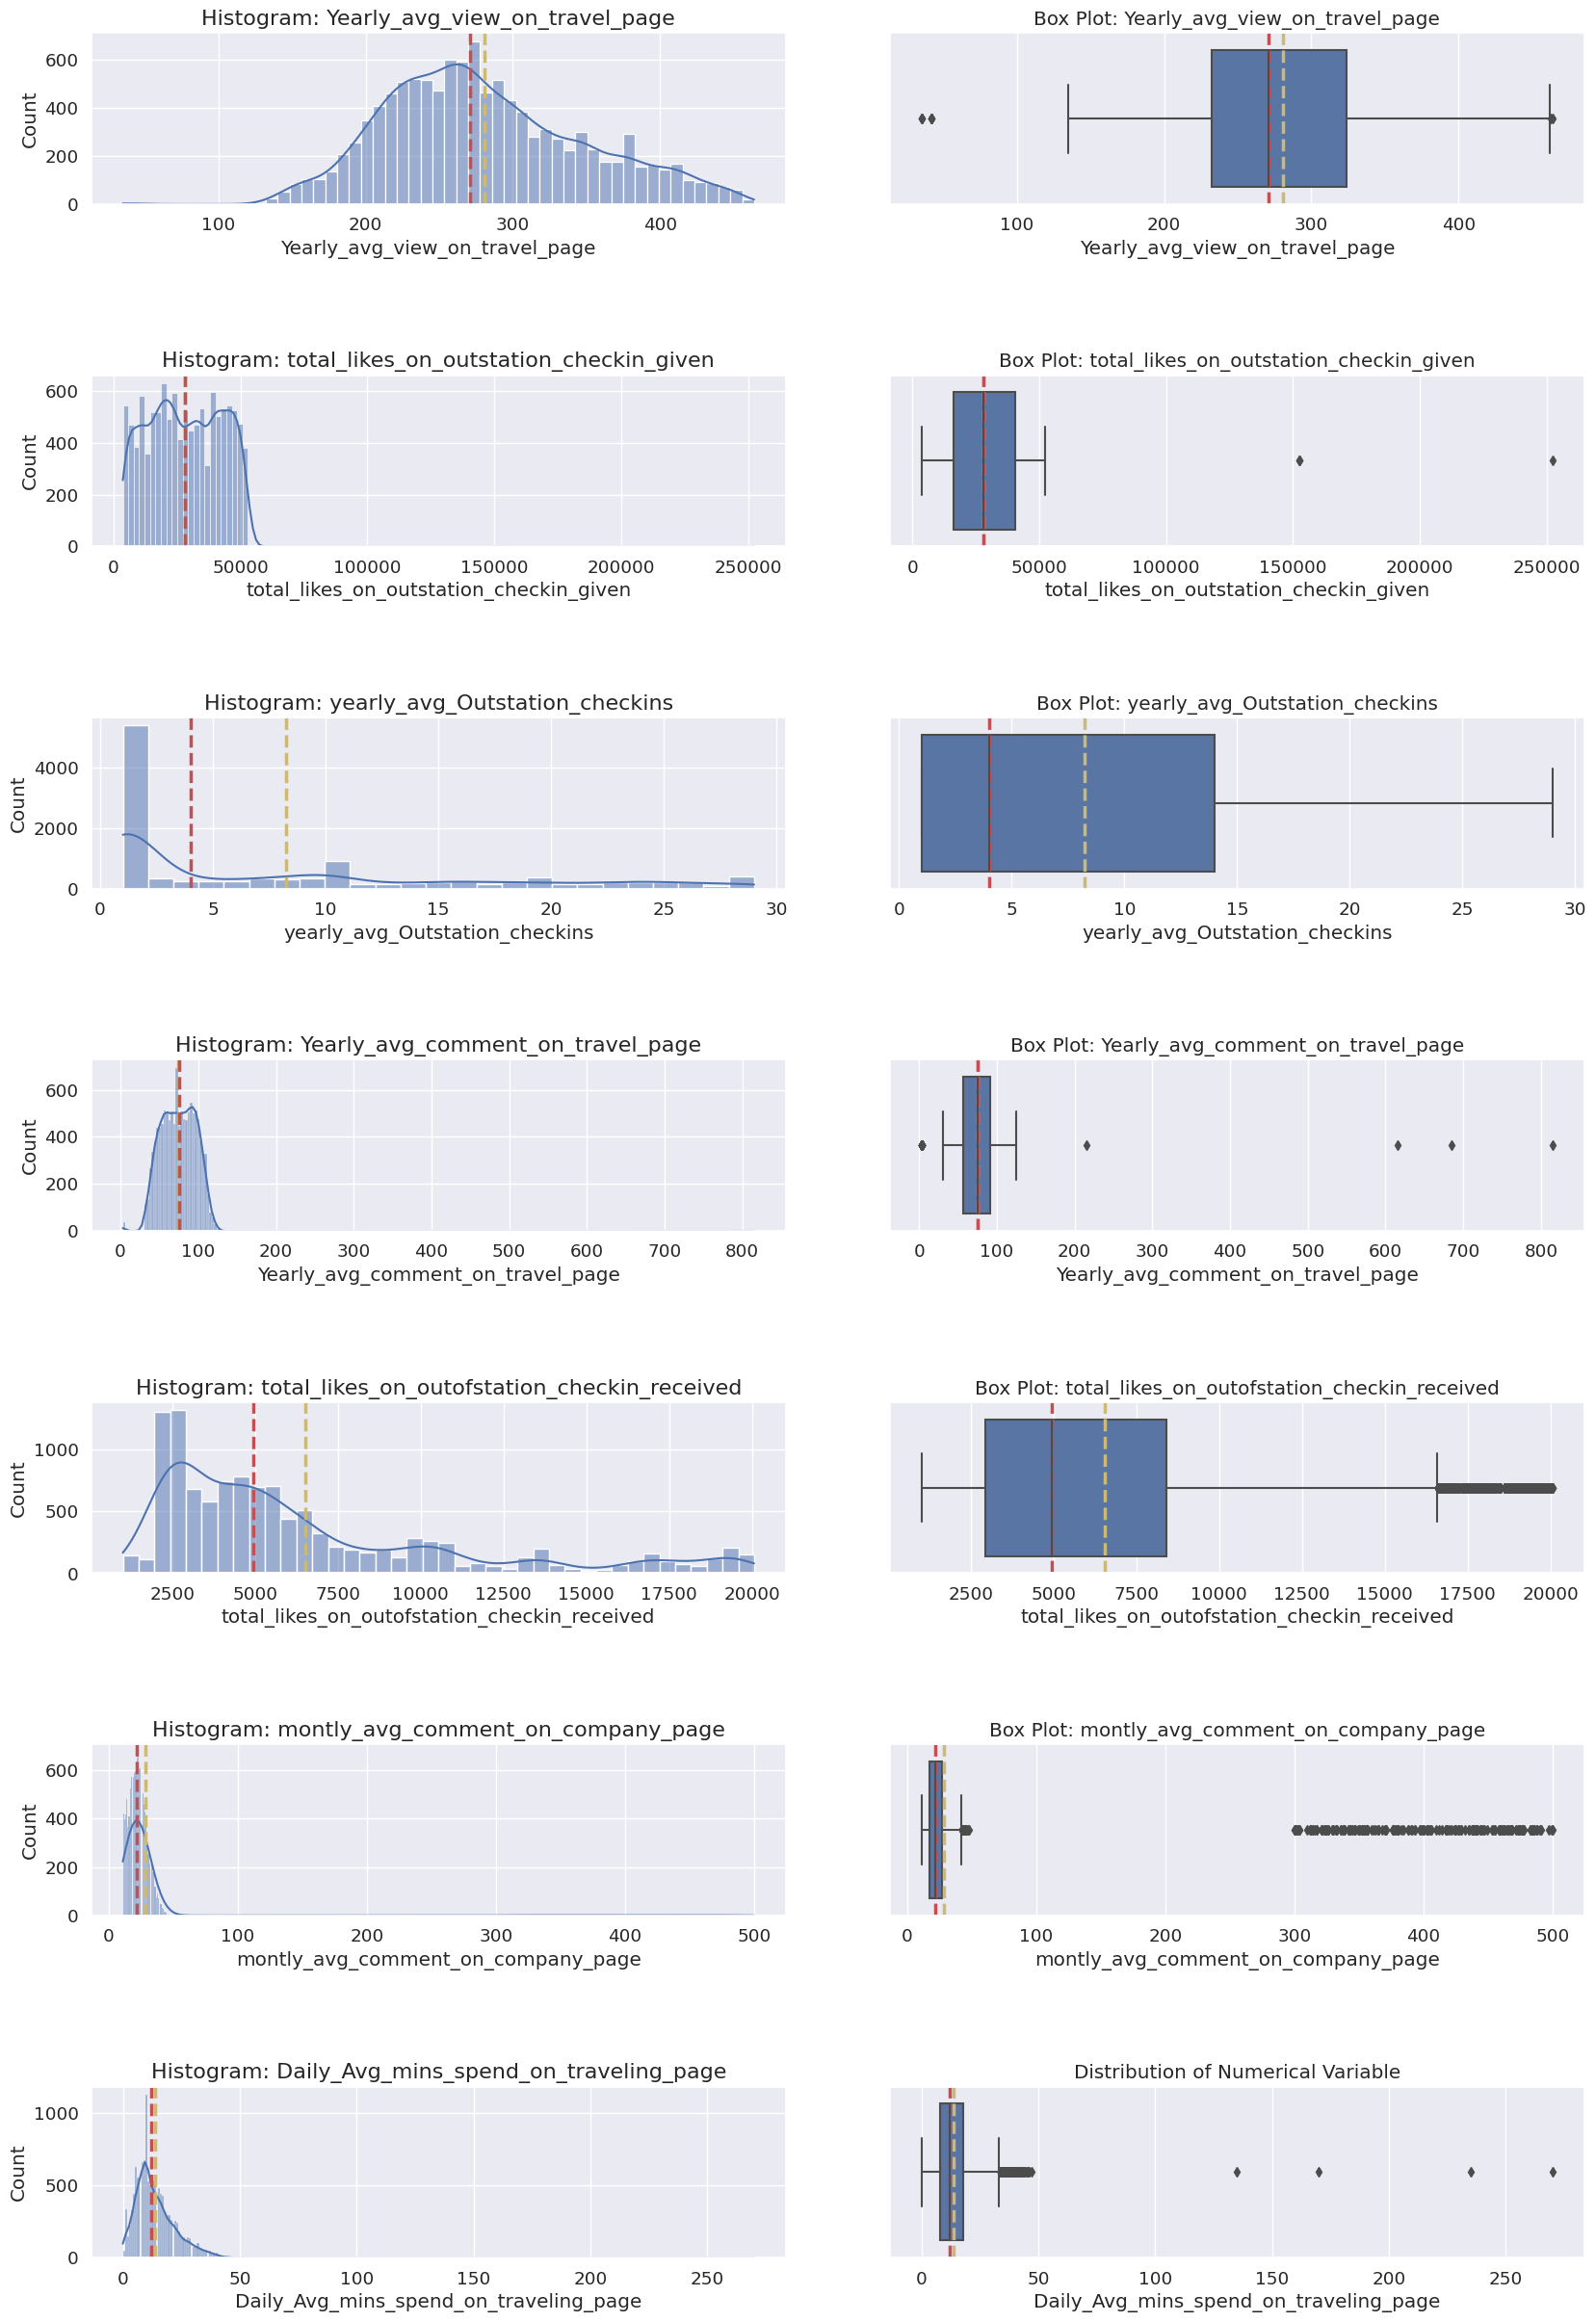

In [ ]:
fig,axes = plt.subplots(7,2,figsize=(20,30))
plt.subplots_adjust(hspace=1,wspace=0.15)
for c,a in zip(num,axes):
        sns.histplot(x=user_data[c],kde=True,ax=a[0])
        a[0].set_title("Histogram: "+c,fontsize=16)
        a[0].axvline(x=user_data[c].mean(),linestyle='--',linewidth=2.5,color='y')
        a[0].axvline(x=user_data[c].median(),linestyle='--',linewidth=2.5,color='r')
        sns.boxplot(x=user_data[c],ax=a[1])
        a[1].set_title("Box Plot: "+c)
        a[1].axvline(x=user_data[c].mean(),linestyle='--',linewidth=2.5,color='y')
        a[1].axvline(x=user_data[c].median(),linestyle='--',linewidth=2.5,color='r')
plt.title("Distribution of Numerical Variable")
        #plt.tight_layout()

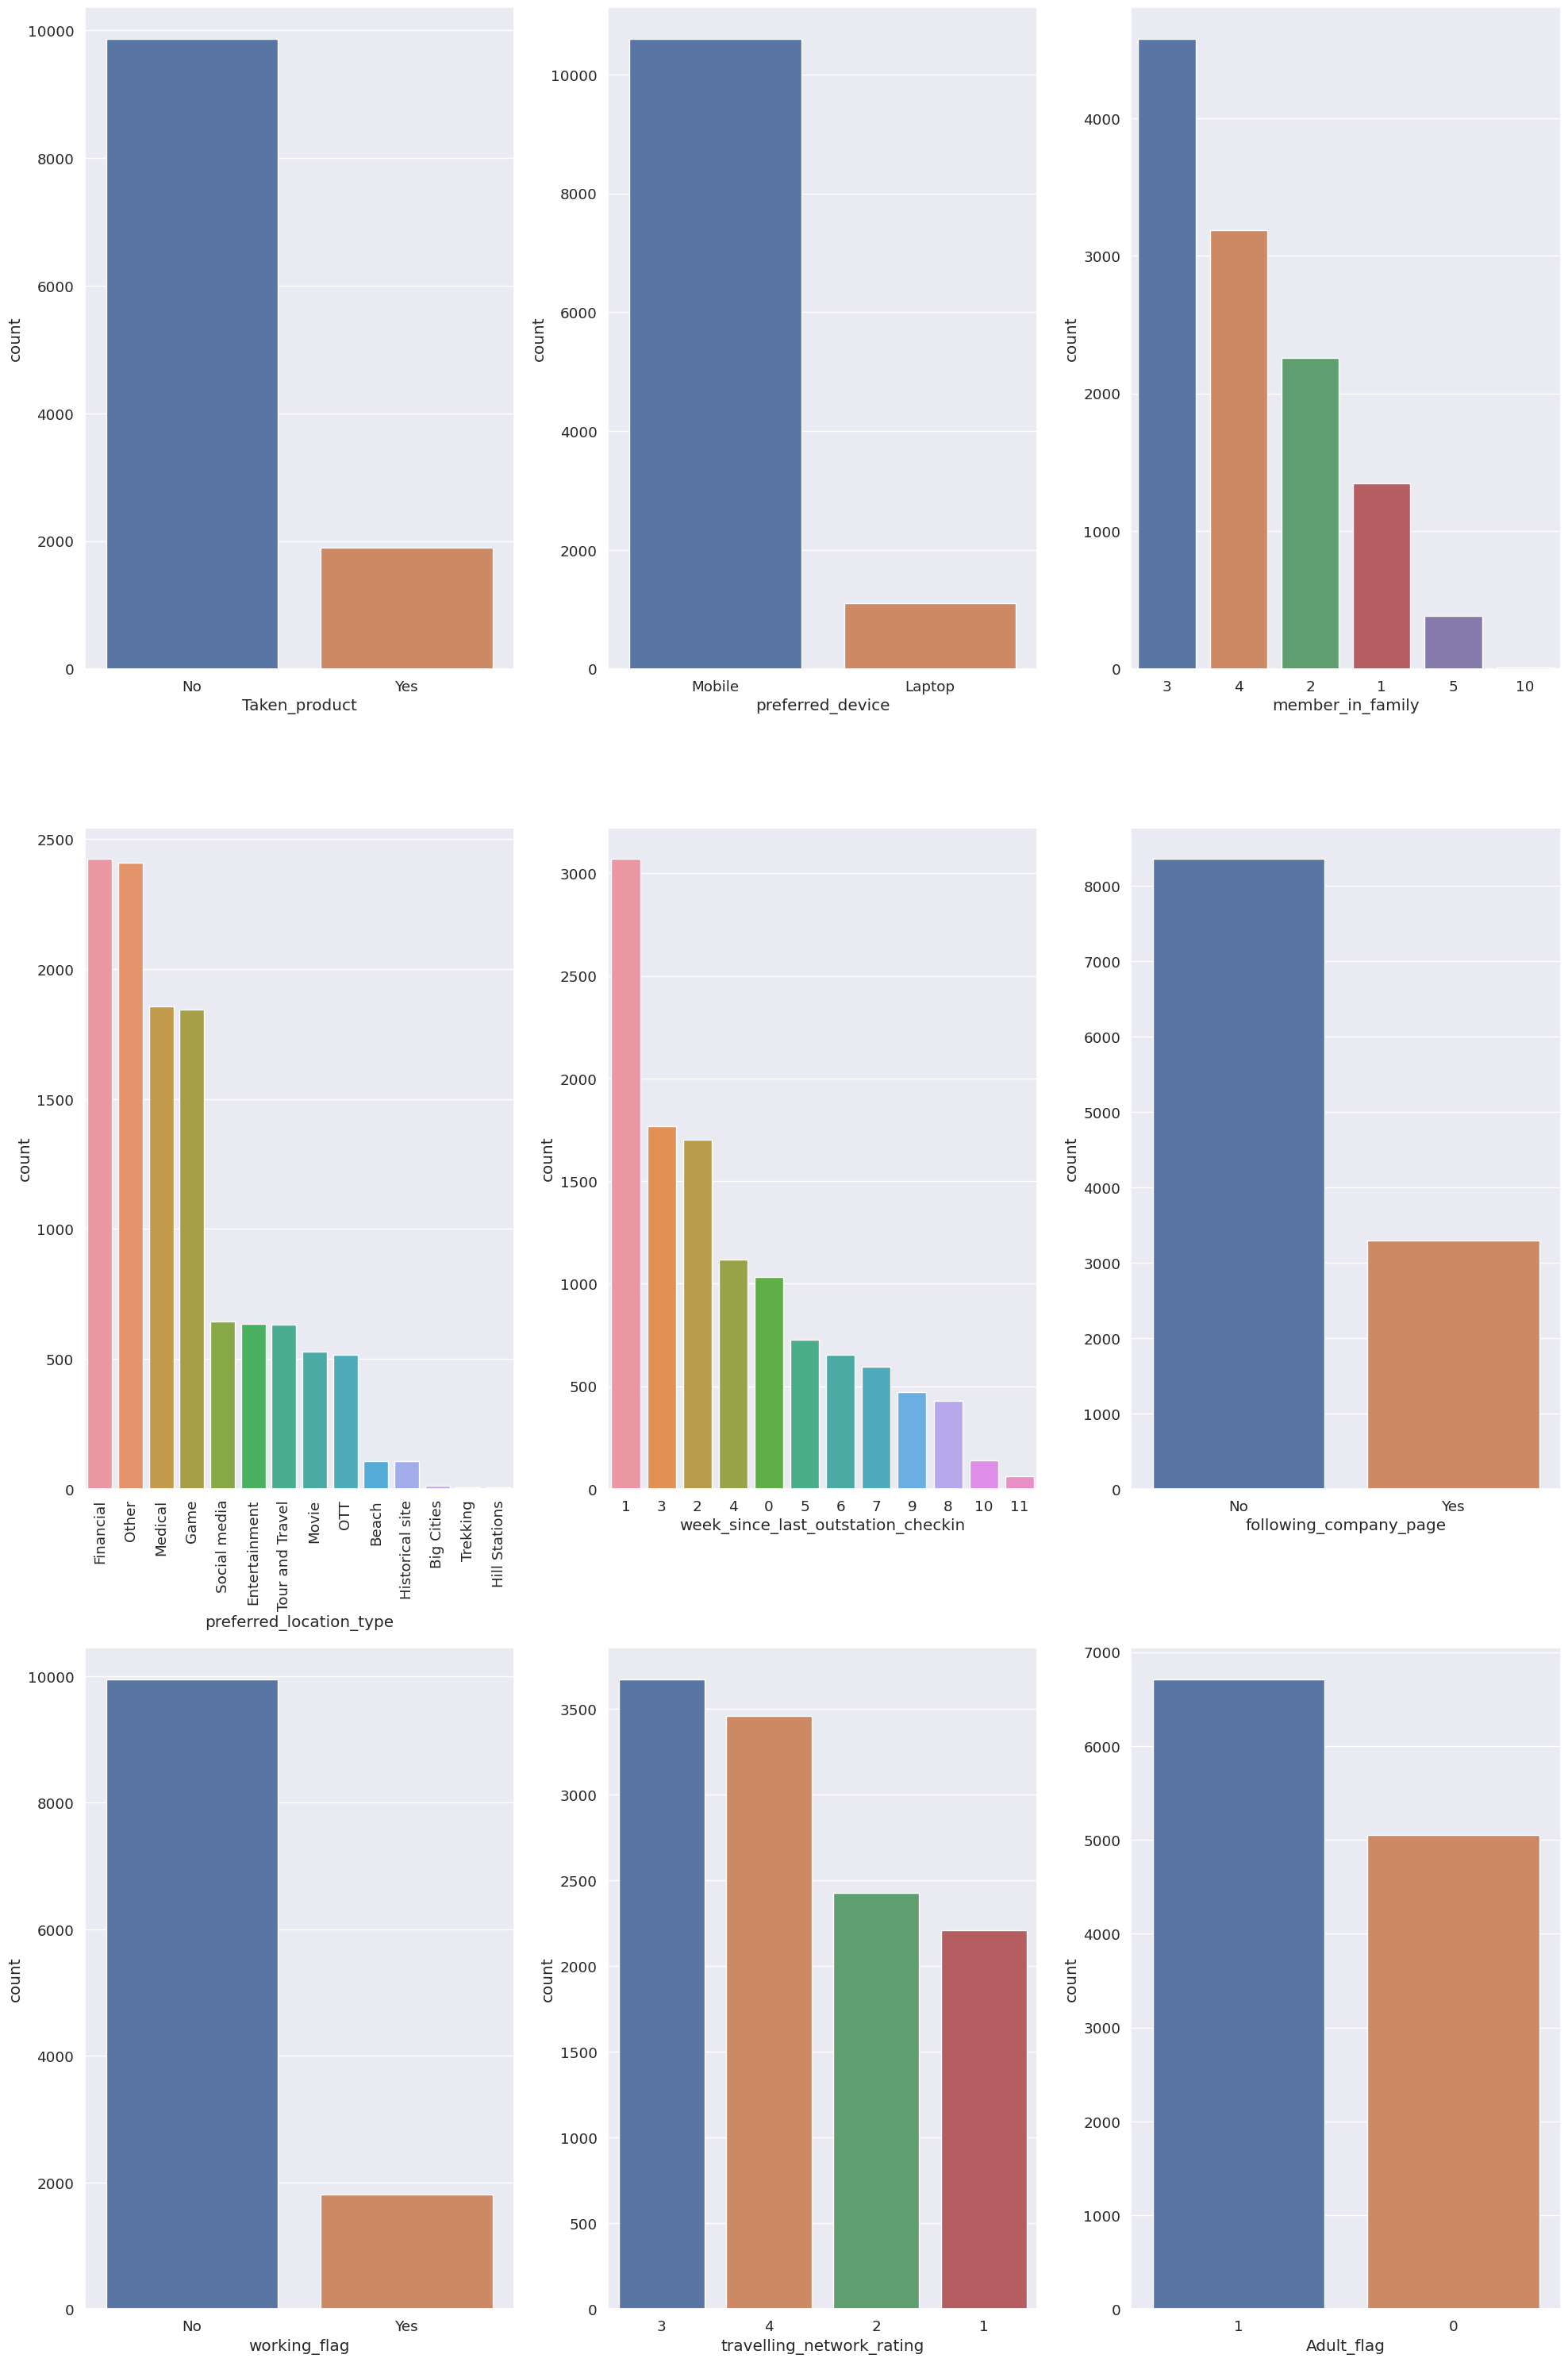

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(20,30))
for c,a in zip(cat,axes.flatten()):
    sns.countplot(x=user_data[c],ax=a,order=user_data[c].value_counts().index)
    if c == 'preferred_location_type':
        a.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Beach',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations'],rotation=90)
    plt.tight_layout()

#### 3. b) Bivariate analysis (relationship between different variables , correlations)

In [ ]:
import textwrap

In [ ]:
labels = ['Financial', 'Other', 'Medical', 'Game', 'Social media',
       'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Beach',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
type(labels)

list

In [ ]:
ls =[]
for l in labels:
    ls.append(textwrap.fill(l,width=10,break_long_words=False))
ls

['Financial',
 'Other',
 'Medical',
 'Game',
 'Social\nmedia',
 'Entertainment',
 'Tour and\nTravel',
 'Movie',
 'OTT',
 'Beach',
 'Historical\nsite',
 'Big Cities',
 'Trekking',
 'Hill\nStations']

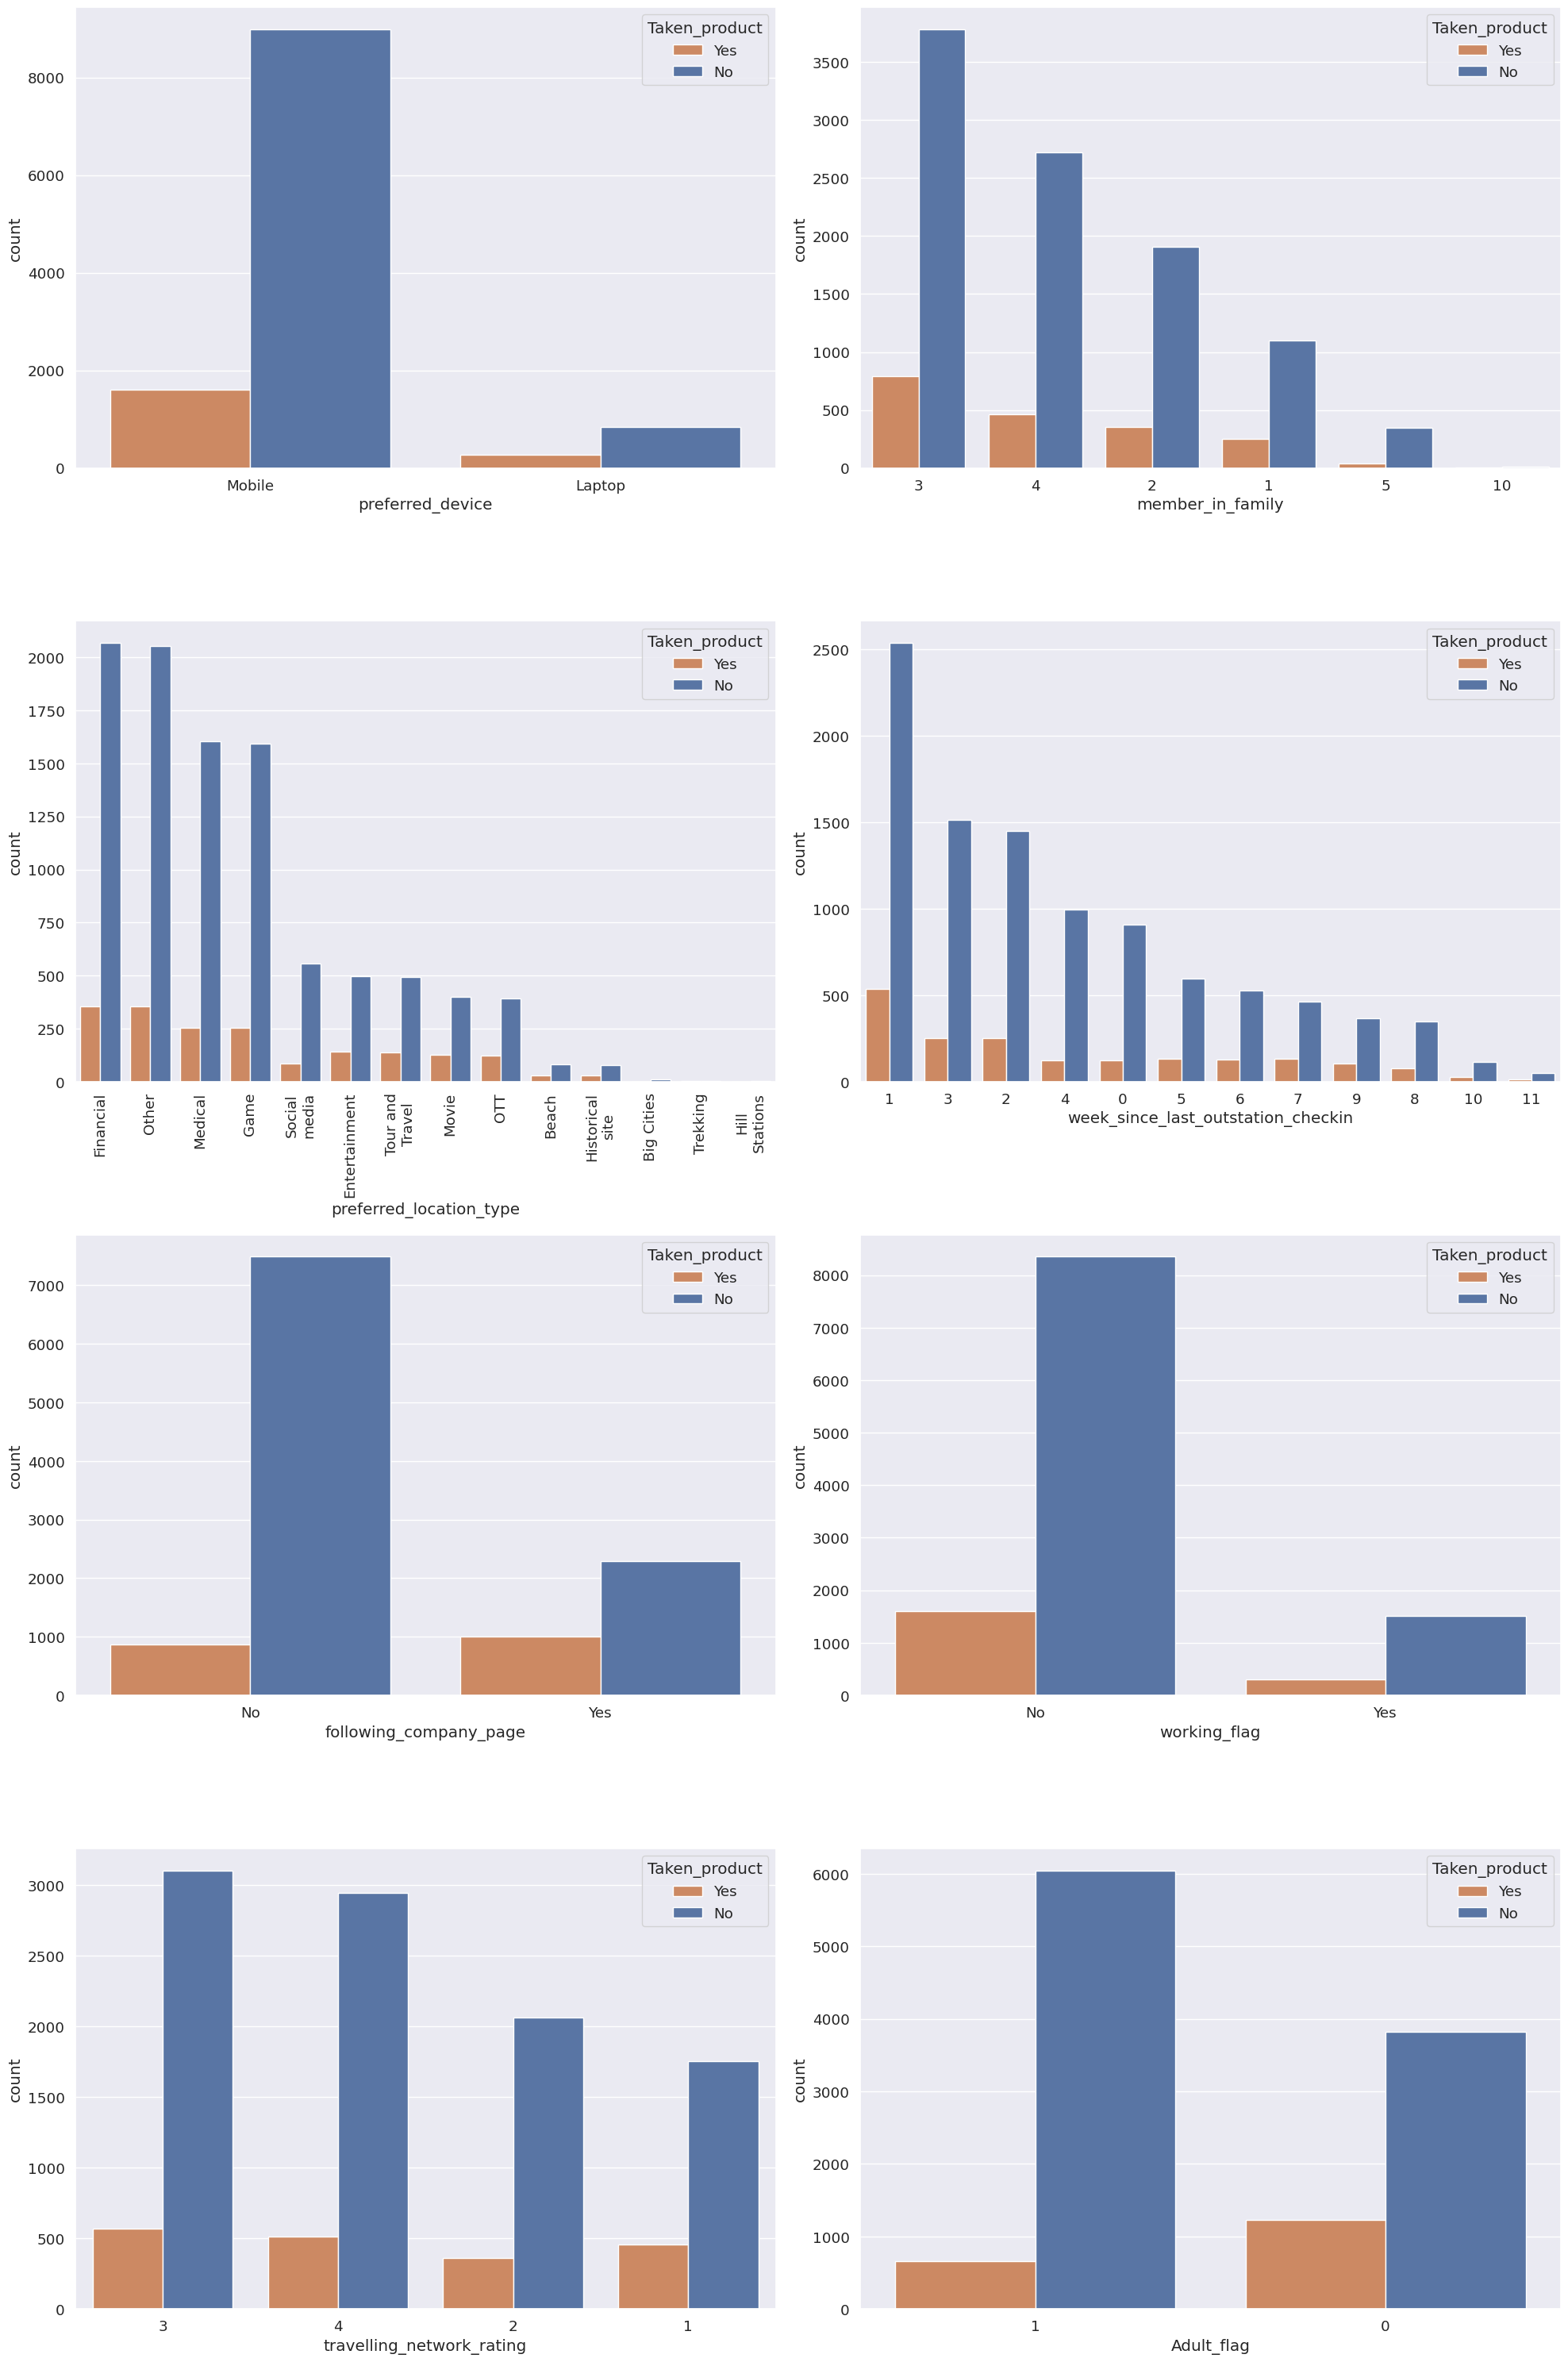

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(20,30))
for c,a in zip(cat.drop('Taken_product'),axes.flatten()):
    sns.countplot(x=c,data=user_data,hue='Taken_product',ax=a,order=user_data[c].value_counts().index,palette={'Yes':'C1','No':'C0'})
    if c == 'preferred_location_type':
        a.set_xticklabels(ls, rotation=90)
    plt.tight_layout()

<ipython-input-48-af8bfab60bb5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',
<ipython-input-48-af8bfab60bb5>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',


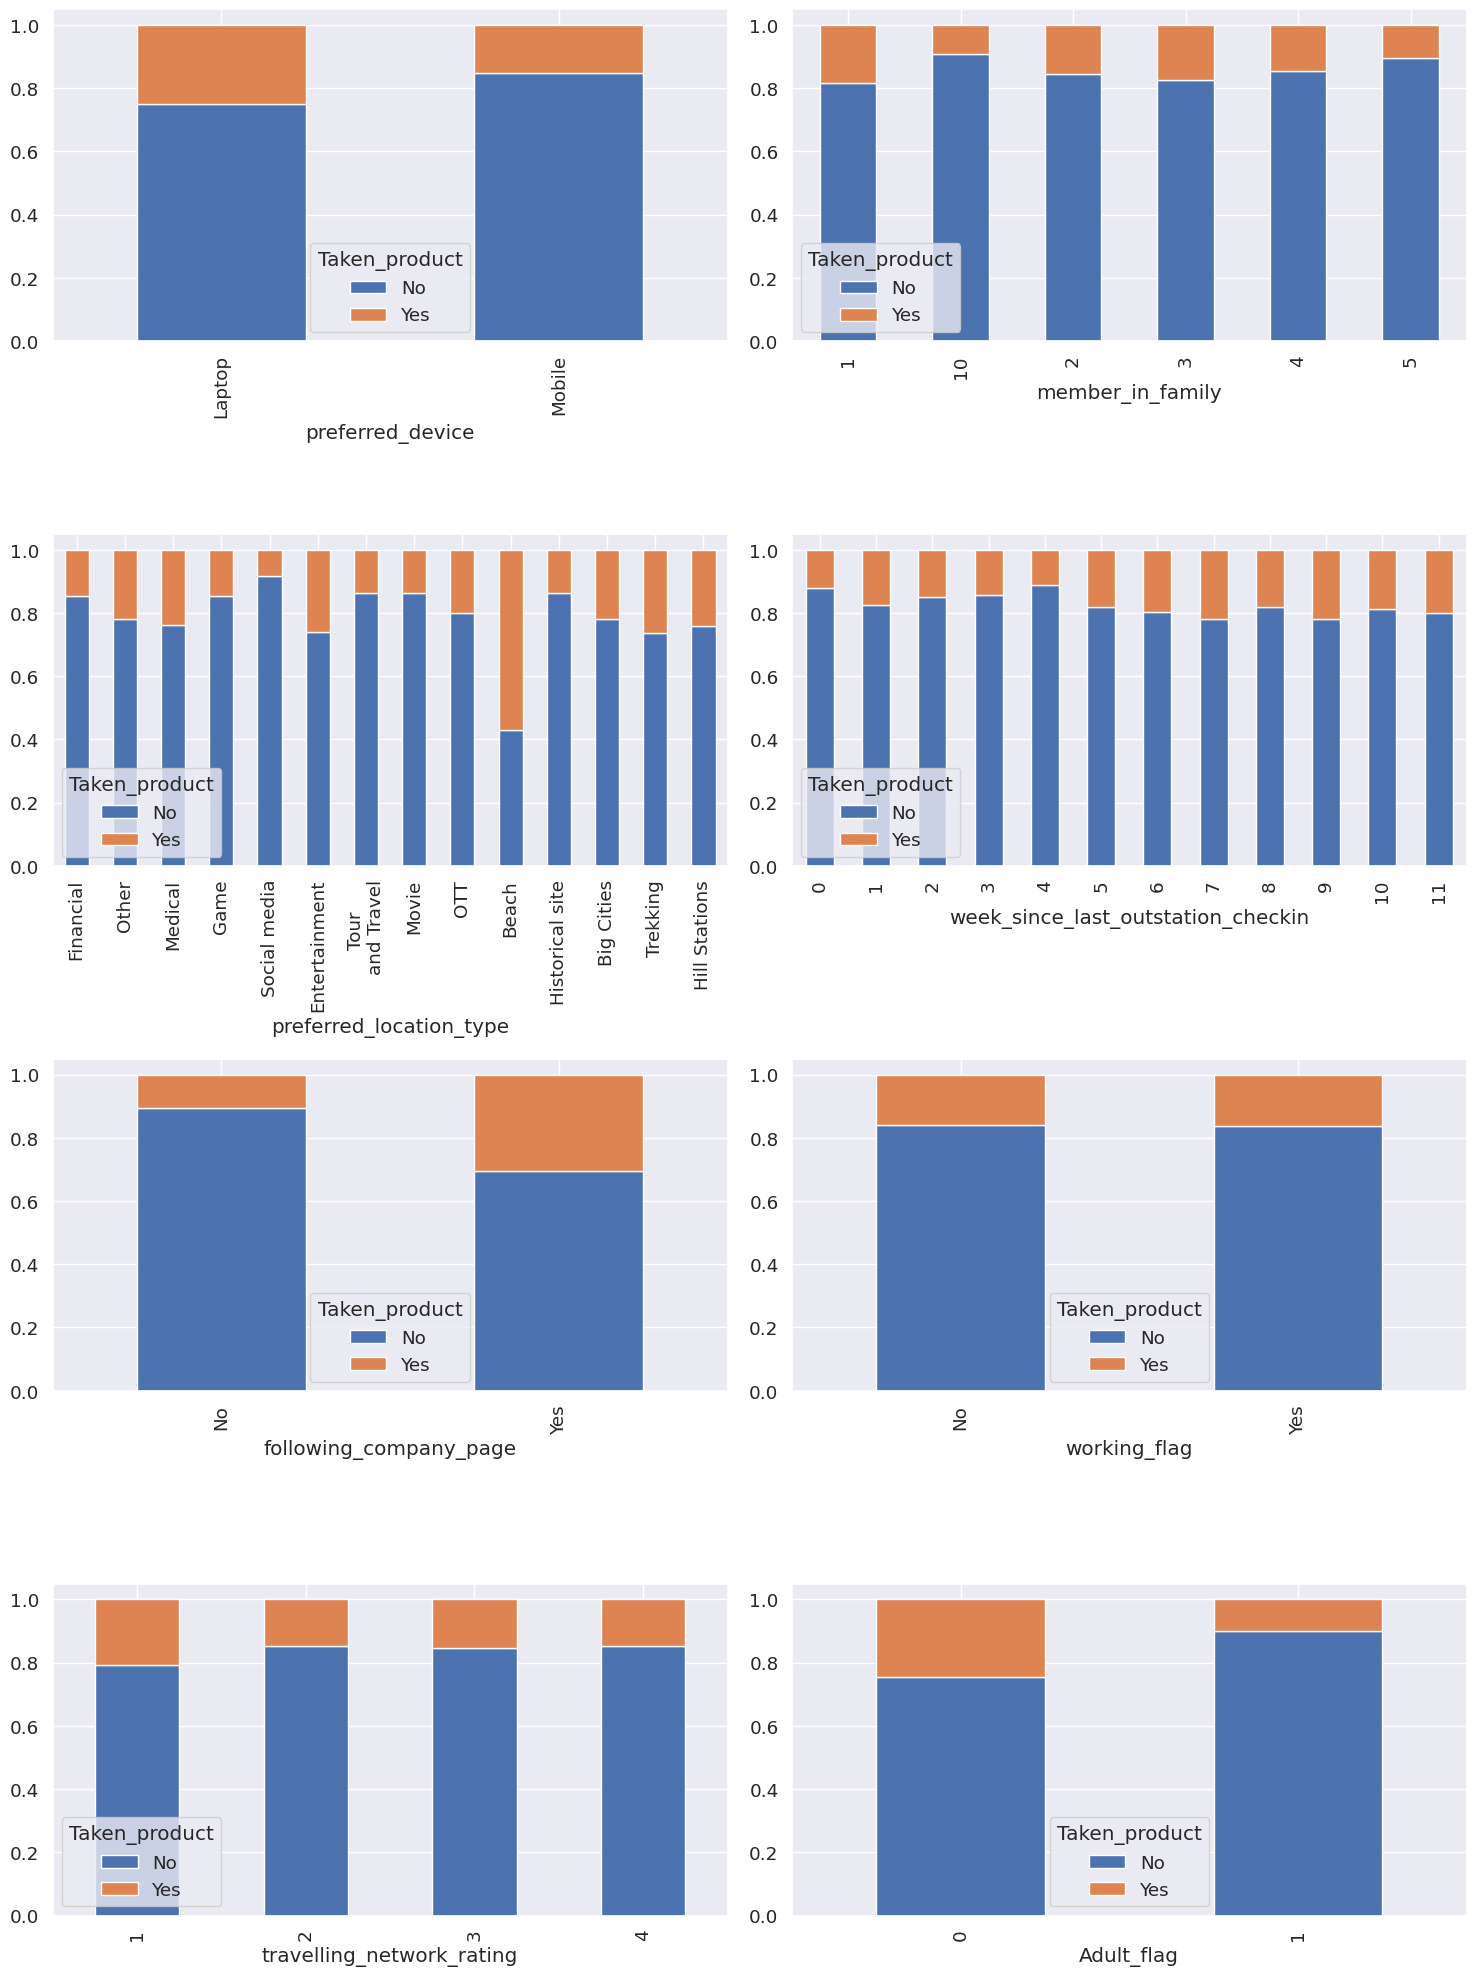

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(15,20))
# plt.subplots_adjust(hspace=0.75)
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for c,a in zip(cat.drop('Taken_product'),axes):
    user_data.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    ax3.set_xticklabels(labels=['Financial', 'Other', 'Medical', 'Game', 'Social media',
       'Entertainment', 'Tour \nand Travel', 'Movie', 'OTT', 'Beach',
       'Historical site', 'Big Cities', 'Trekking', 'Hill Stations'],rotation=90)
plt.tight_layout()

<ipython-input-49-f32d8bdb26fc>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=user_data['Taken_product'],y=user_data[c],ax=a[1],palette={'Yes':'C1','No':'C0'})
<ipython-input-49-f32d8bdb26fc>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=user_data['Taken_product'],y=user_data[c],ax=a[1],palette={'Yes':'C1','No':'C0'})
<ipython-input-49-f32d8bdb26fc>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=user_data['Taken_product'],y=user_data[c],ax=a[1],palette={'Yes':'C1','No':'C0'})
<ipython-input-49-f32d8bdb26fc>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=user_data['Taken_product'],y=user_data[c],ax=a[1],palette={'Yes':'C1','No':'C0'})
<ipython-input-49-f32d8bdb26fc>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x=user_data['Taken_product'],y=user_data[c],ax=a[

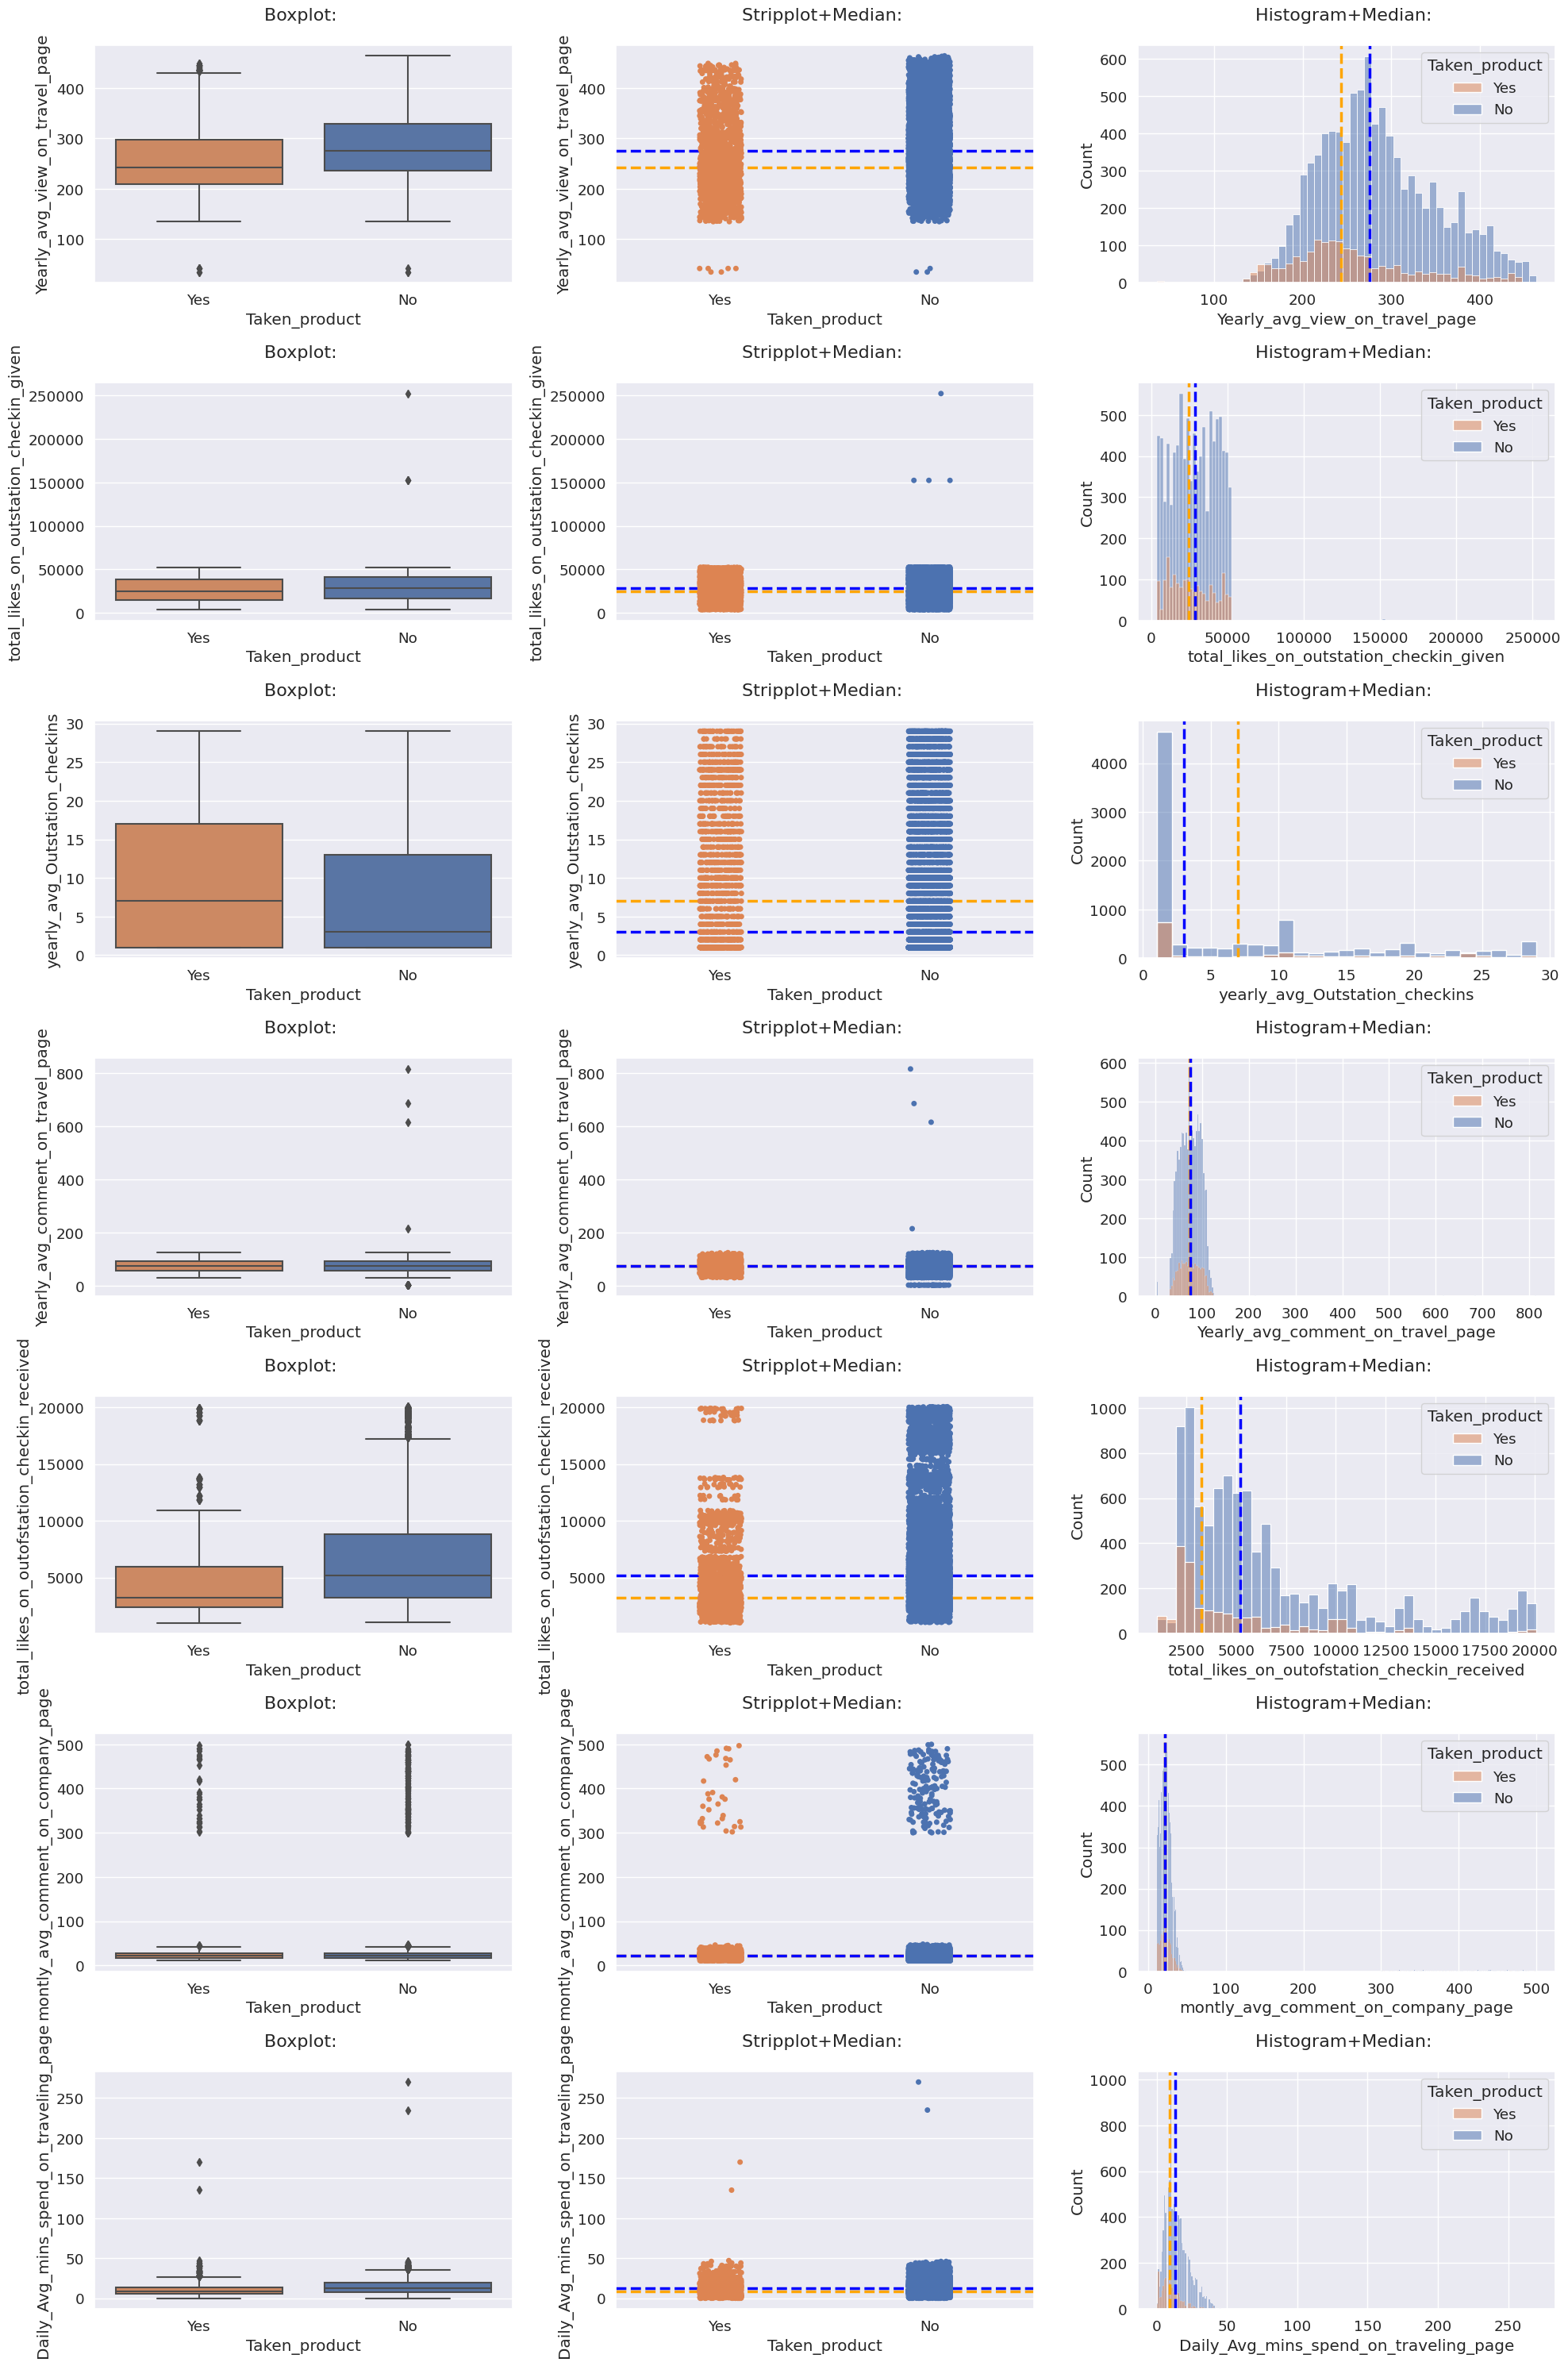

In [ ]:
fig,axes = plt.subplots(7,3,figsize=(20,30))
for c,a in zip(num,axes):
    sns.boxplot(x=user_data['Taken_product'],y=user_data[c],ax=a[0],palette={'Yes':'C1','No':'C0'})
    a[0].set_title("Boxplot: \n",fontsize=16)
    sns.stripplot(x=user_data['Taken_product'],y=user_data[c],ax=a[1],palette={'Yes':'C1','No':'C0'})
    a[1].axhline(y=user_data[user_data['Taken_product']=='Yes'][c].median(),linestyle='--',linewidth=2.5,color='orange')
    a[1].axhline(y=user_data[user_data['Taken_product']=='No'][c].median(),linestyle='--',linewidth=2.5,color='blue')
    a[1].set_title("Stripplot+Median: \n",fontsize=16)
    sns.histplot(x=user_data[c],hue=user_data['Taken_product'],ax=a[2],palette={'Yes':'C1','No':'C0'})
    a[2].axvline(x=user_data[user_data['Taken_product']=='Yes'][c].median(),linestyle='--',linewidth=2.5,color='orange')
    a[2].axvline(x=user_data[user_data['Taken_product']=='No'][c].median(),linestyle='--',linewidth=2.5,color='blue')
    a[2].set_title("Histogram+Median: \n",fontsize=16)
    plt.tight_layout()

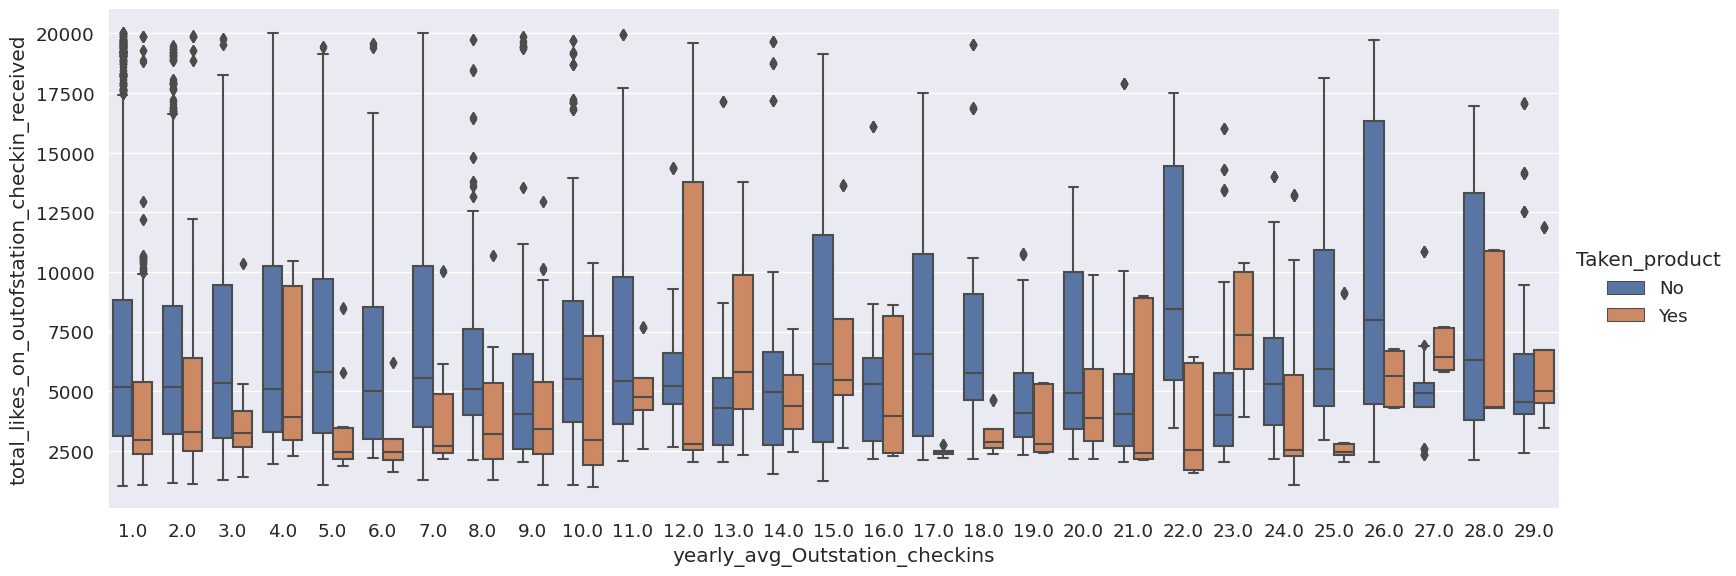

In [ ]:
#Likes received compared to outstation checkin vs target variable
sns.catplot(x = 'yearly_avg_Outstation_checkins',y='total_likes_on_outofstation_checkin_received',
           data=user_data,kind='box',hue='Taken_product',height=6,aspect=16/6,hue_order=['No','Yes'])
plt.show()

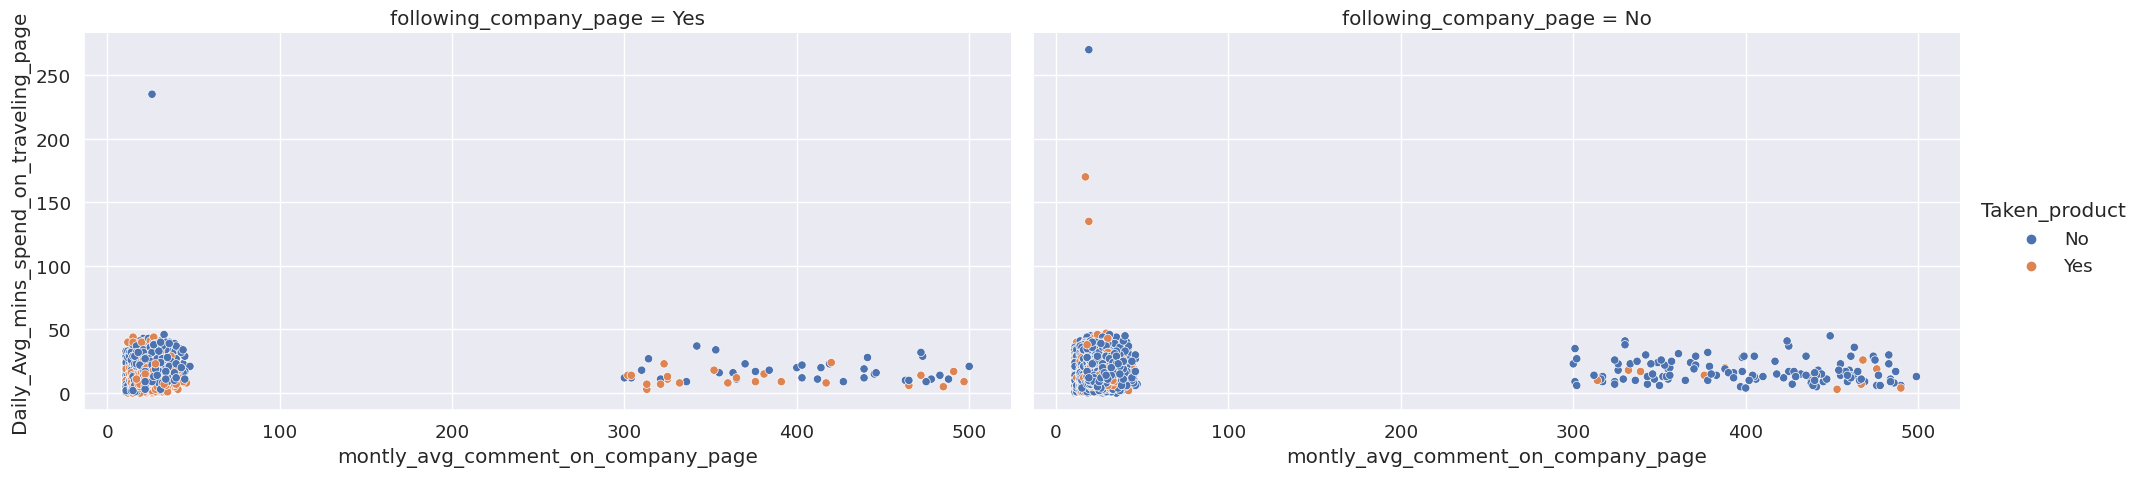

In [ ]:
sns.relplot(x='montly_avg_comment_on_company_page',y='Daily_Avg_mins_spend_on_traveling_page',
            data=user_data,col='following_company_page',hue='Taken_product',
            hue_order=['No','Yes'],
            height=5,aspect=2)

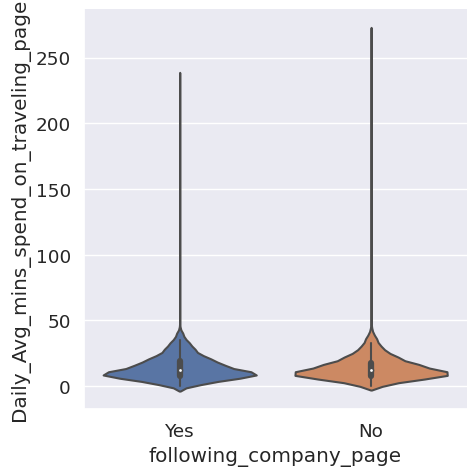

In [ ]:
sns.catplot(x='following_company_page',y='Daily_Avg_mins_spend_on_traveling_page',data=user_data,kind='violin')

In [ ]:
user_data[user_data['Taken_product']=='No']['yearly_avg_Outstation_checkins'].median()

3.0

In [ ]:
for i in num:
    print('Median of ',i,'for 1 ',user_data[user_data['Taken_product']=='Yes'][i].median())
    print('Median of ',i,'for 0',user_data[user_data['Taken_product']=='No'][i].median())

Median of  Yearly_avg_view_on_travel_page for 1  243.0
Median of  Yearly_avg_view_on_travel_page for 0 276.0
Median of  total_likes_on_outstation_checkin_given for 1  24511.0
Median of  total_likes_on_outstation_checkin_given for 0 28605.5
Median of  yearly_avg_Outstation_checkins for 1  7.0
Median of  yearly_avg_Outstation_checkins for 0 3.0
Median of  Yearly_avg_comment_on_travel_page for 1  74.0
Median of  Yearly_avg_comment_on_travel_page for 0 75.0
Median of  total_likes_on_outofstation_checkin_received for 1  3239.0
Median of  total_likes_on_outofstation_checkin_received for 0 5215.0
Median of  montly_avg_comment_on_company_page for 1  22.0
Median of  montly_avg_comment_on_company_page for 0 22.0
Median of  Daily_Avg_mins_spend_on_traveling_page for 1  9.0
Median of  Daily_Avg_mins_spend_on_traveling_page for 0 13.0


<ipython-input-55-b4e24d70364a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(user_data.corr(),annot=True,fmt='.2f',cmap='viridis')


Text(0.5, 1.0, 'Correlation Heatmap\n')

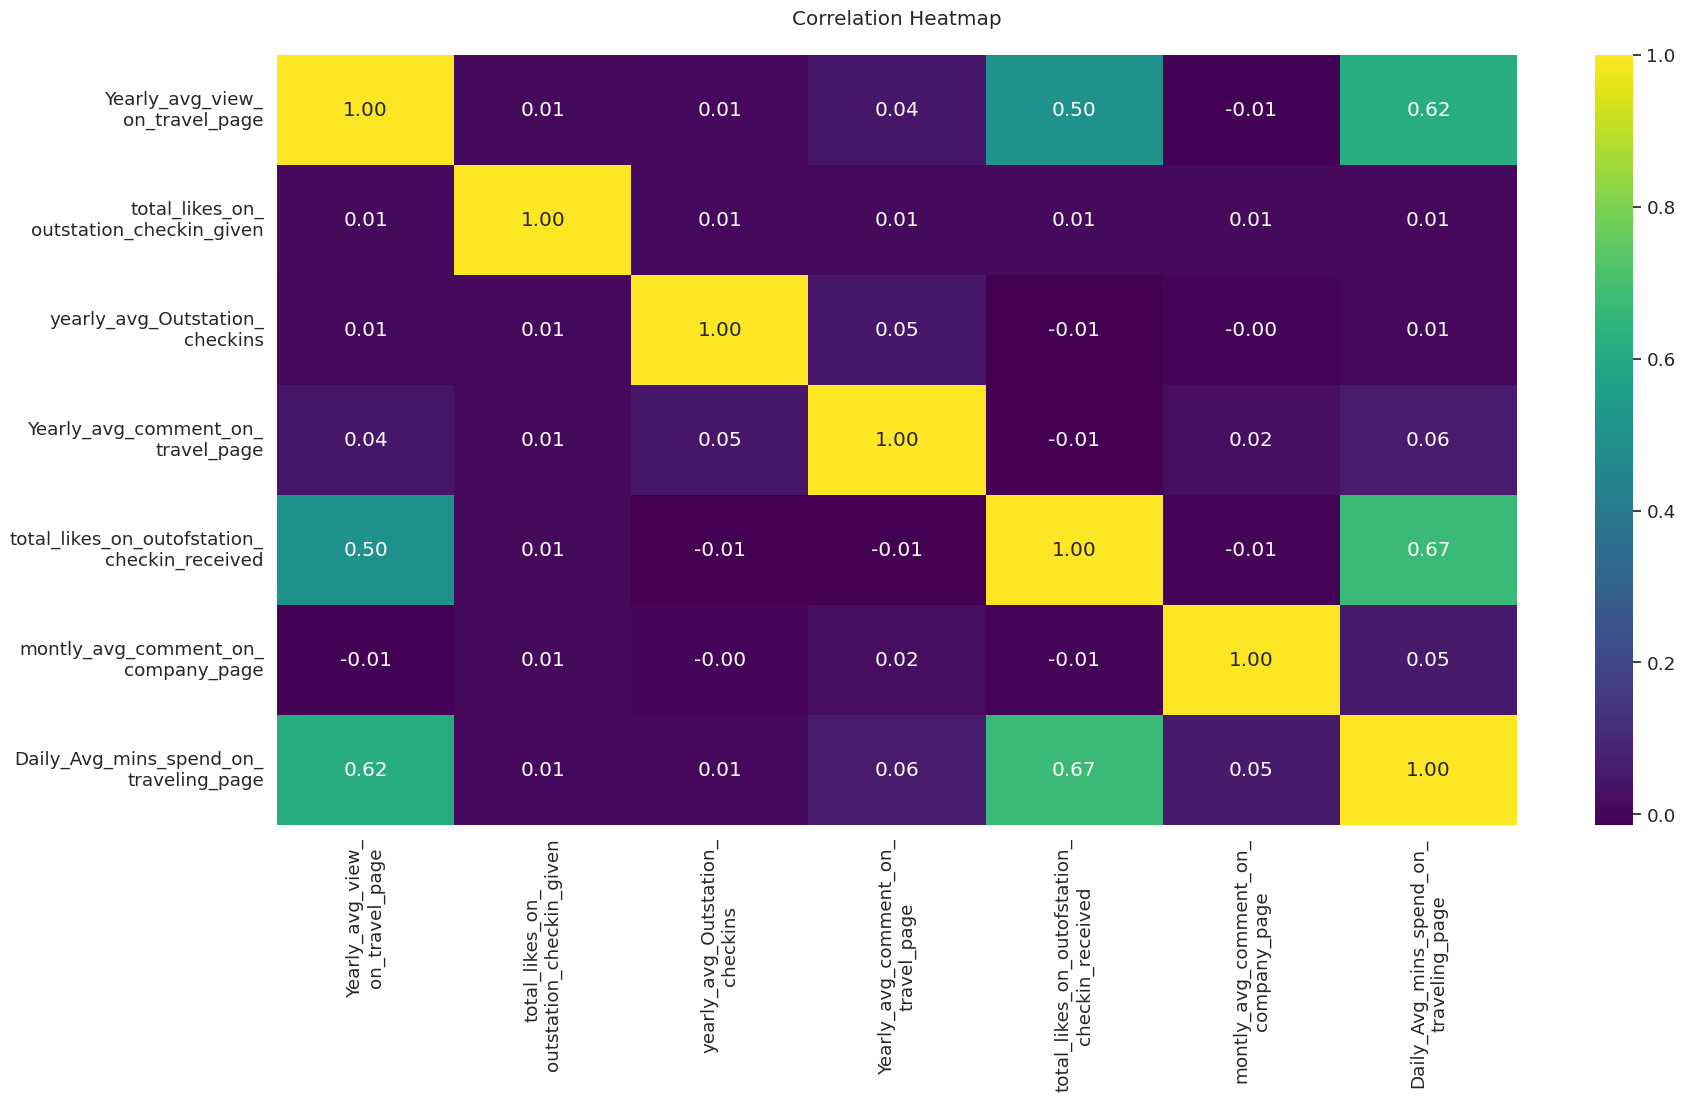

In [ ]:
plt.figure(figsize=(20,10))
g = sns.heatmap(user_data.corr(),annot=True,fmt='.2f',cmap='viridis')
g.set_xticklabels(['Yearly_avg_view_\non_travel_page',
 'total_likes_on_\noutstation_checkin_given',
 'yearly_avg_Outstation_\ncheckins',
 'Yearly_avg_comment_on_\ntravel_page',
 'total_likes_on_outofstation_\ncheckin_received',
 'montly_avg_comment_on_\ncompany_page',
 'Daily_Avg_mins_spend_on_\ntraveling_page'],rotation=90)
g.set_yticklabels(['Yearly_avg_view_\non_travel_page',
 'total_likes_on_\noutstation_checkin_given',
 'yearly_avg_Outstation_\ncheckins',
 'Yearly_avg_comment_on_\ntravel_page',
 'total_likes_on_outofstation_\ncheckin_received',
 'montly_avg_comment_on_\ncompany_page',
 'Daily_Avg_mins_spend_on_\ntraveling_page'],rotation=0)
g.set_title("Correlation Heatmap\n")

#### 3.a) Removal of unwanted variables (if applicable)

#### 3.b) Missing Value treatment (if applicable)

In [ ]:
user_data['following_company_page'] = np.where(user_data['following_company_page'].isna(),user_data['following_company_page'].mode(),user_data['following_company_page'])
user_data['preferred_device'] = np.where(user_data['preferred_device'].isna(),user_data['preferred_device'].mode(),user_data['preferred_device'])
user_data['preferred_location_type'] = np.where(user_data['preferred_location_type'].isna(),user_data['preferred_location_type'].mode(),user_data['preferred_location_type'])

In [ ]:
user_data['Yearly_avg_view_on_travel_page'] = np.where(user_data['Yearly_avg_view_on_travel_page'].isna(),user_data['Yearly_avg_view_on_travel_page'].median(),user_data['Yearly_avg_view_on_travel_page'])
user_data['total_likes_on_outstation_checkin_given'] = np.where(user_data['total_likes_on_outstation_checkin_given'].isna(),user_data['total_likes_on_outstation_checkin_given'].median(),user_data['total_likes_on_outstation_checkin_given'])
user_data['yearly_avg_Outstation_checkins'] = np.where(user_data['yearly_avg_Outstation_checkins'].isna(),user_data['yearly_avg_Outstation_checkins'].median(),user_data['yearly_avg_Outstation_checkins'])
user_data['Yearly_avg_comment_on_travel_page'] = np.where(user_data['Yearly_avg_comment_on_travel_page'].isna(),user_data['Yearly_avg_comment_on_travel_page'].median(),user_data['Yearly_avg_comment_on_travel_page'])

In [ ]:
user_data.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

#### 3.d) Outlier treatment (if required)

In [ ]:
def remove_outliers(column):
    Q1,Q3 = column.quantile([0.25,0.75])
    IQR = Q3-Q1
    Upper_limit = Q3 + (1.5 * IQR)
    Lower_limit = Q1 - (1.5 * IQR)
    return Upper_limit,Lower_limit

In [ ]:
for col in num:
    ur,lr = remove_outliers(user_data[col])
    user_data[col] = np.where(user_data[col]>ur, ur,user_data[col])
    user_data[col] = np.where(user_data[col]<lr, lr,user_data[col])

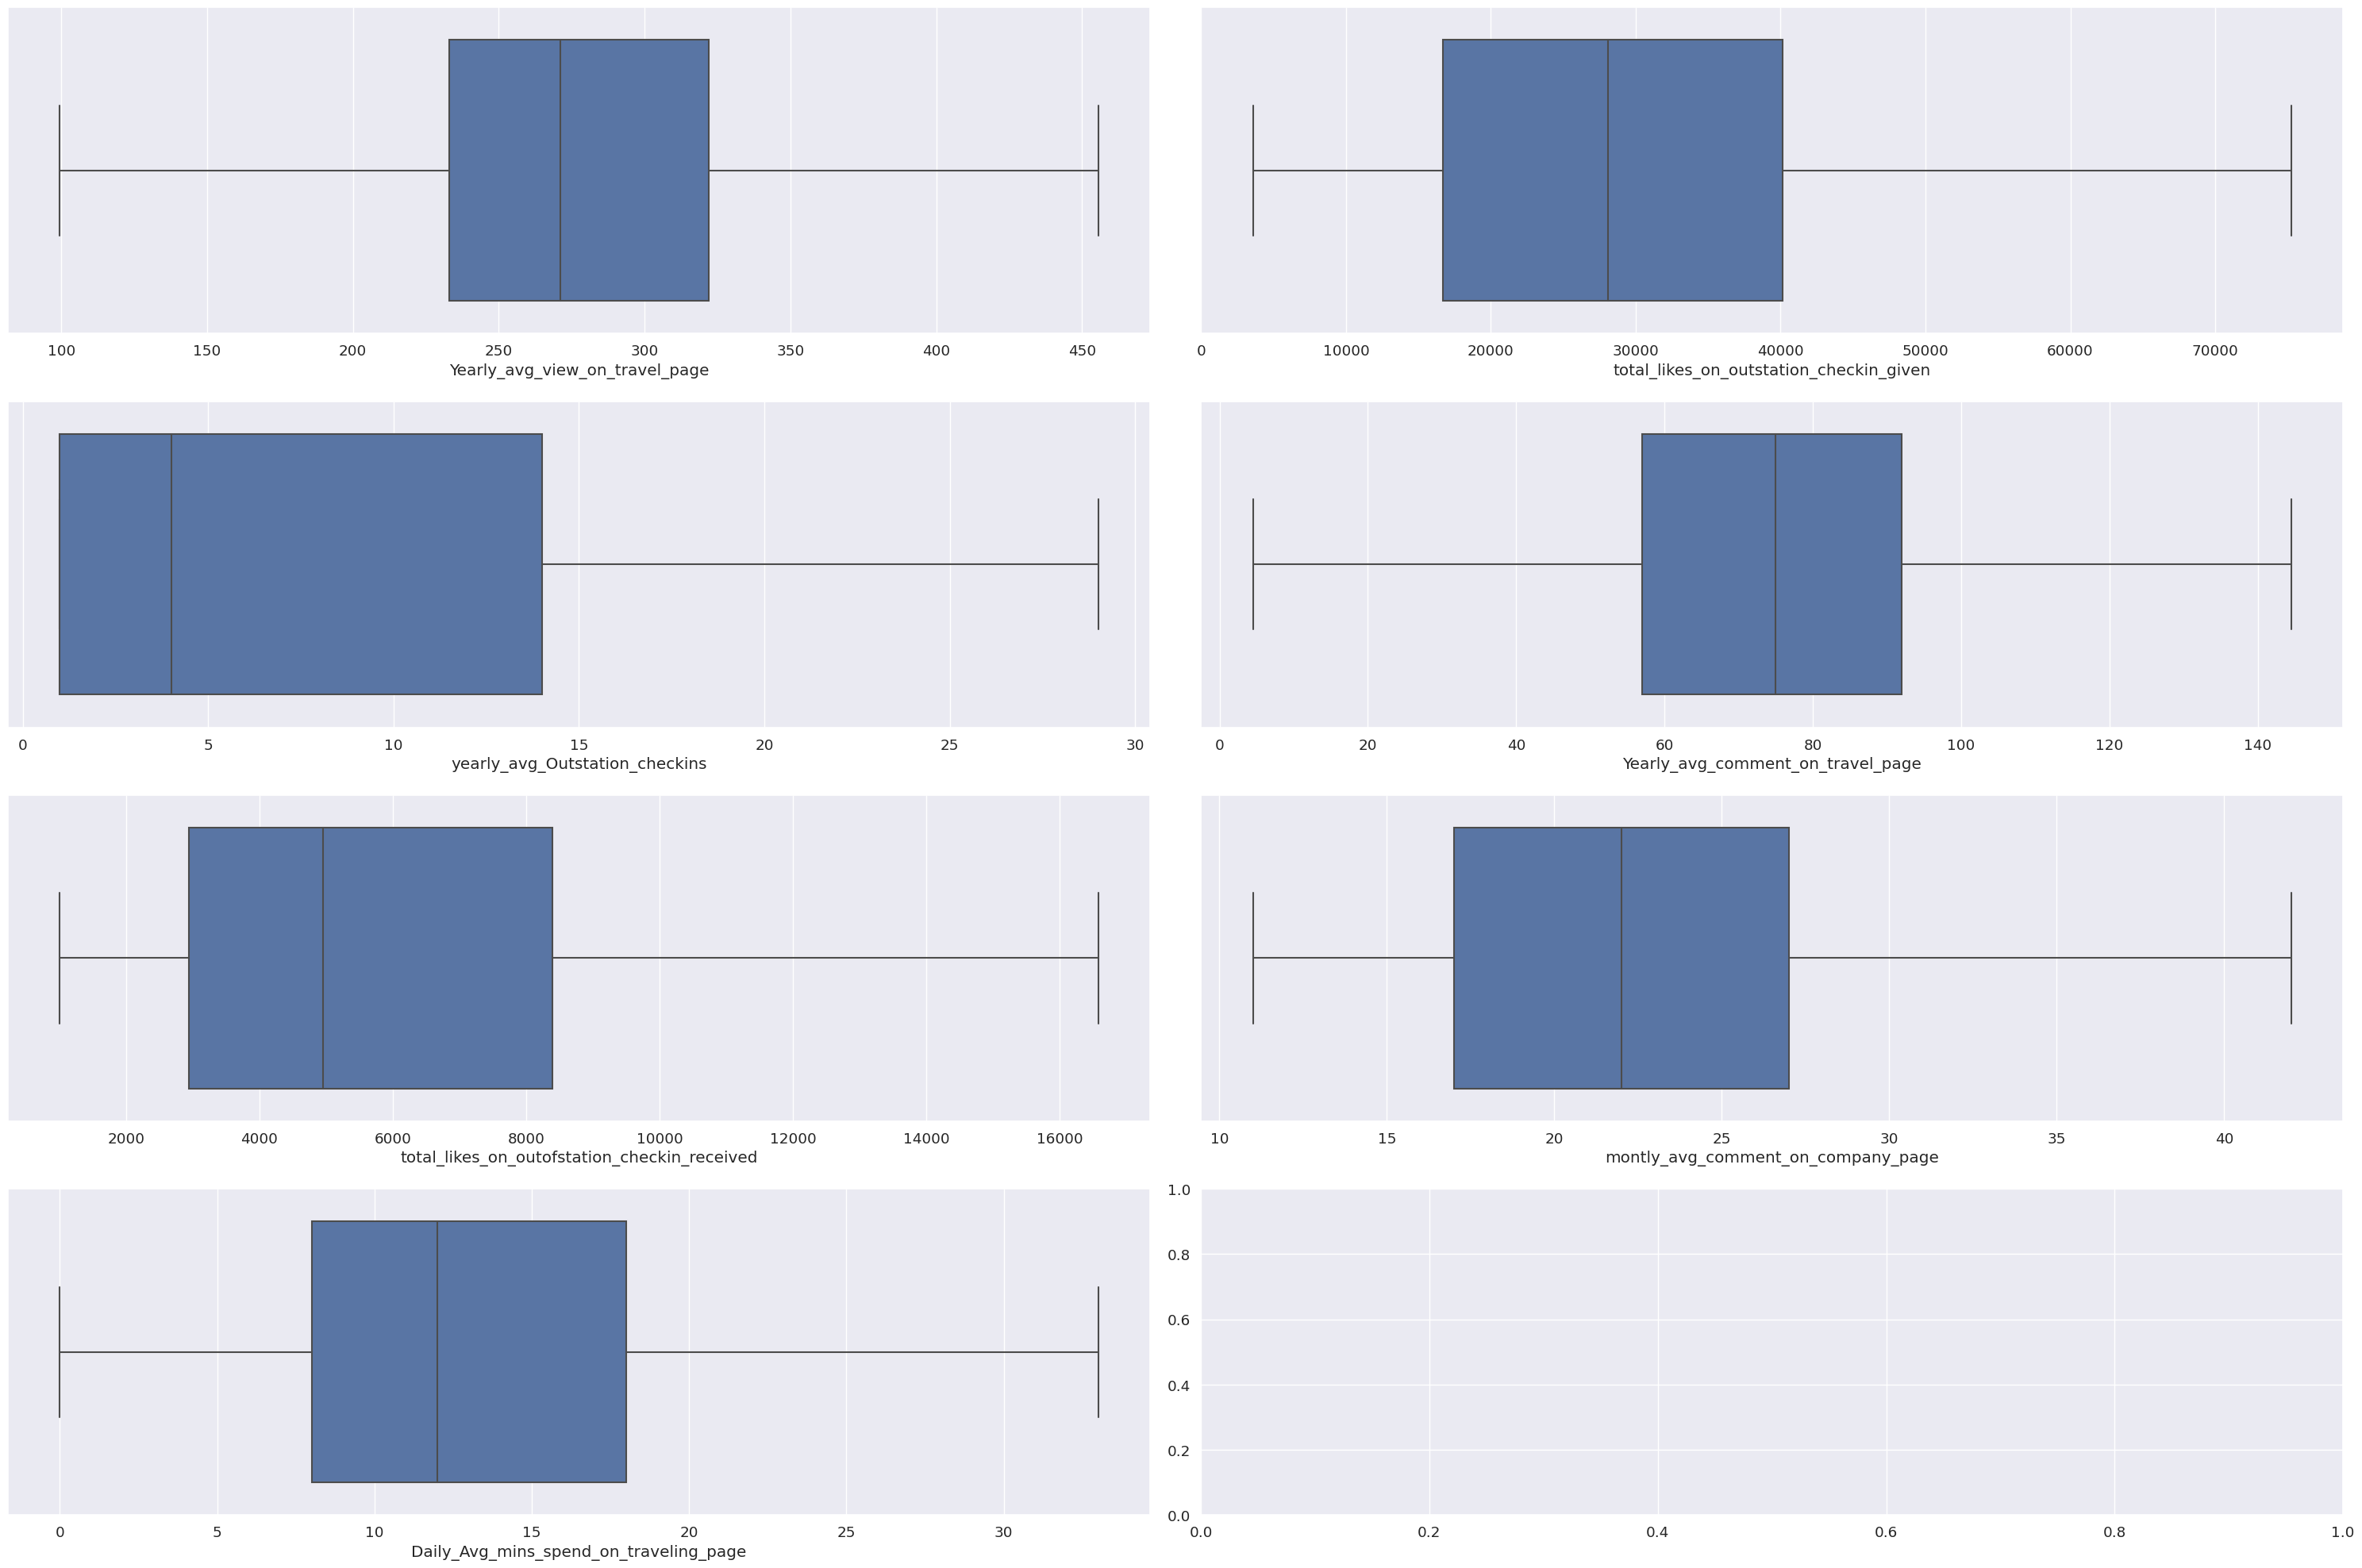

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(30,20))
for c,a in zip(num,axes.flatten()):
    sns.boxplot(x=user_data[c],ax=a)
    plt.tight_layout()

#### 3. e) Variable transformation (if applicable)

In [ ]:
#Creating dummy variables for different categories of preferred location type as it is a nominal variable
user_data_encoded = pd.get_dummies(user_data,columns=['preferred_location_type'],drop_first=True)
user_data_encoded

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0               Yes                           307.0           Mobile   
1                No                           367.0           Mobile   
2               Yes                           277.0           Mobile   
3                No                           247.0           Mobile   
4                No                           202.0           Mobile   
...             ...                             ...              ...   
11755            No                           279.0           Laptop   
11756            No                           305.0           Mobile   
11757            No                           214.0           Mobile   
11758            No                           382.0           Laptop   
11759            No                           270.0           Mobile   

       total_likes_on_outstation_checkin_given  \
0                                      38570.0   
1                                       9765.0   
2                                      48055.0   
3                                      48720.0   
4                                      20685.0   
...                                        ...   
11755                                  30987.0   
11756                                  21510.0   
11757                                   5478.0   
11758                                  35851.0   
11759                                  22025.0   

       yearly_avg_Outstation_checkins member_in_family  \
0                                 1.0                2   
1                                 1.0                1   
2                                 1.0                2   
3                                 1.0                4   
4                                 1.0                1   
...                               ...              ...   
11755                            23.0                2   
11756                             6.0                1   
11757                             4.0                3   
11758                             2.0                3   
11759                             8.0                3   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11755                               58.0   
11756                               55.0   
11757                              103.0   
11758                               83.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                            5993.0   
1                                            5130.0   
2                                            2090.0   
3                                            2909.0   
4                                            3468.0   
...                                             ...   
11755                                        2616.0   
11756                                       10041.0   
11757                                        6203.0   
11758                                        5444.0   
11759                                        4470.0   

      week_since_last_outstation_checkin following_company_page  \
0                                      8                    Yes   
1                                      1                     No   
2                                      6                    Yes   
3                                      1                    Yes   
4                                      9                     No   
...                                  ...                    ...   
11755                                  4                     No   
11756                                  4                     No   
11757                                  3          

In [ ]:
print(user_data['Taken_product'].value_counts())
print()
print(user_data['following_company_page'].value_counts())
print()
print(user_data['working_flag'].value_counts())
print()

No     9864
Yes    1896
Name: Taken_product, dtype: int64

No     8463
Yes    3297
Name: following_company_page, dtype: int64

No     9952
Yes    1808
Name: working_flag, dtype: int64



In [ ]:
#Converting the 'Yes' 'No' value as binary '1's and '0's
user_data_encoded['Taken_product'] = np.where(user_data_encoded['Taken_product']=='Yes',1,0)
user_data_encoded['following_company_page'] = np.where(user_data_encoded['following_company_page']=='Yes',1,0)
user_data_encoded['working_flag'] = np.where(user_data_encoded['working_flag']=='Yes',1,0)

In [ ]:
print(user_data_encoded['Taken_product'].value_counts())
print()
print(user_data_encoded['following_company_page'].value_counts())
print()
print(user_data_encoded['working_flag'].value_counts())
print()

0    9864
1    1896
Name: Taken_product, dtype: int64

0    8463
1    3297
Name: following_company_page, dtype: int64

0    9952
1    1808
Name: working_flag, dtype: int64



In [ ]:
user_data_encoded['Adult_flag'] = user_data_encoded['Adult_flag'].astype('int64')
user_data_encoded['member_in_family'] = user_data_encoded['member_in_family'].astype('int64')
user_data_encoded['week_since_last_outstation_checkin'] = user_data_encoded['week_since_last_outstation_checkin'].astype('int64')
user_data_encoded['travelling_network_rating'] = user_data_encoded['travelling_network_rating'].astype('int64')

In [ ]:
user_data_encoded.dtypes[user_data_encoded.dtypes=='object']

preferred_device    object
dtype: object

#### 3.f) Addition of new variables (if required)


In [ ]:
user_data_encoded['Popularity_Score'] = user_data_encoded['total_likes_on_outofstation_checkin_received'] / user_data_encoded['yearly_avg_Outstation_checkins']
user_data_encoded['Popularity_Score'].head()

0    5993.0
1    5130.0
2    2090.0
3    2909.0
4    3468.0
Name: Popularity_Score, dtype: float64

<Axes: xlabel='Popularity_Score', ylabel='Count'>

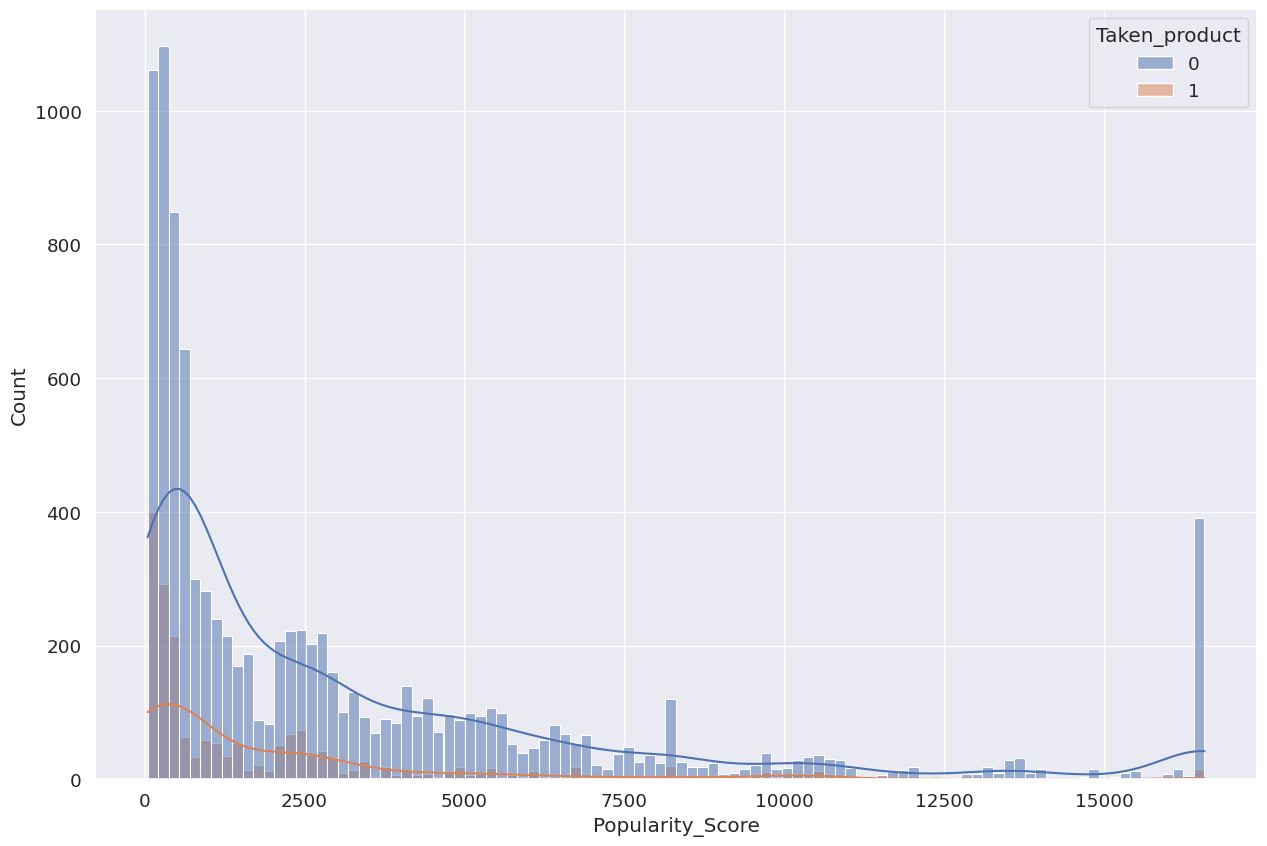

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x=user_data_encoded['Popularity_Score'],bins=100,
             kde=True,hue=user_data_encoded['Taken_product'])

In [ ]:
#Let's give labels for the each bucket of users based on their popularity scores
user_data_encoded['Popularity'] = pd.cut(user_data_encoded['Popularity_Score'],bins=[0,500,5000,12500,20000],labels=[1,2,3,4])
user_data_encoded['Popularity'].value_counts()

2    5644
1    3672
3    1824
4     620
Name: Popularity, dtype: int64

<Axes: xlabel='yearly_avg_Outstation_checkins', ylabel='Count'>

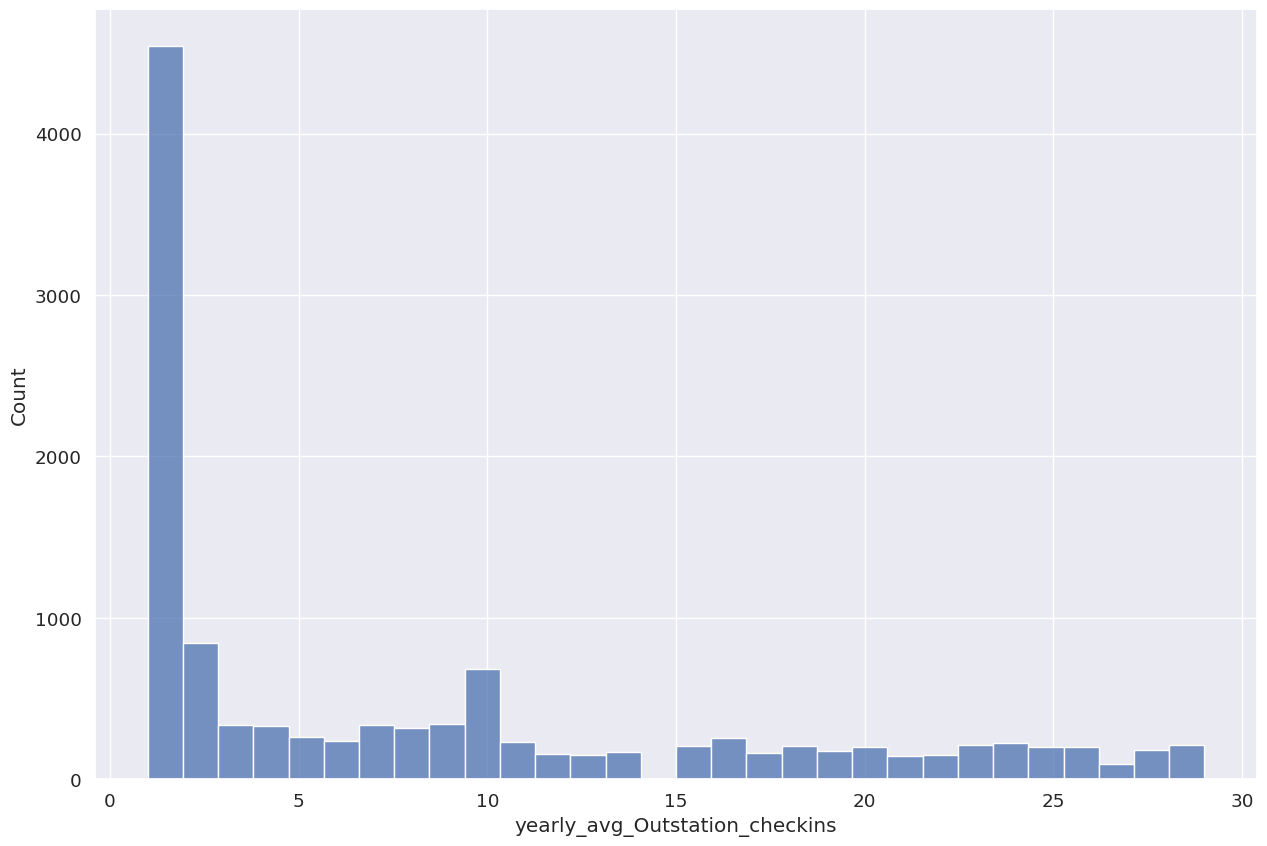

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(user_data_encoded['yearly_avg_Outstation_checkins'],bins=30)

In [ ]:
#Let's give labels for the each bucket of users based on their frequency of travel
user_data_encoded['Traveller'] = pd.cut(user_data_encoded['yearly_avg_Outstation_checkins'],bins=[0,2,11,29],labels=[1,2,3])
user_data_encoded['Traveller'].value_counts()

1    5388
3    3301
2    3071
Name: Traveller, dtype: int64

In [ ]:
user_data_encoded[user_data_encoded['Taken_product']==1]['Popularity_Score'].median()

650.125

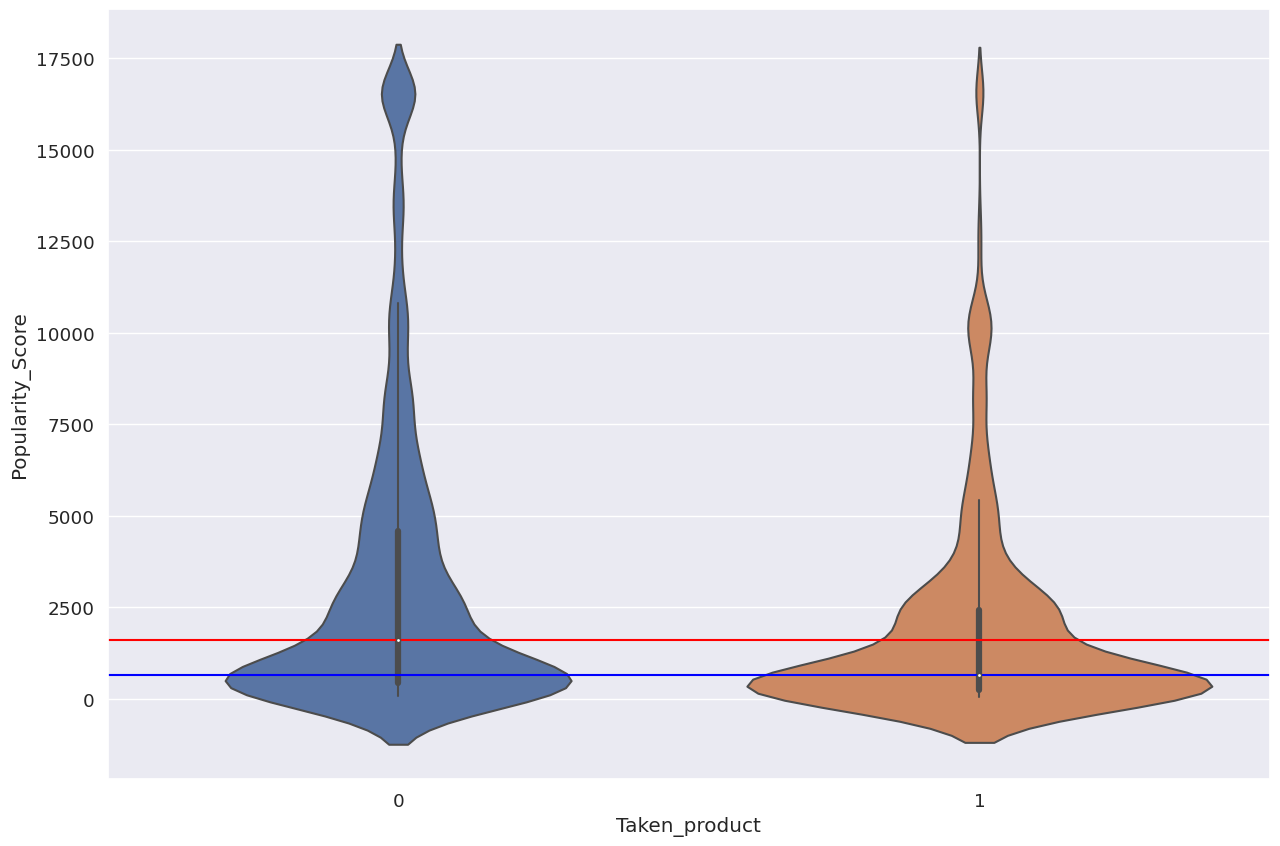

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x=user_data_encoded['Taken_product'],y=user_data_encoded['Popularity_Score'])
plt.axhline(y=user_data_encoded[user_data_encoded['Taken_product']==1]['Popularity_Score'].median(),color='blue')
plt.axhline(y=user_data_encoded[user_data_encoded['Taken_product']==0]['Popularity_Score'].median(),color='red')

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

formula = 'Popularity_Score ~ C(Taken_product)'
model = ols(formula, user_data_encoded).fit()
aov_table = anova_lm(model)
print(aov_table)

                       df        sum_sq       mean_sq           F  \
C(Taken_product)      1.0  2.999708e+09  2.999708e+09  192.429334   
Residual          11758.0  1.832910e+11  1.558862e+07         NaN   

                        PR(>F)  
C(Taken_product)  2.059847e-43  
Residual                   NaN  


Text(0.5, 1.0, 'Influence of New variables on Target Variable')

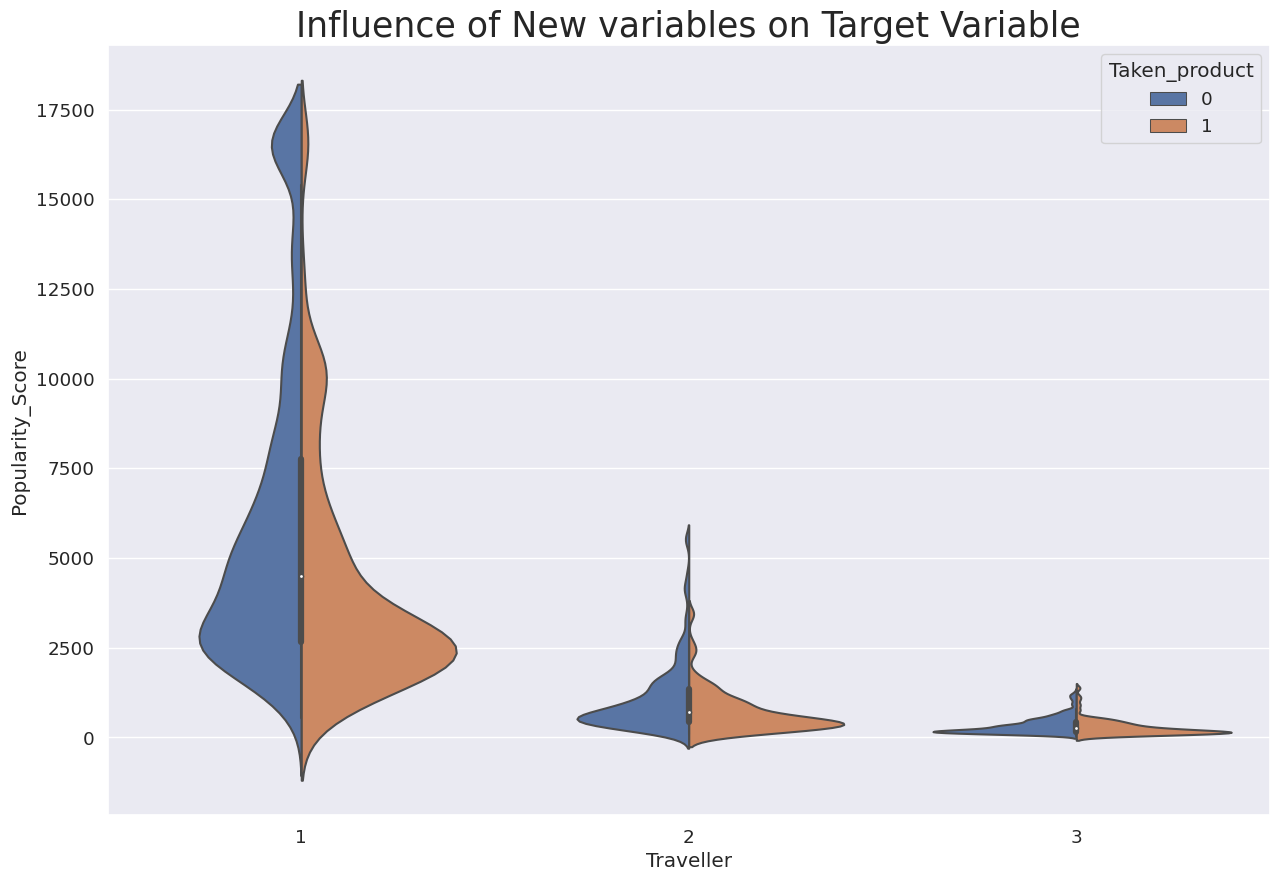

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(x=user_data_encoded['Traveller'],y=user_data_encoded['Popularity_Score'],hue=user_data_encoded['Taken_product'],split=True)
plt.title("Influence of New variables on Target Variable",fontsize=25)

## ANOVA
### Hypothesis testing for the relationship between the popularity score and the target variable.

In [ ]:
formula = 'Popularity_Score ~ C(Taken_product):C(Traveller)'
model = ols(formula, user_data_encoded).fit()
aov_table = anova_lm(model)
print(aov_table)
print()
print("As the p-value is <0.05 we can reject the null hyothesis. And conclude there will a relationship between the two variable")

                                    df        sum_sq       mean_sq  \
C(Taken_product):C(Traveller)      5.0  8.433153e+10  1.686631e+10   
Residual                       11754.0  1.019592e+11  8.674422e+06   

                                         F  PR(>F)  
C(Taken_product):C(Traveller)  1944.372317     0.0  
Residual                               NaN     NaN  

As the p-value is <0.05 we can reject the null hyothesis. And conclude there will a relationship between the two variable


## Chi-square Test

In [ ]:
from scipy.stats import chi2_contingency
chi2,pval,dof,exp_freq = chi2_contingency(pd.crosstab(user_data_encoded['Popularity'],user_data_encoded['Taken_product']),correction=False)
print(pval)
print("As the p-value is <0.05 we can reject the null-hypothesis,thus variable 'Popularity' has significance in predicting the 'Taken_product'")

1.0383545003542686e-63
As the p-value is <0.05 we can reject the null-hypothesis,thus variable 'Popularity' has significance in predicting the 'Taken_product'


Text(0.5, 1.0, 'Influence of Popularity on Target Variable')

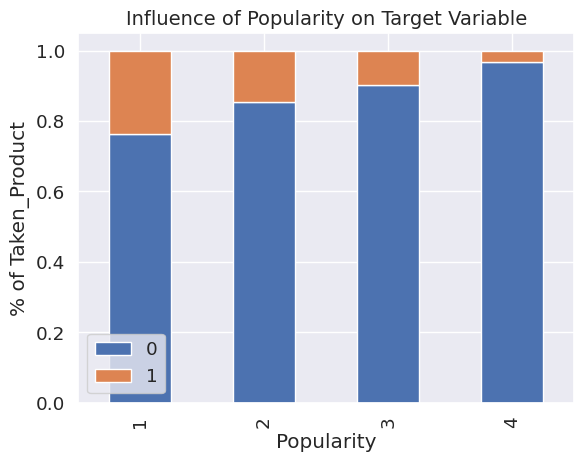

In [ ]:
pd.crosstab(user_data_encoded['Popularity'],user_data_encoded['Taken_product'],normalize='index').plot.bar(stacked=True).legend(loc='lower left')
plt.ylabel('% of Taken_Product')
plt.title("Influence of Popularity on Target Variable",fontsize=14)

In [ ]:
chi2,pval,dof,exp_freq = chi2_contingency(pd.crosstab(user_data_encoded['Traveller'],user_data_encoded['Taken_product']),correction=False)
print(pval)
print("As the p-value is <0.05 we can reject the null-hypothesis, thus variable 'Popularity' has significance in predicting the 'Taken_product'")

8.365206165807293e-22
As the p-value is <0.05 we can reject the null-hypothesis, thus variable 'Popularity' has significance in predicting the 'Taken_product'


#### Since the p-value for both chi-square test is < 0.05, we can reject the null-hypothesis, thus the variables 'popularity' and 'passenger' have significance in predicting 'taken_product'

Text(0.5, 1.0, 'Influence of Traveller on Target Variable')

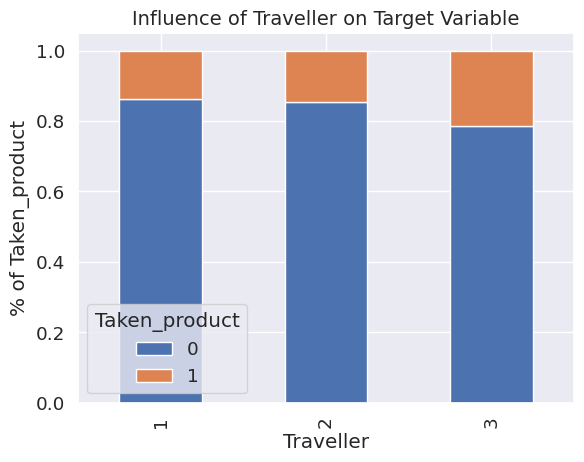

In [ ]:
pd.crosstab(user_data_encoded['Traveller'],user_data_encoded['Taken_product'],normalize='index').plot.bar(stacked=True)
plt.ylabel('% of Taken_product')
plt.title("Influence of Traveller on Target Variable",fontsize=14)

In [ ]:
user_data_encoded['Popularity'] = user_data_encoded['Popularity'].astype('int64')
user_data_encoded['Traveller'] = user_data_encoded['Traveller'].astype('int64')

## 4) Business insights from EDA

#### 4. a) Is the data unbalanced? If so, what can be done? Please explain in the context of the business.

In [ ]:
data_laptop = user_data_encoded[user_data_encoded['preferred_device']=='Laptop']

In [ ]:
data_laptop.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)
data_laptop

<ipython-input-84-724f9a7f8f79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_laptop.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)


Taken_product  Yearly_avg_view_on_travel_page  \
5881               0                           379.0   
5883               0                           255.0   
5885               0                           250.0   
5888               0                           295.0   
5906               1                           250.0   
...              ...                             ...   
11730              0                           278.0   
11742              1                           388.0   
11746              0                           268.0   
11755              0                           279.0   
11758              0                           382.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
5881                                    9776.0                 1   
5883                                   48725.0                 4   
5885                                   35184.0                 2   
5888                                    7572.0                 3   
5906                                   39379.0                 1   
...                                        ...               ...   
11730                                  24127.0                 2   
11742                                  30775.0                 4   
11746                                  42010.0                 4   
11755                                  30987.0                 2   
11758                                  35851.0                 3   

       Yearly_avg_comment_on_travel_page  \
5881                                64.0   
5883                                59.0   
5885                                84.0   
5888                                48.0   
5906                                80.0   
...                                  ...   
11730                              115.0   
11742                              109.0   
11746                               98.0   
11755                               58.0   
11758                               83.0   

       total_likes_on_outofstation_checkin_received  \
5881                                         5142.0   
5883                                         2913.0   
5885                                         3074.0   
5888                                         9532.0   
5906                                         3926.0   
...                                             ...   
11730                                        5184.0   
11742                                        6787.0   
11746                                        5753.0   
11755                                        2616.0   
11758                                        5444.0   

       week_since_last_outstation_checkin  following_company_page  \
5881                                    1                       0   
5883                                    1                       1   
5885                                    0                       0   
5888                                    0                       0   
5906                                    1                       1   
...                                   ...                     ...   
11730                                   7                       0   
11742                                   8                       0   
11746                                   2                       1   
11755                                   4                       0   
11758                                   3                       0   

       montly_avg_comment_on_company_page  working_flag  \
5881                                 33.0             1   
5883                                 19.0             0   
5885                                 23.0             0   
5888                                 33.0             1   
5906                                 33.0             1   
...                                   ...           ...   
11730                                35.0             0   
11742                     

In [ ]:
data_mobile = user_data_encoded[user_data_encoded['preferred_device']=='Mobile']

In [ ]:
data_mobile.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)
data_mobile

<ipython-input-86-e6b14d170eeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mobile.drop(['preferred_device','Popularity_Score','yearly_avg_Outstation_checkins'],axis=1,inplace=True)


Taken_product  Yearly_avg_view_on_travel_page  \
0                  1                           307.0   
1                  0                           367.0   
2                  1                           277.0   
3                  0                           247.0   
4                  0                           202.0   
...              ...                             ...   
11753              0                           247.0   
11754              0                           210.0   
11756              0                           305.0   
11757              0                           214.0   
11759              0                           270.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
0                                      38570.0                 2   
1                                       9765.0                 1   
2                                      48055.0                 2   
3                                      48720.0                 4   
4                                      20685.0                 1   
...                                        ...               ...   
11753                                  11418.0                 3   
11754                                  40886.0                 3   
11756                                  21510.0                 1   
11757                                   5478.0                 3   
11759                                  22025.0                 3   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11753                               99.0   
11754                               53.0   
11756                               55.0   
11757                              103.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                            5993.0   
1                                            5130.0   
2                                            2090.0   
3                                            2909.0   
4                                            3468.0   
...                                             ...   
11753                                        9983.0   
11754                                        3024.0   
11756                                       10041.0   
11757                                        6203.0   
11759                                        4470.0   

       week_since_last_outstation_checkin  following_company_page  \
0                                       8                       1   
1                                       1                       0   
2                                       6                       1   
3                                       1                       1   
4                                       9                       0   
...                                   ...                     ...   
11753                                   1                       0   
11754                                   2                       0   
11756                                   4                       0   
11757                                   3                       1   
11759                                   2                       0   

       montly_avg_comment_on_company_page  working_flag  \
0                                    11.0             0   
1                                    23.0             1   
2                                    15.0             0   
3                                    11.0             0   
4                                    12.0             0   
...                                   ...           ...   
11753                                28.0             0   
11754                     

#### Checking for class imbalance

In [ ]:
data_laptop['Taken_product'].value_counts(normalize=True)

0    0.750903
1    0.249097
Name: Taken_product, dtype: float64

In [ ]:
data_mobile['Taken_product'].value_counts(normalize=True)

0    0.847916
1    0.152084
Name: Taken_product, dtype: float64

.

.

#Model building and interpretation.


##Splitting the data set into 'predictor' and 'target' variables

In [ ]:
X_laptop = data_laptop.drop('Taken_product',axis=1)
Y_laptop = data_laptop['Taken_product']
print('Size of X_laptop: ',X_laptop.shape)
print('Size of Y_laptop: ',Y_laptop.shape)

Size of X_laptop:  (1108, 27)
Size of Y_laptop:  (1108,)


In [ ]:
X_mobile = data_mobile.drop('Taken_product',axis=1)
Y_mobile = data_mobile['Taken_product']
print('Size of X_mobile: ',X_mobile.shape)
print('Size of Y_mobile: ',Y_mobile.shape)

Size of X_mobile:  (10652, 27)
Size of Y_mobile:  (10652,)


##Split the data into test and training datasets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#for laptop data
X_laptop_train, X_laptop_test, y_laptop_train, y_laptop_test = train_test_split(X_laptop,Y_laptop,test_size=0.30,random_state=1)
print('Size of X_train for laptop: ', X_laptop_train.shape)
print('Size of X_test for laptop: ',X_laptop_test.shape)
print('Size of y_train for laptop: ',y_laptop_train.shape)
print('Size of y_test for laptop: ',y_laptop_test.shape)

Size of X_train for laptop:  (775, 27)
Size of X_test for laptop:  (333, 27)
Size of y_train for laptop:  (775,)
Size of y_test for laptop:  (333,)


In [ ]:
#for mobile data
X_mobile_train, X_mobile_test, y_mobile_train, y_mobile_test = train_test_split(X_mobile,Y_mobile,test_size=0.30,random_state=1)
print('Size of X_train for mobile: ', X_mobile_train.shape)
print('Size of X_test for mobile: ',X_mobile_test.shape)
print('Size of y_train for mobile: ',y_mobile_train.shape)
print('Size of y_test for mobile: ',y_mobile_test.shape)

Size of X_train for mobile:  (7456, 27)
Size of X_test for mobile:  (3196, 27)
Size of y_train for mobile:  (7456,)
Size of y_test for mobile:  (3196,)


In [ ]:
X_laptop_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 9404 to 11483
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                775 non-null    float64
 1   total_likes_on_outstation_checkin_given       775 non-null    float64
 2   member_in_family                              775 non-null    int64  
 3   Yearly_avg_comment_on_travel_page             775 non-null    float64
 4   total_likes_on_outofstation_checkin_received  775 non-null    float64
 5   week_since_last_outstation_checkin            775 non-null    int64  
 6   following_company_page                        775 non-null    int64  
 7   montly_avg_comment_on_company_page            775 non-null    float64
 8   working_flag                                  775 non-null    int64  
 9   travelling_network_rating                     775 non-null  

In [ ]:
num_columns = X_laptop_train.select_dtypes('float64').columns
cat_columns = X_laptop_train.select_dtypes(['int64','uint8']).columns
print(len(cat_columns))
print(len(num_columns))

21
6


##Scale the 'predictor' variables as some models are sensitive to the scales of different variables.

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
lap_num_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_laptop_train[num_columns]),columns=num_columns,index=X_laptop_train.index)
X_laptop_train_scaled = lap_num_scaled_train
X_laptop_train_scaled[cat_columns] = X_laptop_train[cat_columns]
lap_num_scaled_test = pd.DataFrame(std_scaler.transform(X_laptop_test[num_columns]),columns=num_columns,index=X_laptop_test.index)
X_laptop_test_scaled = lap_num_scaled_test
X_laptop_test_scaled[cat_columns] = X_laptop_test[cat_columns]
print(X_laptop_train_scaled.shape)
print(X_laptop_test_scaled.shape)

(775, 27)
(333, 27)


In [ ]:
mob_num_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_mobile_train[num_columns]),columns=num_columns,index=X_mobile_train.index)
X_mobile_train_scaled = mob_num_scaled_train
X_mobile_train_scaled[cat_columns] = X_mobile_train[cat_columns]
mob_num_scaled_test = pd.DataFrame(std_scaler.transform(X_mobile_test[num_columns]),columns=num_columns,index=X_mobile_test.index)
X_mobile_test_scaled = mob_num_scaled_test
X_mobile_test_scaled[cat_columns] = X_mobile_test[cat_columns]
print(X_mobile_train_scaled.shape)
print(X_mobile_test_scaled.shape)

(7456, 27)
(3196, 27)


#Models for Laptop

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [ ]:
vif_laptop = calc_vif(X_laptop_train_scaled)
vif_laptop.sort_values('VIF',ascending=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


variables       VIF
6                               member_in_family  9.775742
10                     travelling_network_rating  7.809063
25                                    Popularity  7.460796
26                                     Traveller  6.959013
5         Daily_Avg_mins_spend_on_traveling_page  3.025502
7             week_since_last_outstation_checkin  2.947541
11                                    Adult_flag  2.333614
3   total_likes_on_outofstation_checkin_received  2.313665
0                 Yearly_avg_view_on_travel_page  1.822134
17       preferred_location_type_Historical site  1.712719
9                                   working_flag  1.652522
8                         following_company_page  1.515366
4             montly_avg_comment_on_company_page  1.452979
12            preferred_location_type_Big Cities  1.287149
24              preferred_location_type_Trekking  1.229140
21                 preferred_location_type_Other  1.192030
16         preferred_location_type_Hill Stations  1.089419
2              Yearly_avg_comment_on_travel_page  1.051719
1        total_likes_on_outstation_checkin_given  1.048431
13         preferred_location_type_Entertainment       NaN
14             preferred_location_type_Financial       NaN
15                  preferred_location_type_Game       NaN
18               preferred_location_type_Medical       NaN
19                 preferred_location_type_Movie       NaN
20                   preferred_location_type_OTT       NaN
22          preferred_location_type_Social media       NaN
23       preferred_location_type_Tour and Travel       NaN

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic_lap = LogisticRegression(random_state=123)
model_logistic_lap.fit(X_laptop_train_scaled,y_laptop_train)

LogisticRegression(random_state=123)

In [ ]:
def make_confusion_matrix(model_name,model,y_actual,X,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth
    '''
    fig,axes = plt.subplots(1,2,figsize = (12,5))
    for i,j,a,m in zip(y_actual,X,axes,model_name):
        y_predict = model.predict(j)
        cm=metrics.confusion_matrix( i, y_predict, labels=[0, 1])
        df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                      columns = ['Predicted - No','Predicted - Yes'])
        g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        g.set_title(m)

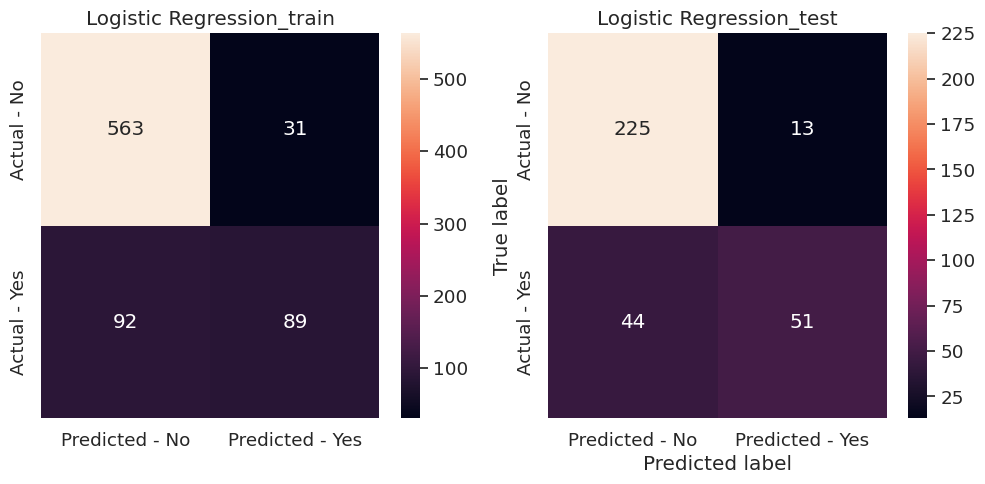

In [ ]:
make_confusion_matrix(['Logistic Regression_train','Logistic Regression_test'],model_logistic_lap
                      ,[y_laptop_train,y_laptop_test],[X_laptop_train_scaled,X_laptop_test_scaled])

In [ ]:
pred_laptop_train_model_logistic = model_logistic_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_logistic = model_logistic_lap.predict(X_laptop_test_scaled)
pred_prob_laptop_train_model_logistic = model_logistic_lap.predict_proba(X_laptop_train_scaled)
pred_prob_laptop_test_model_logistic = model_logistic_lap.predict_proba(X_laptop_test_scaled)
print('Train Accuracy of the Logistic Regression model: ',model_logistic_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Logistic Regression model: ',model_logistic_lap.score(X_laptop_test_scaled,y_laptop_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_logistic))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_logistic))
print()
print('Train AUC Score of the Logistic Regression Model:', metrics.roc_auc_score(y_laptop_train,pred_prob_laptop_train_model_logistic[:,1]))
print('Test AUC Score of the Logistic Regression Model:', metrics.roc_auc_score(y_laptop_test,pred_prob_laptop_test_model_logistic[:,1]))

Train Accuracy of the Logistic Regression model:  0.8412903225806452
Test Accuracy of the Logistic Regression model:  0.8288288288288288

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       594
           1       0.74      0.49      0.59       181

    accuracy                           0.84       775
   macro avg       0.80      0.72      0.75       775
weighted avg       0.83      0.84      0.83       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       238
           1       0.80      0.54      0.64        95

    accuracy                           0.83       333
   macro avg       0.82      0.74      0.76       333
weighted avg       0.83      0.83      0.82       333


Train AUC Score of the Logistic Regression Model: 0.8386163662406757
Test AUC Score of the Logistic Regression Model: 0.865015479876161


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT_lap = DecisionTreeClassifier(random_state=123)
model_DT_lap.fit(X_laptop_train_scaled,y_laptop_train)

DecisionTreeClassifier(random_state=123)

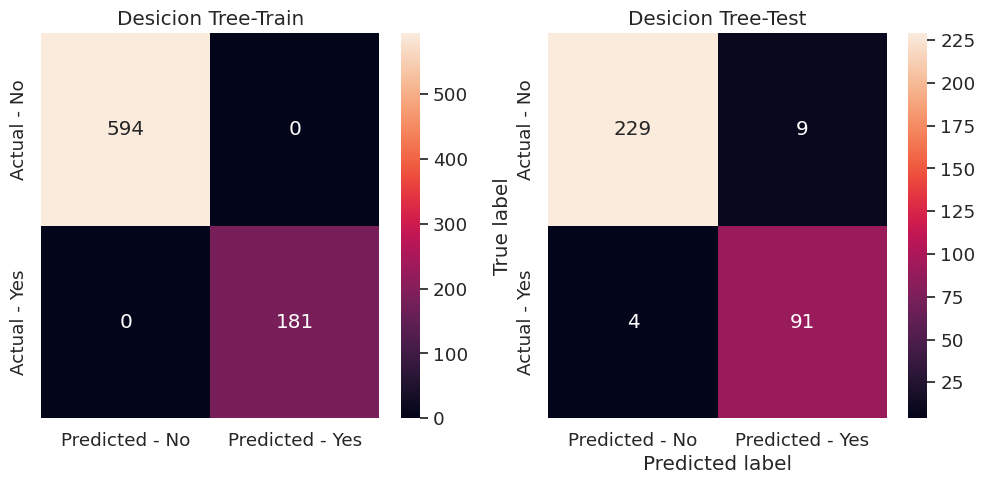

In [ ]:
make_confusion_matrix(['Desicion Tree-Train','Desicion Tree-Test']
                      ,model_DT_lap,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [ ]:
pred_laptop_train_model_DT = model_DT_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_DT = model_DT_lap.predict(X_laptop_test_scaled)
print('Train Accuracy of the Decision Tree model: ',model_DT_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Decision model: ',model_DT_lap.score(X_laptop_test_scaled,y_laptop_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_DT))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_DT))

Train Accuracy of the Decision Tree model:  1.0
Test Accuracy of the Decision model:  0.960960960960961

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       238
           1       0.91      0.96      0.93        95

    accuracy                           0.96       333
   macro avg       0.95      0.96      0.95       333
weighted avg       0.96      0.96      0.96       333



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF_lap = RandomForestClassifier(random_state=123)
model_RF_lap.fit(X_laptop_train_scaled,y_laptop_train)

RandomForestClassifier(random_state=123)

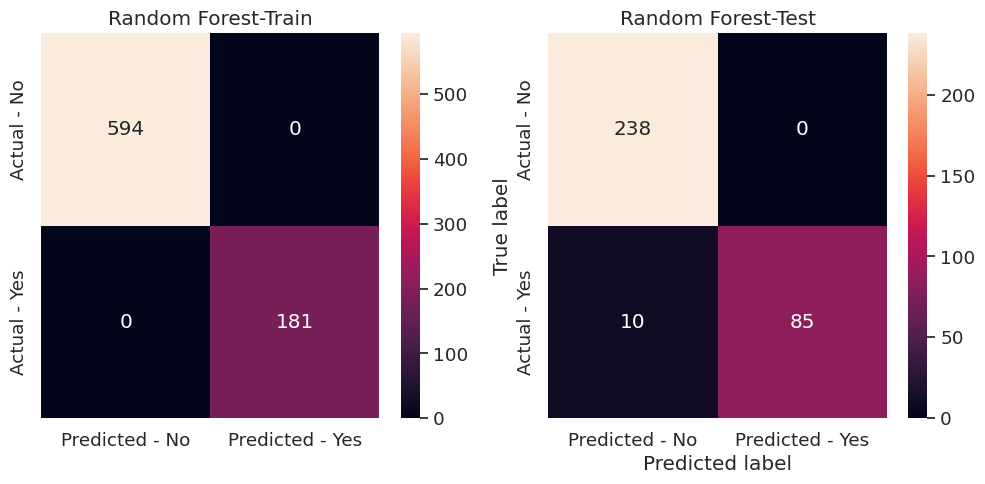

In [ ]:
make_confusion_matrix(['Random Forest-Train','Random Forest-Test']
                      ,model_RF_lap
                      ,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [ ]:
pred_laptop_train_model_RF = model_RF_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_RF = model_RF_lap.predict(X_laptop_test_scaled)
print('Train Accuracy of the Random Forest model: ',model_RF_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Random Forest model: ',model_RF_lap.score(X_laptop_test_scaled,y_laptop_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_RF))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_RF))

Train Accuracy of the Random Forest model:  1.0
Test Accuracy of the Random Forest model:  0.96996996996997

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       238
           1       1.00      0.89      0.94        95

    accuracy                           0.97       333
   macro avg       0.98      0.95      0.96       333
weighted avg       0.97      0.97      0.97       333



In [ ]:
from xgboost import XGBClassifier
model_XGB_lap = XGBClassifier(random_state=123)
model_XGB_lap.fit(X_laptop_train_scaled,y_laptop_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

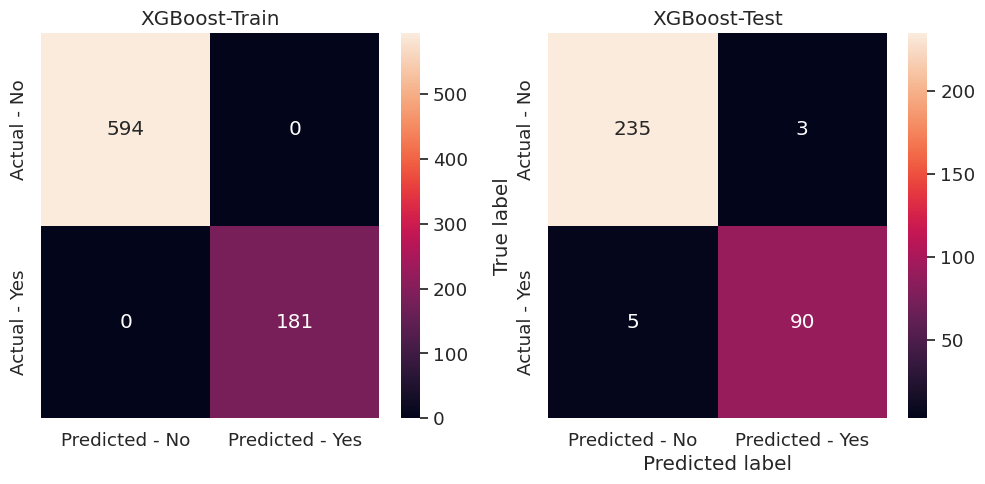

In [ ]:
make_confusion_matrix(['XGBoost-Train','XGBoost-Test']
                      ,model_XGB_lap
                      ,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [ ]:
pred_laptop_train_model_XGB = model_XGB_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_XGB = model_XGB_lap.predict(X_laptop_test_scaled)
print('Train Accuracy of the XGBoost model: ',model_XGB_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the XGBoost model: ',model_XGB_lap.score(X_laptop_test_scaled,y_laptop_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_XGB))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_XGB))

Train Accuracy of the XGBoost model:  1.0
Test Accuracy of the XGBoost model:  0.975975975975976

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       238
           1       0.97      0.95      0.96        95

    accuracy                           0.98       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.98      0.98      0.98       333



## Artifical Neural Network (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_ANN_lap = MLPClassifier(activation='logistic',solver='adam',max_iter=400,random_state=123)
model_ANN_lap.fit(X_laptop_train_scaled,y_laptop_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=400, random_state=123)

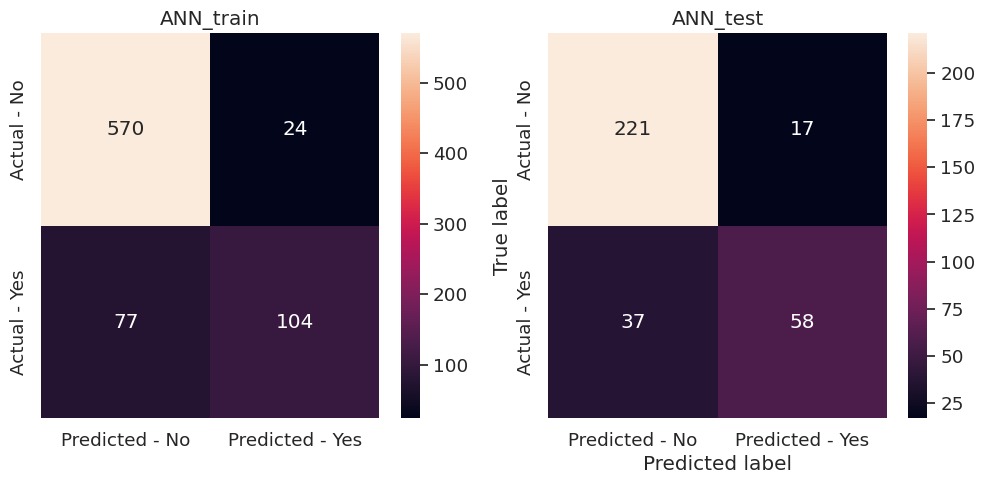

In [ ]:
make_confusion_matrix(['ANN_train','ANN_test']
                        ,model_ANN_lap
                        ,[y_laptop_train,y_laptop_test]
                        ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [ ]:
pred_laptop_train_model_ANN = model_ANN_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_ANN = model_ANN_lap.predict(X_laptop_test_scaled)
print('Train Accuracy of the ANN model: ',model_ANN_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the ANN model: ',model_ANN_lap.score(X_laptop_test_scaled,y_laptop_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_ANN))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_ANN))

Train Accuracy of the ANN model:  0.8696774193548387
Test Accuracy of the ANN model:  0.8378378378378378

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       594
           1       0.81      0.57      0.67       181

    accuracy                           0.87       775
   macro avg       0.85      0.77      0.80       775
weighted avg       0.86      0.87      0.86       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       238
           1       0.77      0.61      0.68        95

    accuracy                           0.84       333
   macro avg       0.81      0.77      0.79       333
weighted avg       0.83      0.84      0.83       333



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
train_pred = [pred_laptop_train_model_logistic, pred_laptop_train_model_DT, pred_laptop_train_model_RF, pred_laptop_train_model_XGB, pred_laptop_train_model_ANN]
test_pred = [pred_laptop_test_model_logistic, pred_laptop_test_model_DT, pred_laptop_test_model_RF, pred_laptop_test_model_XGB, pred_laptop_test_model_ANN]
for i,j in zip(train_pred,test_pred):
    acc_train.append(accuracy_score(y_laptop_train,i))
    pre_train.append(precision_score(y_laptop_train,i,zero_division=0))
    rec_train.append(recall_score(y_laptop_train,i))
    f1_train.append(f1_score(y_laptop_train,i))
    acc_test.append(accuracy_score(y_laptop_test,j))
    pre_test.append(precision_score(y_laptop_test,j,zero_division=0))
    rec_test.append(recall_score(y_laptop_test,j))
    f1_test.append(f1_score(y_laptop_test,j))
metric_laptop = pd.DataFrame({'Model':mod,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test})

## Model Metrics - Laptop Data

In [ ]:
lap_train_auc_score = []
for i in [model_logistic_lap,model_DT_lap,model_RF_lap,model_XGB_lap,model_ANN_lap]:
    lap_train_auc_score.append(metrics.roc_auc_score(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1]))
lap_test_auc_score = []
for i in [model_logistic_lap,model_DT_lap,model_RF_lap,model_XGB_lap,model_ANN_lap]:
    lap_test_auc_score.append(metrics.roc_auc_score(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1]))
metric_laptop['AUC_Score_train'] = lap_train_auc_score
metric_laptop['AUC_Score_test'] = lap_test_auc_score
metric_laptop

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Logistic        0.841290       0.828829         0.741667   
1  DecisionTree        1.000000       0.960961         1.000000   
2  RandomForest        1.000000       0.969970         1.000000   
3       XGBoost        1.000000       0.975976         1.000000   
4           ANN        0.869677       0.837838         0.812500   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.796875      0.491713     0.536842        0.591362       0.641509   
1        0.910000      1.000000     0.957895        1.000000       0.933333   
2        1.000000      1.000000     0.894737        1.000000       0.944444   
3        0.967742      1.000000     0.947368        1.000000       0.957447   
4        0.773333      0.574586     0.610526        0.673139       0.682353   

   AUC_Score_train  AUC_Score_test  
0         0.838616        0.865015  
1         1.000000        0.960040  
2         1.000000        0.999071  
3         1.000000        0.997921  
4         0.898013        0.885626

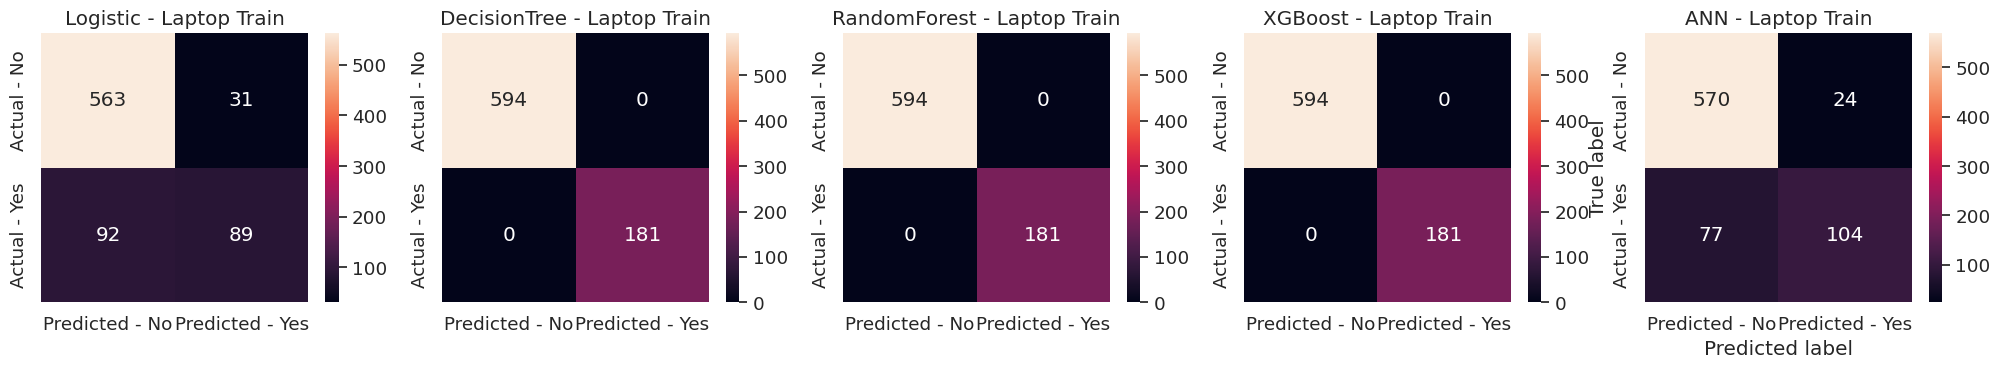

In [ ]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_lap, model_DT_lap, model_RF_lap, model_XGB_lap, model_ANN_lap]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_laptop_train_scaled)
    cm=metrics.confusion_matrix( y_laptop_train, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m+" - Laptop Train")

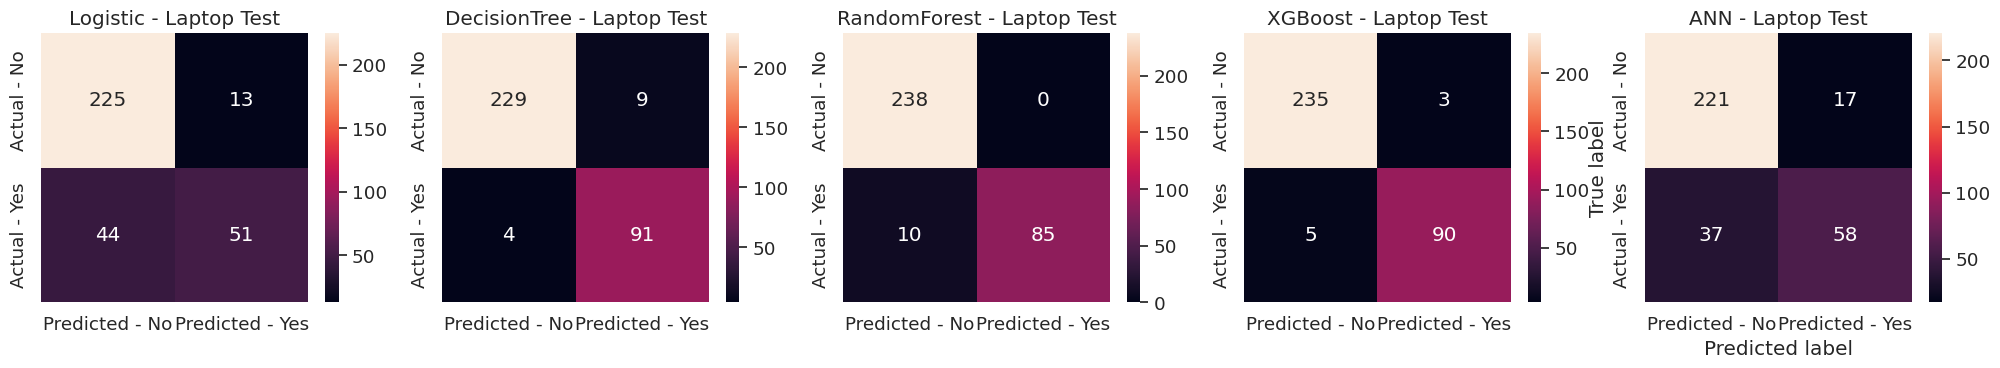

In [ ]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_lap, model_DT_lap, model_RF_lap, model_XGB_lap, model_ANN_lap]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_laptop_test_scaled)
    cm=metrics.confusion_matrix( y_laptop_test, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Laptop Test")

##Models for Mobile

In [ ]:
vif_mobile = calc_vif(X_mobile_train_scaled)
vif_mobile.sort_values('VIF',ascending=False)

variables       VIF
25                                    Popularity  9.932672
6                               member_in_family  8.733054
10                     travelling_network_rating  7.058812
26                                     Traveller  6.105475
5         Daily_Avg_mins_spend_on_traveling_page  2.969586
7             week_since_last_outstation_checkin  2.801166
3   total_likes_on_outofstation_checkin_received  2.723870
14             preferred_location_type_Financial  2.613184
11                                    Adult_flag  2.390906
18               preferred_location_type_Medical  2.275754
4             montly_avg_comment_on_company_page  1.868818
0                 Yearly_avg_view_on_travel_page  1.772329
17       preferred_location_type_Historical site  1.747096
9                                   working_flag  1.567804
22          preferred_location_type_Social media  1.450649
8                         following_company_page  1.393601
13         preferred_location_type_Entertainment  1.351080
21                 preferred_location_type_Other  1.317764
12            preferred_location_type_Big Cities  1.270117
24              preferred_location_type_Trekking  1.216953
23       preferred_location_type_Tour and Travel  1.083275
2              Yearly_avg_comment_on_travel_page  1.073959
16         preferred_location_type_Hill Stations  1.049010
1        total_likes_on_outstation_checkin_given  1.012760
15                  preferred_location_type_Game  1.010887
20                   preferred_location_type_OTT  1.009397
19                 preferred_location_type_Movie  1.005250

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic_mobile = LogisticRegression(solver='liblinear',random_state=123)
model_logistic_mobile.fit(X_mobile_train_scaled,y_mobile_train)

LogisticRegression(random_state=123, solver='liblinear')

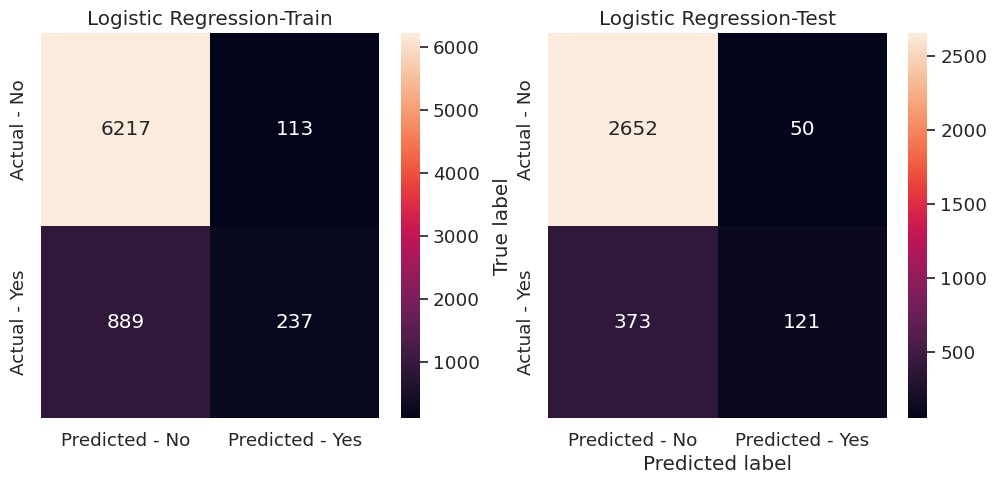

In [ ]:
make_confusion_matrix(['Logistic Regression-Train','Logistic Regression-Test']
                      ,model_logistic_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [ ]:
pred_mobile_train_model_logistic = model_logistic_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_logistic = model_logistic_mobile.predict(X_mobile_test_scaled)
print('Train Accuracy of the Logistic Regression model: ',model_logistic_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Logistic Regression model: ',model_logistic_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_logistic))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_logistic))

Train Accuracy of the Logistic Regression model:  0.8656115879828327
Test Accuracy of the Logistic Regression model:  0.8676470588235294

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.87      0.98      0.93      6330
           1       0.68      0.21      0.32      1126

    accuracy                           0.87      7456
   macro avg       0.78      0.60      0.62      7456
weighted avg       0.85      0.87      0.83      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.71      0.24      0.36       494

    accuracy                           0.87      3196
   macro avg       0.79      0.61      0.65      3196
weighted avg       0.85      0.87      0.84      3196



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT_mobile = DecisionTreeClassifier(random_state=123)
model_DT_mobile.fit(X_mobile_train_scaled,y_mobile_train)

DecisionTreeClassifier(random_state=123)

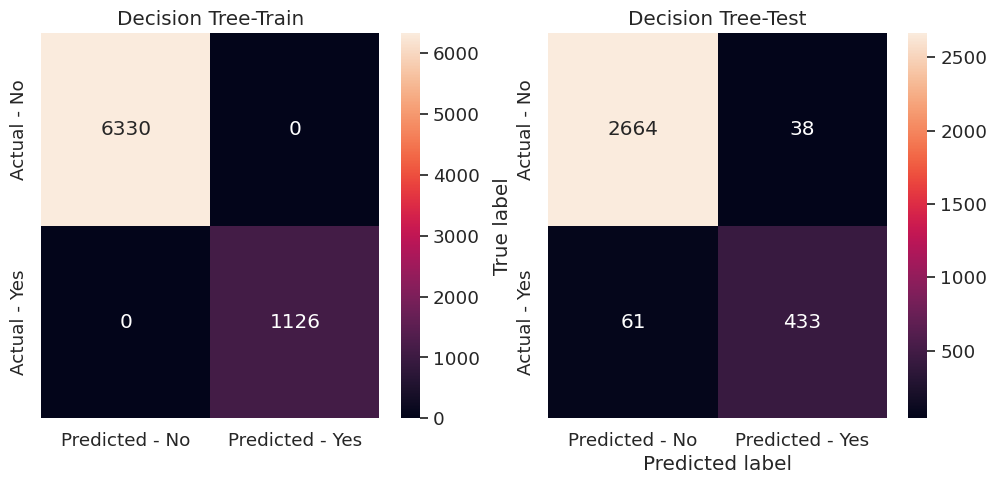

In [ ]:
make_confusion_matrix(['Decision Tree-Train','Decision Tree-Test']
                      ,model_DT_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [ ]:
pred_mobile_train_model_DT = model_DT_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_DT = model_DT_mobile.predict(X_mobile_test_scaled)
print('Train Accuracy of the Decision Tree model: ',model_DT_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Decision model: ',model_DT_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_DT))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_DT))

Train Accuracy of the Decision Tree model:  1.0
Test Accuracy of the Decision model:  0.9690237797246558

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2702
           1       0.92      0.88      0.90       494

    accuracy                           0.97      3196
   macro avg       0.95      0.93      0.94      3196
weighted avg       0.97      0.97      0.97      3196



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF_mobile = RandomForestClassifier(random_state=123)
model_RF_mobile.fit(X_mobile_train_scaled,y_mobile_train)

RandomForestClassifier(random_state=123)

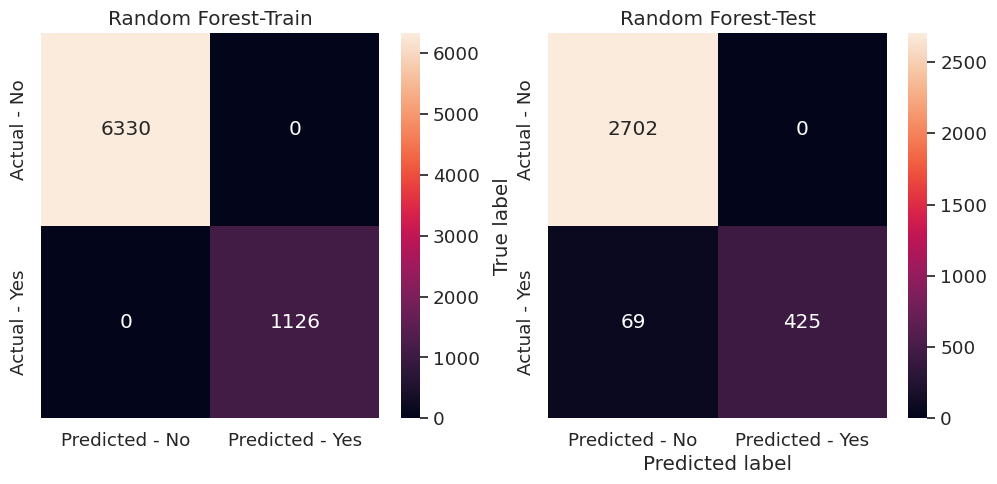

In [ ]:
make_confusion_matrix(['Random Forest-Train','Random Forest-Test']
                      ,model_RF_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [ ]:
pred_mobile_train_model_RF = model_RF_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_RF = model_RF_mobile.predict(X_mobile_test_scaled)
print('Train Accuracy of the Random Forest model: ',model_RF_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Random Forest model: ',model_RF_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_RF))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_RF))

Train Accuracy of the Random Forest model:  1.0
Test Accuracy of the Random Forest model:  0.9784105131414268

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.86      0.92       494

    accuracy                           0.98      3196
   macro avg       0.99      0.93      0.96      3196
weighted avg       0.98      0.98      0.98      3196



##XGBoost

In [ ]:
from xgboost import XGBClassifier
model_XGB_mobile = XGBClassifier(random_state=123)
model_XGB_mobile.fit(X_mobile_train_scaled,y_mobile_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

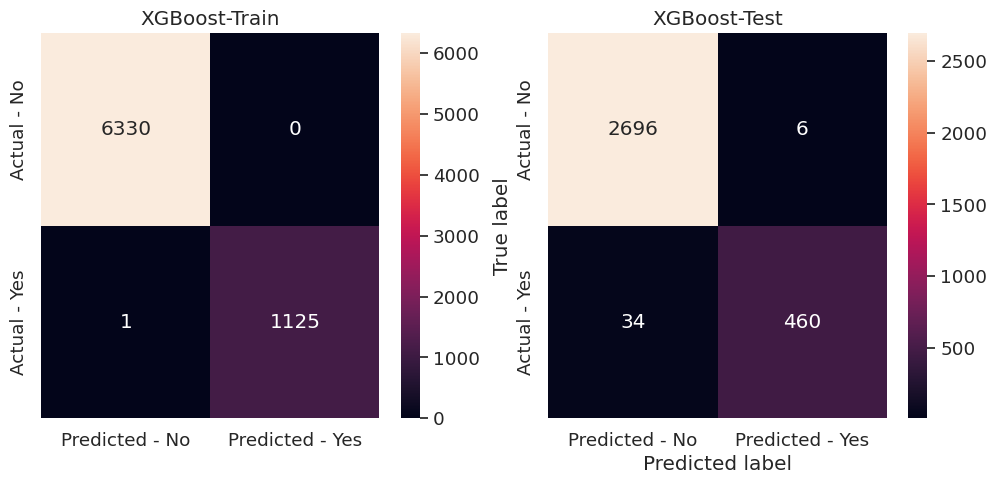

In [ ]:
make_confusion_matrix(['XGBoost-Train','XGBoost-Test']
                      ,model_XGB_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [ ]:
pred_mobile_train_model_XGB = model_XGB_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_XGB = model_XGB_mobile.predict(X_mobile_test_scaled)
print('Train Accuracy of the XGBoost model: ',model_XGB_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',model_XGB_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()
print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_XGB))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_XGB))

Train Accuracy of the XGBoost model:  0.9998658798283262
Test Accuracy of the XGBoost model:  0.9874843554443054

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       0.99      0.93      0.96       494

    accuracy                           0.99      3196
   macro avg       0.99      0.96      0.98      3196
weighted avg       0.99      0.99      0.99      3196



## Artifical Neural Network (ANN)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_ANN_mobile = MLPClassifier(activation='logistic',solver='adam',max_iter=400,learning_rate_init=0.0001,random_state=123)
model_ANN_mobile.fit(X_mobile_train,y_mobile_train)

MLPClassifier(activation='logistic', learning_rate_init=0.0001, max_iter=400,
              random_state=123)

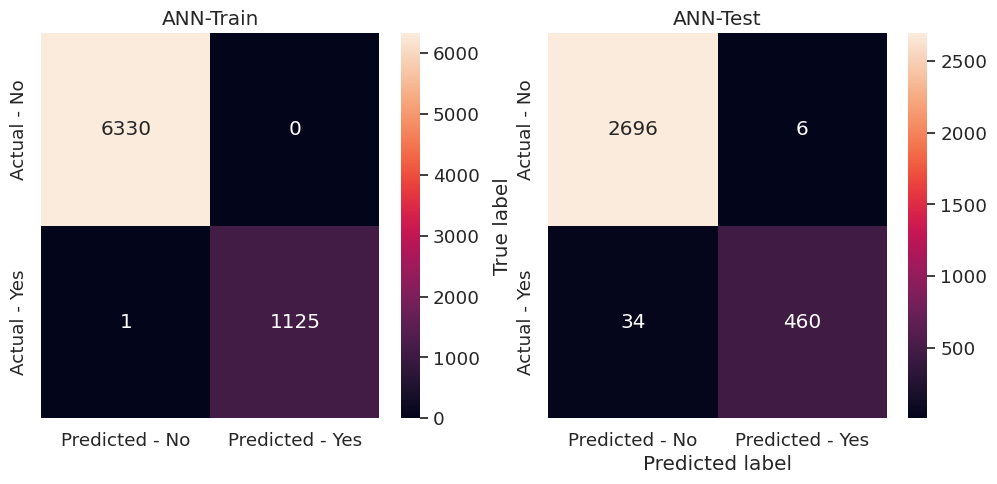

In [ ]:
make_confusion_matrix(['ANN-Train','ANN-Test']
                      ,model_XGB_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

## Model Metrics - Mobile Data

In [ ]:
# Comparing the models as per performance on testing set
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['Logistic','DecisionTree','RandomForest','XGBoost']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]

train_pred = [pred_mobile_train_model_logistic, pred_mobile_train_model_DT, pred_mobile_train_model_RF, pred_mobile_train_model_XGB]
test_pred = [pred_mobile_test_model_logistic, pred_mobile_test_model_DT, pred_mobile_test_model_RF, pred_mobile_test_model_XGB]
for i,j in zip(train_pred,test_pred):
    acc_train.append(accuracy_score(y_mobile_train,i))
    pre_train.append(precision_score(y_mobile_train,i,zero_division=0))
    rec_train.append(recall_score(y_mobile_train,i))
    f1_train.append(f1_score(y_mobile_train,i))

    acc_test.append(accuracy_score(y_mobile_test,j))
    pre_test.append(precision_score(y_mobile_test,j,zero_division=0))
    rec_test.append(recall_score(y_mobile_test,j))
    f1_test.append(f1_score(y_mobile_test,j))
metric_mobile = pd.DataFrame({'Model':mod,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test})

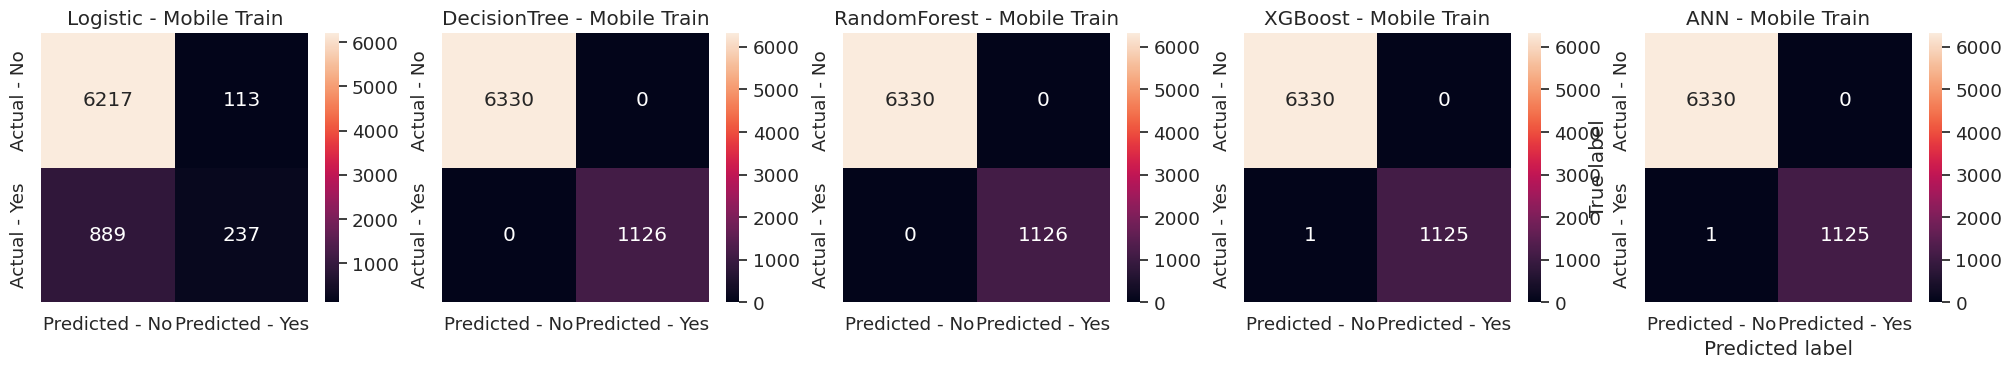

In [ ]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_mobile, model_DT_mobile, model_RF_mobile, model_XGB_mobile, model_XGB_mobile]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_mobile_train_scaled)
    cm=metrics.confusion_matrix( y_mobile_train, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Mobile Train")

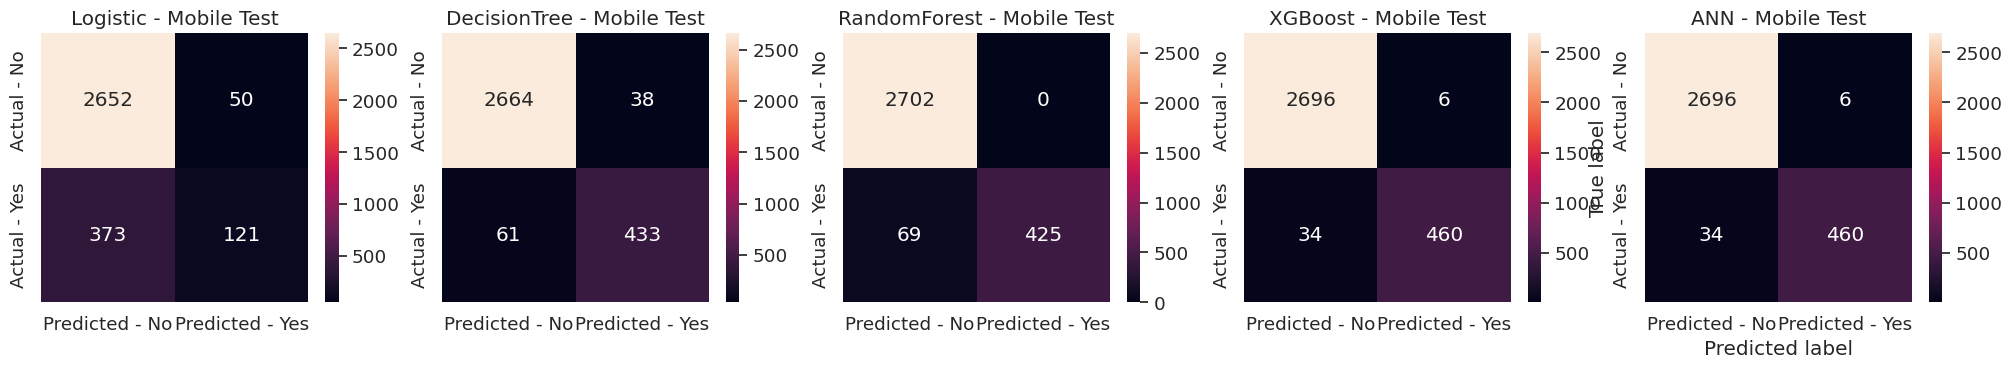

In [ ]:
fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_mobile, model_DT_mobile, model_RF_mobile, model_XGB_mobile, model_XGB_mobile]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_mobile_test_scaled)
    cm=metrics.confusion_matrix( y_mobile_test, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Mobile Test")

In [ ]:
metric_laptop

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Logistic        0.841290       0.828829         0.741667   
1  DecisionTree        1.000000       0.960961         1.000000   
2  RandomForest        1.000000       0.969970         1.000000   
3       XGBoost        1.000000       0.975976         1.000000   
4           ANN        0.869677       0.837838         0.812500   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.796875      0.491713     0.536842        0.591362       0.641509   
1        0.910000      1.000000     0.957895        1.000000       0.933333   
2        1.000000      1.000000     0.894737        1.000000       0.944444   
3        0.967742      1.000000     0.947368        1.000000       0.957447   
4        0.773333      0.574586     0.610526        0.673139       0.682353   

   AUC_Score_train  AUC_Score_test  
0         0.838616        0.865015  
1         1.000000        0.960040  
2         1.000000        0.999071  
3         1.000000        0.997921  
4         0.898013        0.885626

In [ ]:
metric_mobile

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Logistic        0.865612       0.867647         0.677143   
1  DecisionTree        1.000000       0.969024         1.000000   
2  RandomForest        1.000000       0.978411         1.000000   
3       XGBoost        0.999866       0.987484         1.000000   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  
0        0.707602      0.210480     0.244939        0.321138       0.363910  
1        0.919321      1.000000     0.876518        1.000000       0.897409  
2        1.000000      1.000000     0.860324        1.000000       0.924918  
3        0.987124      0.999112     0.931174        0.999556       0.958333

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
#XGBoost Classifier
param_xgb = {
    'n_estimators':[65,70,75],
    'max_depth':[1,2,3],
    'min_child_weight':[2,3,5],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.5],
    'gamma':[0.3]

}
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(),param_grid=param_xgb,cv=3)

In [ ]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
gsearch_xgb.fit(X_laptop_train_scaled,y_laptop_train)
gsearch_xgb.best_params_

{'gamma': 0.3,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 75,
 'subsample': 0.5}

In [ ]:
tuned_Xgb_lap = gsearch_xgb.best_estimator_
tuned_Xgb_lap.fit(X_laptop_train_scaled,y_laptop_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=75, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print('Train Accuracy of the XGBoost model: ',tuned_Xgb_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the XGBoost model: ',tuned_Xgb_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_Xgb_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_Xgb_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the XGBoost model:  0.9767741935483871
Test Accuracy of the XGBoost model:  0.9279279279279279

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       594
           1       0.98      0.92      0.95       181

    accuracy                           0.98       775
   macro avg       0.98      0.96      0.97       775
weighted avg       0.98      0.98      0.98       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       238
           1       0.93      0.81      0.87        95

    accuracy                           0.93       333
   macro avg       0.93      0.89      0.91       333
weighted avg       0.93      0.93      0.93       333



In [ ]:
#Logistic Regression
param_logistic = {
    'solver':['newton-cg','lbfgs','liblinear'],
    'penalty':['l2'],
    'C':[100,10,1,0.1,0.001]
}
gsearch_logistic = GridSearchCV(estimator=LogisticRegression(),param_grid=param_logistic,cv=5)

In [ ]:
gsearch_logistic.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_logistic.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
tuned_logi_lap = gsearch_logistic.best_estimator_
tuned_logi_lap.fit(X_laptop_train_scaled,y_laptop_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [ ]:
print('Train Accuracy of the Tuned Logistics Regression model: ',tuned_logi_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Logistics Regression model: ',tuned_logi_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_logi_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_logi_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Logistics Regression model:  0.8503225806451613
Test Accuracy of the Tuned Logistics Regression model:  0.8228228228228228

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       594
           1       0.82      0.46      0.59       181

    accuracy                           0.85       775
   macro avg       0.84      0.71      0.75       775
weighted avg       0.85      0.85      0.83       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       238
           1       0.85      0.46      0.60        95

    accuracy                           0.82       333
   macro avg       0.83      0.71      0.74       333
weighted avg       0.83      0.82      0.80       333



In [ ]:
#Decision Tree
param_dt = {
            "max_depth": [5],
            "max_features": [15,17,19],
            "min_samples_leaf": [15,20,25],
            "min_samples_split": [45,60,75],
            "criterion": ["gini", "entropy"]
}
gsearch_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_dt,cv=3)

In [ ]:
gsearch_dt.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_dt.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 17, 'min_samples_leaf': 15, 'min_samples_split': 45}


In [ ]:
tuned_dt_lap = gsearch_dt.best_estimator_
tuned_dt_lap.fit(X_laptop_train_scaled,y_laptop_train)

DecisionTreeClassifier(max_depth=5, max_features=17, min_samples_leaf=15,
                       min_samples_split=45)

In [ ]:
print('Train Accuracy of the Tuned Decision Tree model: ',tuned_dt_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Decision Tree model: ',tuned_dt_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_dt_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_dt_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Decision Tree model:  0.847741935483871
Test Accuracy of the Tuned Decision Tree model:  0.8378378378378378

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       594
           1       0.71      0.60      0.65       181

    accuracy                           0.85       775
   macro avg       0.79      0.76      0.77       775
weighted avg       0.84      0.85      0.84       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       238
           1       0.72      0.71      0.71        95

    accuracy                           0.84       333
   macro avg       0.80      0.80      0.80       333
weighted avg       0.84      0.84      0.84       333



In [ ]:
#Random Forest
param_rf = {
            "n_estimators":[100],
            "max_depth": [6,7,8],
            "max_features": [15,17,19],
            "min_samples_leaf": [5,10,15],
            "min_samples_split": [10,20,45],
            "criterion": ["gini", "entropy"]
}
gsearch_RF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_rf,cv=3)


In [ ]:
gsearch_RF.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 19, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
tuned_RF_lap = gsearch_RF.best_estimator_
tuned_RF_lap.fit(X_laptop_train_scaled,y_laptop_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=19,
                       min_samples_leaf=5, min_samples_split=10)

In [ ]:
print('Train Accuracy of the Tuned Random Forest model: ',tuned_RF_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Random Forest model: ',tuned_RF_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_RF_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_RF_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Random Forest model:  0.9729032258064516
Test Accuracy of the Tuned Random Forest model:  0.9369369369369369

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       594
           1       1.00      0.88      0.94       181

    accuracy                           0.97       775
   macro avg       0.98      0.94      0.96       775
weighted avg       0.97      0.97      0.97       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       238
           1       0.96      0.81      0.88        95

    accuracy                           0.94       333
   macro avg       0.95      0.90      0.92       333
weighted avg       0.94      0.94      0.94       333



In [ ]:
#ANN
param_ann = {
    "hidden_layer_sizes":[100,200],
    "activation":['logistic','relu'],
    "solver":['sgd','adam'],
    "tol":[0.1,0.01],
    "max_iter":[1000]
}
gsearch_ann = GridSearchCV(estimator=MLPClassifier(),param_grid=param_ann,cv=3)

In [ ]:
gsearch_ann.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_ann.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


In [ ]:
tuned_ANN_lap = gsearch_ann.best_estimator_
tuned_ANN_lap.fit(X_laptop_train_scaled,y_laptop_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, tol=0.01)

In [ ]:
print('Train Accuracy of the Tuned ANN model: ',tuned_ANN_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned ANN model: ',tuned_ANN_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_ANN_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_ANN_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned ANN model:  0.8735483870967742
Test Accuracy of the Tuned ANN model:  0.8528528528528528

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       594
           1       0.91      0.51      0.65       181

    accuracy                           0.87       775
   macro avg       0.89      0.75      0.79       775
weighted avg       0.88      0.87      0.86       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       238
           1       0.90      0.55      0.68        95

    accuracy                           0.85       333
   macro avg       0.87      0.76      0.79       333
weighted avg       0.86      0.85      0.84       333



## Performance Metric after Hyperparameter Tuning - Laptop

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
models = [tuned_logi_lap,tuned_dt_lap,tuned_RF_lap,tuned_Xgb_lap,tuned_ANN_lap]
mod = ['Tuned_Logistic','Tuned_DecisionTree','Tune_RandomForest','Tuned_XGBoost','Tuned_ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
auc_train =[]
auc_test =[]

for i in models:
    acc_train.append(accuracy_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    pre_train.append(precision_score(y_laptop_train,i.predict(X_laptop_train_scaled),zero_division=0))
    rec_train.append(recall_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    f1_train.append(f1_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    auc_train.append(roc_auc_score(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1]))

    acc_test.append(accuracy_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    pre_test.append(precision_score(y_laptop_test,i.predict(X_laptop_test_scaled),zero_division=0))
    rec_test.append(recall_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    f1_test.append(f1_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    auc_test.append(roc_auc_score(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1]))

best_metric_lap = pd.DataFrame({'Model':mod
                                    ,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test
                                    ,'auc_train':auc_train, 'auc_test':auc_test})
best_metric_lap

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Tuned_Logistic        0.850323       0.822823         0.821782   
1  Tuned_DecisionTree        0.847742       0.837838         0.705882   
2   Tune_RandomForest        0.972903       0.936937         1.000000   
3       Tuned_XGBoost        0.976774       0.927928         0.982249   
4           Tuned_ANN        0.873548       0.852853         0.910891   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.846154      0.458564     0.463158        0.588652       0.598639   
1        0.720430      0.596685     0.705263        0.646707       0.712766   
2        0.962500      0.883978     0.810526        0.938416       0.880000   
3        0.927711      0.917127     0.810526        0.948571       0.865169   
4        0.896552      0.508287     0.547368        0.652482       0.679739   

   auc_train  auc_test  
0   0.834031  0.869306  
1   0.905463  0.891707  
2   0.999619  0.990579  
3   0.995433  0.970809  
4   0.873142  0.885582

## Hyperparameter Tuning - Mobile

In [ ]:
#XGBoost Classifier
param_xgb = {
    'n_estimators':[70,75,80],
    'max_depth':[3,4,5],
    'min_child_weight':[1,2,3],
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[0.5],
    'gamma':[0.2,0.3]

}
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(),param_grid=param_xgb,cv=3)

In [ ]:
gsearch_xgb.fit(X_mobile_train_scaled,y_mobile_train)
gsearch_xgb.best_params_

{'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 80,
 'subsample': 0.5}

In [ ]:
tuned_Xgb_mob = gsearch_xgb.best_estimator_
tuned_Xgb_mob.fit(X_mobile_train_scaled,y_mobile_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
print('Train Accuracy of the XGBoost model: ',tuned_Xgb_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',tuned_Xgb_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_Xgb_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_Xgb_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the XGBoost model:  0.9935622317596566
Test Accuracy of the XGBoost model:  0.9699624530663329

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6330
           1       1.00      0.96      0.98      1126

    accuracy                           0.99      7456
   macro avg       1.00      0.98      0.99      7456
weighted avg       0.99      0.99      0.99      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       0.98      0.83      0.89       494

    accuracy                           0.97      3196
   macro avg       0.97      0.91      0.94      3196
weighted avg       0.97      0.97      0.97      3196



In [ ]:
#Logistic Regression
param_logistic = {
    'solver':['newton-cg','lbfgs','liblinear'],
    'penalty':['l2'],
    'C':[100,10,1,0.1,0.001]
}
gsearch_logistic = GridSearchCV(estimator=LogisticRegression(),param_grid=param_logistic,cv=5)

In [ ]:
gsearch_logistic.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_logistic.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
tuned_logi_mob = gsearch_logistic.best_estimator_
tuned_logi_mob.fit(X_mobile_train_scaled,y_mobile_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100)

In [ ]:
print('Train Accuracy of the Tuned Logistics Regression model: ',tuned_logi_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Logistics Regression model: ',tuned_logi_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_logi_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_logi_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Logistics Regression model:  0.8673551502145923
Test Accuracy of the Tuned Logistics Regression model:  0.8685857321652065

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6330
           1       0.69      0.22      0.33      1126

    accuracy                           0.87      7456
   macro avg       0.78      0.60      0.63      7456
weighted avg       0.85      0.87      0.84      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.71      0.25      0.37       494

    accuracy                           0.87      3196
   macro avg       0.80      0.62      0.65      3196
weighted avg       0.85      0.87      0.84      3196



In [ ]:
#Decision Tree
param_dt = {
            "max_depth": [5],
            "max_features": [15,17,19],
            "min_samples_leaf": [15,20,25],
            "min_samples_split": [45,60,75],
            "criterion": ["gini", "entropy"]
}
gsearch_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_dt,cv=3)

In [ ]:
gsearch_dt.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 20, 'min_samples_split': 45}


In [ ]:
tuned_dt_mob = gsearch_dt.best_estimator_
tuned_dt_mob.fit(X_mobile_train_scaled,y_mobile_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=15,
                       min_samples_leaf=20, min_samples_split=45)

In [ ]:
print('Train Accuracy of the Tuned Decision Tree model: ',tuned_dt_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Decision Tree model: ',tuned_dt_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_dt_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_dt_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Decision Tree model:  0.8829130901287554
Test Accuracy of the Tuned Decision Tree model:  0.8823529411764706

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6330
           1       0.76      0.33      0.46      1126

    accuracy                           0.88      7456
   macro avg       0.83      0.66      0.70      7456
weighted avg       0.87      0.88      0.86      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2702
           1       0.78      0.33      0.47       494

    accuracy                           0.88      3196
   macro avg       0.83      0.66      0.70      3196
weighted avg       0.87      0.88      0.86      3196



In [ ]:
#Random Forest
param_rf = {
            "n_estimators":[100],
            "max_depth": [7,8,9],
            "max_features": [17,19,21],
            "min_samples_leaf": [2,5,10],
            "min_samples_split": [4,10,20],
            "criterion": ["gini", "entropy"]
}
gsearch_RF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_rf,cv=3)

In [ ]:
gsearch_RF.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 21, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [ ]:
tuned_RF_mob = gsearch_RF.best_estimator_
tuned_RF_mob.fit(X_mobile_train_scaled,y_mobile_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=21,
                       min_samples_leaf=2, min_samples_split=4)

In [ ]:
print('Train Accuracy of the Tuned Random Forest model: ',tuned_RF_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Random Forest model: ',tuned_RF_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_RF_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_RF_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Random Forest model:  0.9604345493562232
Test Accuracy of the Tuned Random Forest model:  0.9371088861076345

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6330
           1       1.00      0.74      0.85      1126

    accuracy                           0.96      7456
   macro avg       0.98      0.87      0.91      7456
weighted avg       0.96      0.96      0.96      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2702
           1       0.99      0.60      0.75       494

    accuracy                           0.94      3196
   macro avg       0.96      0.80      0.86      3196
weighted avg       0.94      0.94      0.93      3196



In [ ]:
#ANN
param_ann = {
    "hidden_layer_sizes":[100,200],
    "activation":['logistic','relu'],
    "solver":['sgd','adam'],
    "tol":[0.1,0.01],
    "max_iter":[1000]
}
gsearch_ann = GridSearchCV(estimator=MLPClassifier(),param_grid=param_ann,cv=3)

In [ ]:
gsearch_ann.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_ann.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


In [ ]:
tuned_ANN_mob = gsearch_ann.best_estimator_
tuned_ANN_mob.fit(X_mobile_train_scaled,y_mobile_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, tol=0.01)

In [ ]:
print('Train Accuracy of the Tuned ANN model: ',tuned_ANN_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned ANN model: ',tuned_ANN_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_ANN_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_ANN_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned ANN model:  0.8788894849785408
Test Accuracy of the Tuned ANN model:  0.876720901126408

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6330
           1       0.74      0.31      0.43      1126

    accuracy                           0.88      7456
   macro avg       0.81      0.64      0.68      7456
weighted avg       0.87      0.88      0.86      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2702
           1       0.72      0.33      0.45       494

    accuracy                           0.88      3196
   macro avg       0.81      0.65      0.69      3196
weighted avg       0.86      0.88      0.86      3196



## Performance Metric after Hyperparameter Tuning - Laptop & Mobile

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
models = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Tuned_Logistic','Tuned_DecisionTree','Tune_RandomForest','Tuned_XGBoost','Tuned_ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
auc_train =[]
auc_test =[]

for i in models:
    acc_train.append(accuracy_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    pre_train.append(precision_score(y_mobile_train,i.predict(X_mobile_train_scaled),zero_division=0))
    rec_train.append(recall_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    f1_train.append(f1_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    auc_train.append(roc_auc_score(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1]))

    acc_test.append(accuracy_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    pre_test.append(precision_score(y_mobile_test,i.predict(X_mobile_test_scaled),zero_division=0))
    rec_test.append(recall_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    f1_test.append(f1_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    auc_test.append(roc_auc_score(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1]))

best_metric_mob = pd.DataFrame({'Model':mod
                                    ,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test
                                    ,'auc_train':auc_train, 'auc_test':auc_test})
best_metric_mob

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Tuned_Logistic        0.867355       0.868586         0.690808   
1  Tuned_DecisionTree        0.882913       0.882353         0.759754   
2   Tune_RandomForest        0.960435       0.937109         0.998800   
3       Tuned_XGBoost        0.993562       0.969962         0.999074   
4           Tuned_ANN        0.878889       0.876721         0.739785   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.712644      0.220249     0.251012        0.334007       0.371257   
1        0.778302      0.328597     0.334008        0.458772       0.467422   
2        0.986711      0.738899     0.601215        0.849413       0.747170   
3        0.976077      0.958259     0.825911        0.978241       0.894737   
4        0.723214      0.305506     0.327935        0.432432       0.451253   

   auc_train  auc_test  
0   0.795467  0.802199  
1   0.825943  0.821678  
2   0.998063  0.986033  
3   0.999648  0.991391  
4   0.853970  0.838467

In [ ]:
l = best_metric_lap.T
l.columns = best_metric_lap['Model']
l = l.drop('Model')
l

Model           Tuned_Logistic Tuned_DecisionTree Tune_RandomForest  \
Accuracy_train        0.850323           0.847742          0.972903   
Accuracy_test         0.822823           0.837838          0.936937   
Precision_train       0.821782           0.705882               1.0   
Precision_test        0.846154            0.72043            0.9625   
Recall_train          0.458564           0.596685          0.883978   
Recall_test           0.463158           0.705263          0.810526   
F1_Score_train        0.588652           0.646707          0.938416   
F1_score_test         0.598639           0.712766              0.88   
auc_train             0.834031           0.905463          0.999619   
auc_test              0.869306           0.891707          0.990579   

Model           Tuned_XGBoost Tuned_ANN  
Accuracy_train       0.976774  0.873548  
Accuracy_test        0.927928  0.852853  
Precision_train      0.982249  0.910891  
Precision_test       0.927711  0.896552  
Recall_train         0.917127  0.508287  
Recall_test          0.810526  0.547368  
F1_Score_train       0.948571  0.652482  
F1_score_test        0.865169  0.679739  
auc_train            0.995433  0.873142  
auc_test             0.970809  0.885582

In [ ]:
m = best_metric_mob.T
m.columns = best_metric_mob['Model']
m = m.drop('Model')
m

Model           Tuned_Logistic Tuned_DecisionTree Tune_RandomForest  \
Accuracy_train        0.867355           0.882913          0.960435   
Accuracy_test         0.868586           0.882353          0.937109   
Precision_train       0.690808           0.759754            0.9988   
Precision_test        0.712644           0.778302          0.986711   
Recall_train          0.220249           0.328597          0.738899   
Recall_test           0.251012           0.334008          0.601215   
F1_Score_train        0.334007           0.458772          0.849413   
F1_score_test         0.371257           0.467422           0.74717   
auc_train             0.795467           0.825943          0.998063   
auc_test              0.802199           0.821678          0.986033   

Model           Tuned_XGBoost Tuned_ANN  
Accuracy_train       0.993562  0.878889  
Accuracy_test        0.969962  0.876721  
Precision_train      0.999074  0.739785  
Precision_test       0.976077  0.723214  
Recall_train         0.958259  0.305506  
Recall_test          0.825911  0.327935  
F1_Score_train       0.978241  0.432432  
F1_score_test        0.894737  0.451253  
auc_train            0.999648   0.85397  
auc_test             0.991391  0.838467

## Laptop Data

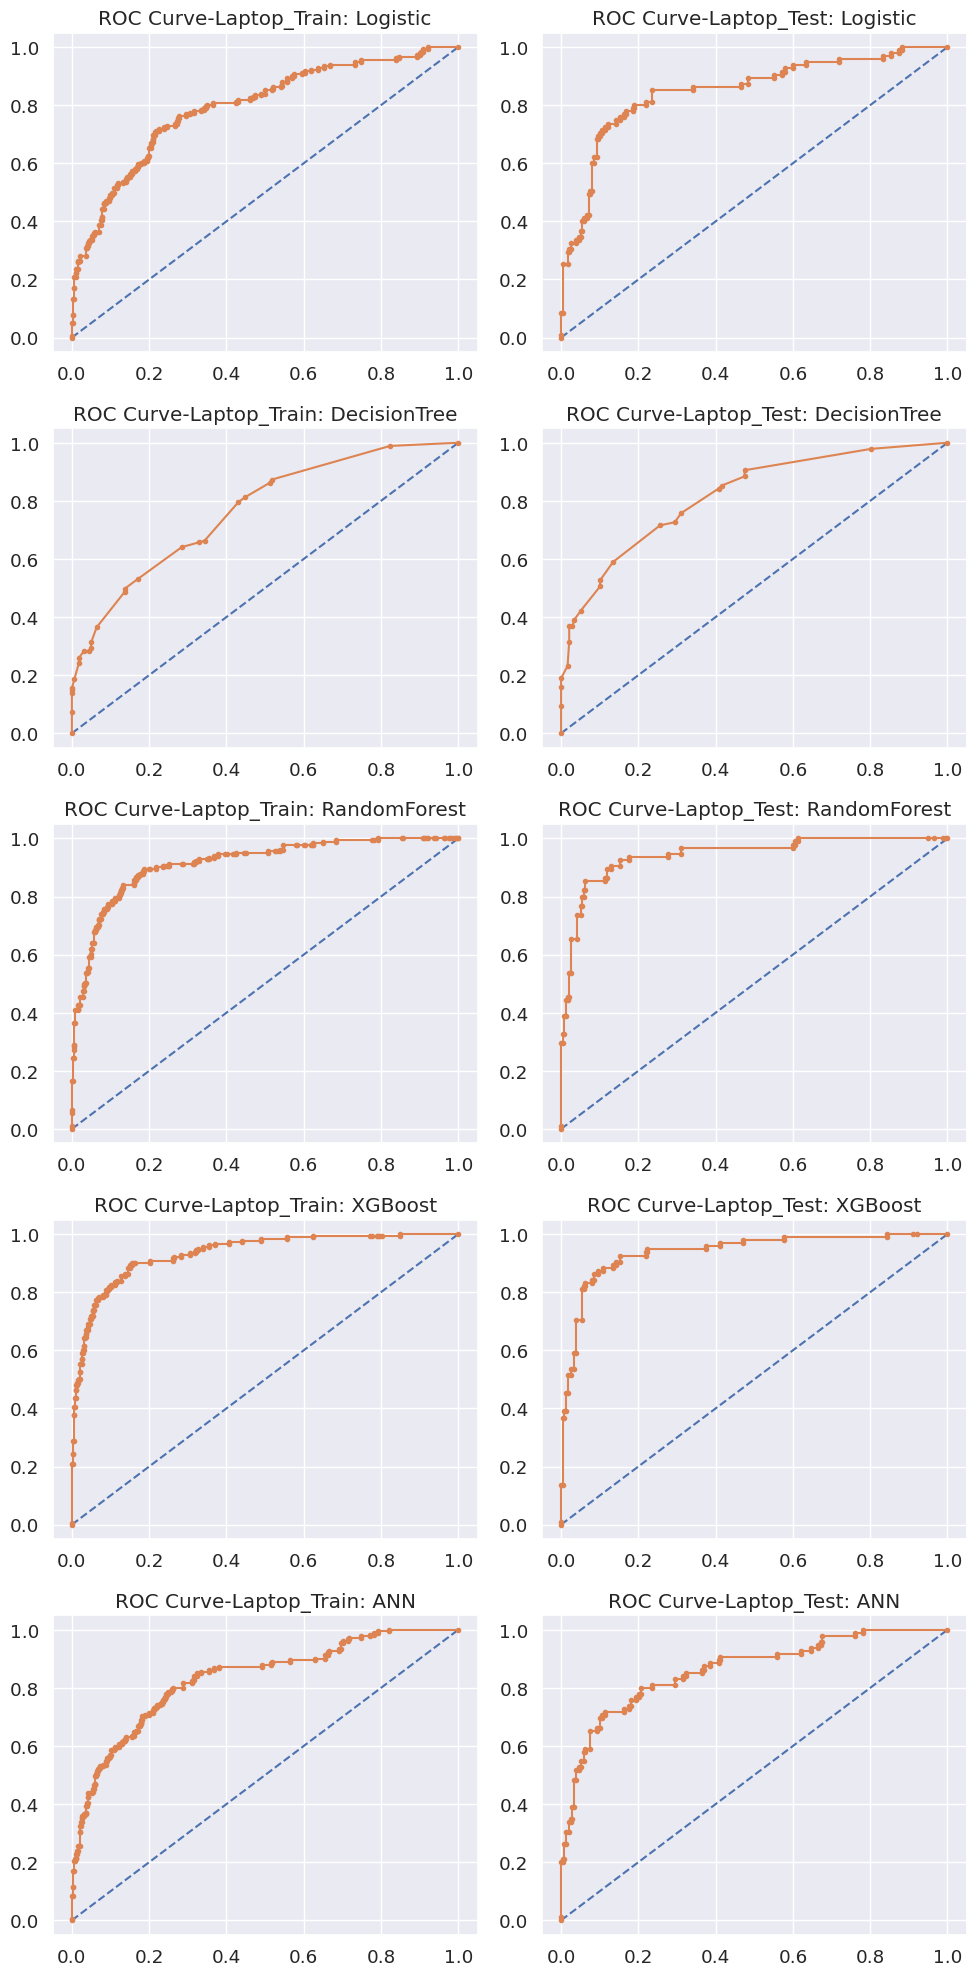

In [ ]:
fig, axes = plt.subplots(5,2,figsize=(10,20))
l = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Logistic', 'DecisionTree', 'RandomForest', 'XGBoost', 'ANN']
for i,j,k in zip(l,axes,mod):
    fpr_train,tpr_train, thershold_train = metrics.roc_curve(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1])
    j[0].plot([0,1],[0,1],linestyle="--")
    j[0].plot(fpr_train,tpr_train,marker=".")
    j[0].set_title('ROC Curve-Laptop_Train: '+k)

    fpr_test,tpr_test, thershold_test = metrics.roc_curve(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1])
    j[1].plot([0,1],[0,1],linestyle="--")
    j[1].plot(fpr_test,tpr_test,marker=".")
    j[1].set_title('ROC Curve-Laptop_Test: '+k)
    plt.tight_layout()

## Mobile Data

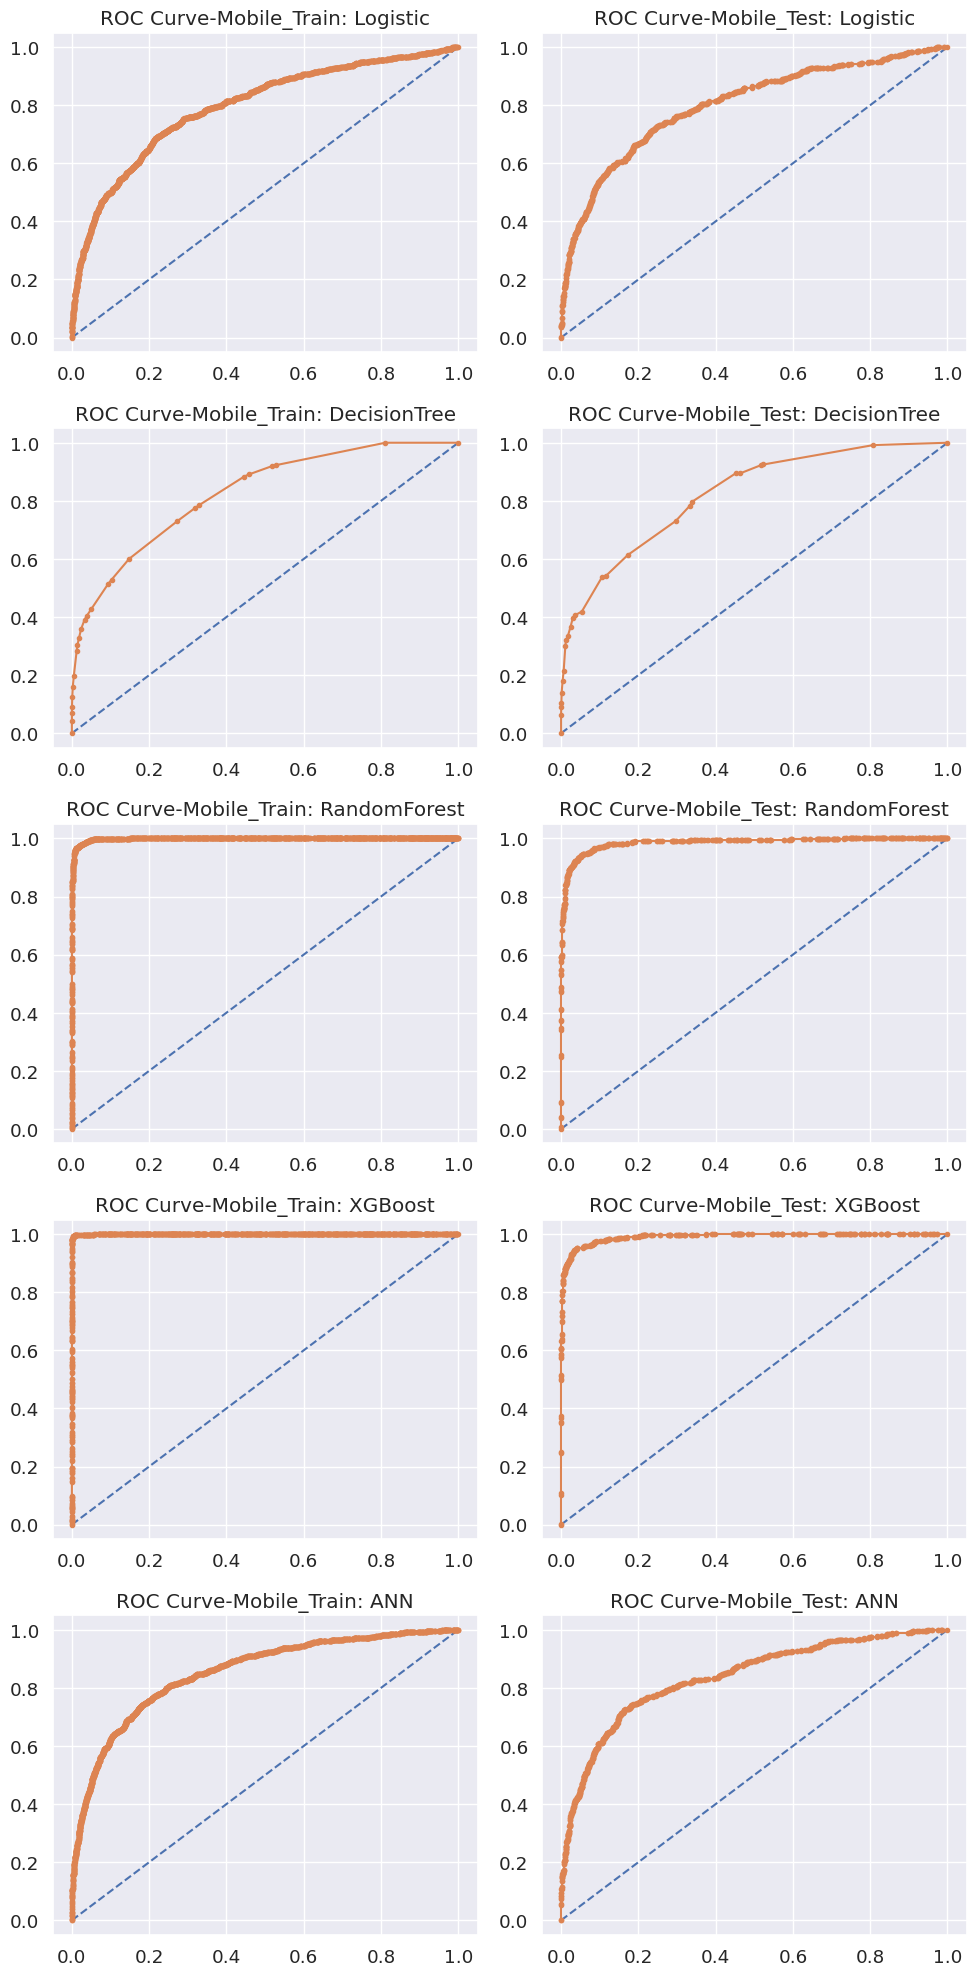

In [ ]:
fig, axes = plt.subplots(5,2,figsize=(10,20))
m = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Logistic', 'DecisionTree', 'RandomForest', 'XGBoost', 'ANN']
for i,j,k in zip(m,axes,mod):
    fpr_train,tpr_train, thershold_train = metrics.roc_curve(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1])
    j[0].plot([0,1],[0,1],linestyle="--")
    j[0].plot(fpr_train,tpr_train,marker=".")
    j[0].set_title('ROC Curve-Mobile_Train: '+k)

    fpr_test,tpr_test, thershold_test = metrics.roc_curve(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1])
    j[1].plot([0,1],[0,1],linestyle="--")
    j[1].plot(fpr_test,tpr_test,marker=".")
    j[1].set_title('ROC Curve-Mobile_Test: '+k)
    plt.tight_layout()

# Cut off Analysis

## Laptop Device

In [ ]:
PP_test_model_XGB_laptop = tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
rec = []
for i in cut_off:
    pred = np.where(PP_test_model_XGB_laptop>i,1,0)
    acc.append(accuracy_score(y_laptop_test,pred))
    rec.append(recall_score(y_laptop_test,pred,zero_division = 0))
cut_off_analysis_laptop = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Recall':rec})
cut_off_analysis_laptop

Cut_off  Accuracy    Recall
0      0.000  0.285285  1.000000
1      0.005  0.360360  1.000000
2      0.010  0.435435  1.000000
3      0.015  0.465465  1.000000
4      0.020  0.498498  1.000000
..       ...       ...       ...
195    0.975  0.735736  0.073684
196    0.980  0.735736  0.073684
197    0.985  0.732733  0.063158
198    0.990  0.726727  0.042105
199    0.995  0.723724  0.031579

[200 rows x 3 columns]

In [ ]:
(pd.DataFrame(data=tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)).sort_values(by=1,ascending=False))

0         1
219  0.000890  0.999110
190  0.002431  0.997569
124  0.004319  0.995681
253  0.009811  0.990189
125  0.011182  0.988818
..        ...       ...
252  0.998425  0.001575
249  0.999000  0.001000
140  0.999033  0.000967
271  0.999033  0.000967
235  0.999129  0.000871

[333 rows x 2 columns]

Text(0.5, 1.0, 'Cut-off Analysis - Laptop')

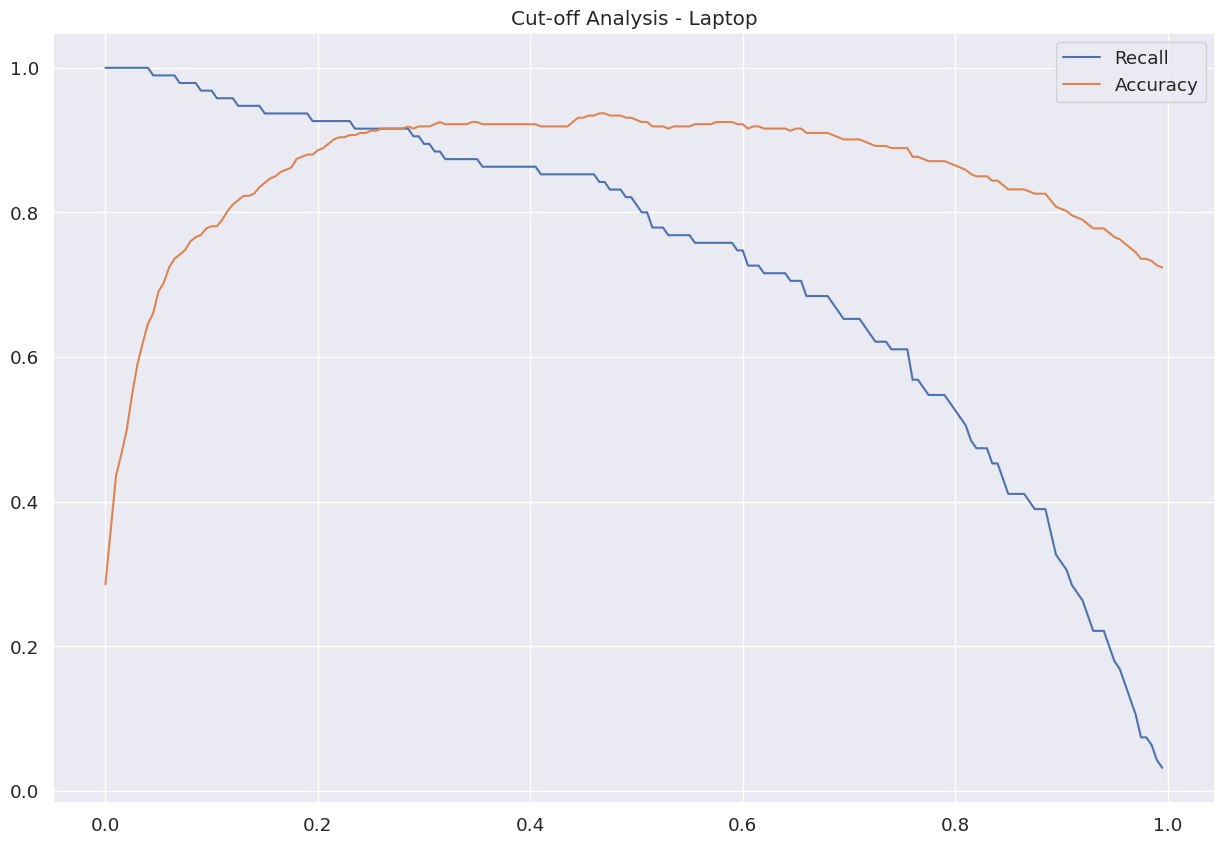

In [ ]:
fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis_laptop['Recall'],label='Recall')
plt.plot(cut_off,cut_off_analysis_laptop['Accuracy'],label='Accuracy')
plt.legend()
plt.title('Cut-off Analysis - Laptop')

In [ ]:
cut_off_analysis_laptop.sort_values(by=['Accuracy','Recall'],ascending=False).head()

Cut_off  Accuracy    Recall
93    0.465  0.936937  0.842105
94    0.470  0.936937  0.842105
91    0.455  0.933934  0.852632
92    0.460  0.933934  0.852632
95    0.475  0.933934  0.831579

## Mobile Device

In [ ]:
PP_test_model_XGB_mobile = tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
rec = []
for i in cut_off:
    pred = np.where(PP_test_model_XGB_mobile>i,1,0)
    acc.append(accuracy_score(y_mobile_test,pred))
    rec.append(recall_score(y_mobile_test,pred,zero_division = 0))
cut_off_analysis_mobile = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Recall':rec})
cut_off_analysis_mobile

Cut_off  Accuracy    Recall
0      0.000  0.154568  1.000000
1      0.005  0.420213  1.000000
2      0.010  0.548185  1.000000
3      0.015  0.620463  1.000000
4      0.020  0.675845  1.000000
..       ...       ...       ...
195    0.975  0.863892  0.119433
196    0.980  0.860763  0.099190
197    0.985  0.857009  0.074899
198    0.990  0.853880  0.054656
199    0.995  0.849812  0.028340

[200 rows x 3 columns]

In [ ]:
(pd.DataFrame(data=tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)).sort_values(by=1,ascending=False))

0         1
1254  0.000698  0.999302
1641  0.000811  0.999189
3130  0.001058  0.998942
1371  0.001733  0.998267
2579  0.001837  0.998163
...        ...       ...
1128  0.999891  0.000109
180   0.999902  0.000098
1045  0.999920  0.000080
828   0.999925  0.000075
2634  0.999954  0.000046

[3196 rows x 2 columns]

Text(0.5, 1.0, 'Cut-off Analysis - Mobile Device')

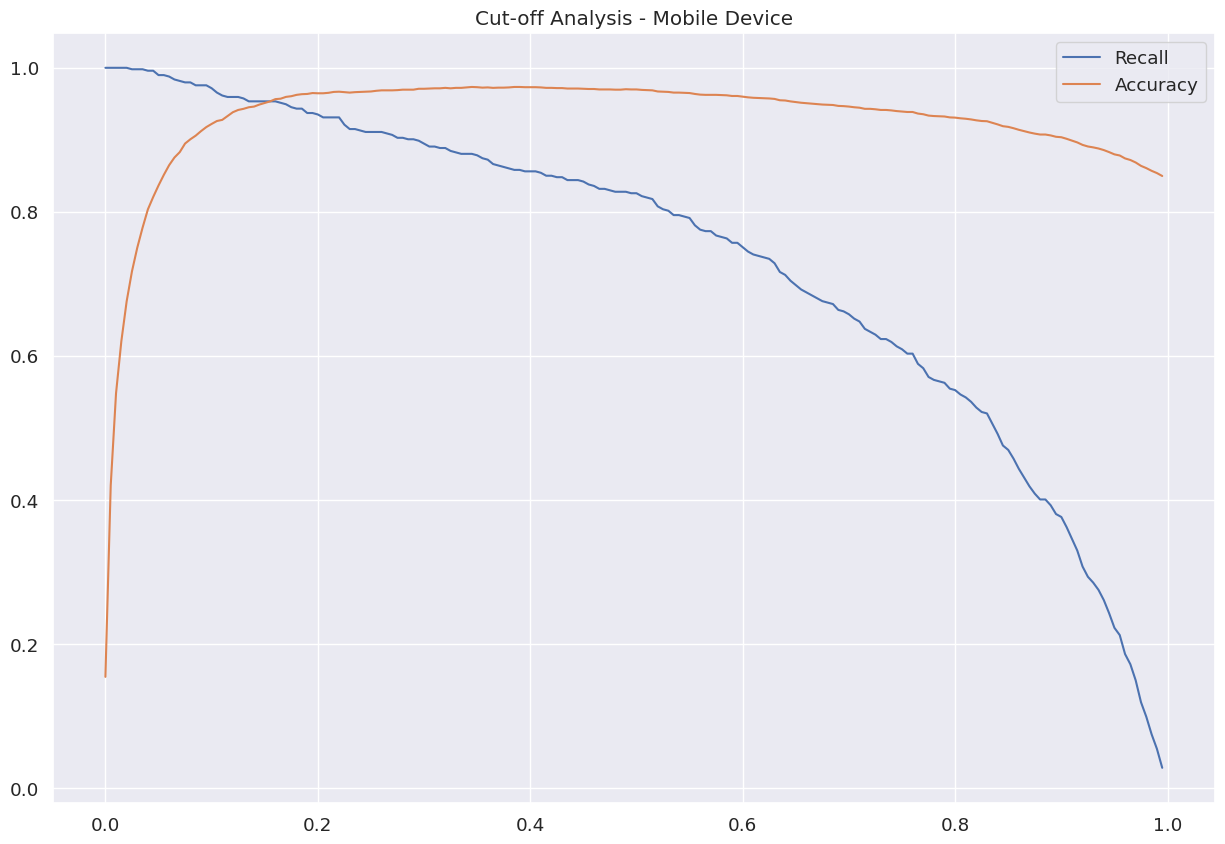

In [ ]:
fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis_mobile['Recall'],label='Recall')
plt.plot(cut_off,cut_off_analysis_mobile['Accuracy'],label='Accuracy')
plt.legend()
plt.title('Cut-off Analysis - Mobile Device')

In [ ]:
cut_off_analysis_mobile.sort_values(by=['Accuracy','Recall'],ascending=False).head()

Cut_off  Accuracy    Recall
69    0.345  0.973404  0.880567
77    0.385  0.973404  0.858300
78    0.390  0.973404  0.858300
70    0.350  0.973091  0.878543
79    0.395  0.973091  0.856275

In [ ]:
#Predicted probability for Mobile and Laptop dataset
pred_prob_laptop_model_XGB = tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)[:,1]
pred_prob_mobile_model_XGB = tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)[:,1]

In [ ]:
Taken_product_mob = []

for i in range(0,len(pred_prob_mobile_model_XGB)):
    if np.array(pred_prob_mobile_model_XGB)[i]> 0.35:
        a=1
    else:
        a=0
    Taken_product_mob.append(a)

In [ ]:
predicted_mobile = X_mobile_test
predicted_mobile['Taken_product'] = Taken_product_mob

In [ ]:
predicted_mobile[predicted_mobile['Taken_product']==1]

Yearly_avg_view_on_travel_page  \
5727                            204.0   
575                             405.0   
6525                            229.0   
1806                            217.0   
1260                            240.0   
...                               ...   
4850                            256.0   
5390                            234.0   
10216                           403.0   
3067                            143.0   
2656                            262.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
5727                                   45435.0                 2   
575                                    28076.0                 4   
6525                                   11941.0                 3   
1806                                   11130.0                 4   
1260                                   33355.0                 4   
...                                        ...               ...   
4850                                   34628.0                 3   
5390                                   24643.0                 3   
10216                                  40929.0                 4   
3067                                   18525.0                 1   
2656                                   30800.0                 4   

       Yearly_avg_comment_on_travel_page  \
5727                                66.0   
575                                 95.0   
6525                                55.0   
1806                                77.0   
1260                                65.0   
...                                  ...   
4850                                48.0   
5390                               103.0   
10216                               85.0   
3067                                64.0   
2656                                36.0   

       total_likes_on_outofstation_checkin_received  \
5727                                         2435.0   
575                                          5485.0   
6525                                         2812.0   
1806                                         2119.0   
1260                                         2718.0   
...                                             ...   
4850                                        10009.0   
5390                                         2830.0   
10216                                       10494.0   
3067                                         1718.0   
2656                                         4581.0   

       week_since_last_outstation_checkin  following_company_page  \
5727                                    1                       1   
575                                     9                       1   
6525                                    6                       1   
1806                                    1                       1   
1260                                    2                       0   
...                                   ...                     ...   
4850                                    9                       1   
5390                                    9                       0   
10216                                   7                       1   
3067                                    3                       1   
2656                                    3                       1   

       montly_avg_comment_on_company_page  working_flag  \
5727                                 21.0             0   
575                                  11.0             0   
6525                                 29.0             0   
1806                                 11.0             0   
1260                                 14.0             0   
...                                   ...           ...   
4850                                 24.0             0   
5390                                 19.0             0   
10216                                29.0             0   
3067                                 22.0             0   
2656                         

In [ ]:
Taken_product_lap = []

for i in range(0,len(pred_prob_laptop_model_XGB)):
    if np.array(pred_prob_laptop_model_XGB)[i]> 0.46:
        a=1
    else:
        a=0
    Taken_product_lap.append(a)

In [ ]:
predicted_laptop = X_laptop_test
predicted_laptop['Taken_product'] = Taken_product_lap

In [ ]:
predicted_laptop[predicted_laptop['Taken_product']==1]

Yearly_avg_view_on_travel_page  \
6408                            381.0   
10582                           246.0   
6446                            365.0   
11665                           254.0   
8302                            239.0   
...                               ...   
9772                            242.0   
10837                           320.0   
8177                            222.0   
10904                           205.0   
9973                            148.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
6408                                   19676.0                 2   
10582                                  15578.0                 3   
6446                                   25177.0                 2   
11665                                   8376.0                 2   
8302                                   37110.0                 3   
...                                        ...               ...   
9772                                   37138.0                 3   
10837                                  32696.0                 3   
8177                                   27062.0                 3   
10904                                  31092.0                 2   
9973                                   19091.0                 2   

       Yearly_avg_comment_on_travel_page  \
6408                                56.0   
10582                              103.0   
6446                                82.0   
11665                               68.0   
8302                                59.0   
...                                  ...   
9772                                67.0   
10837                               70.0   
8177                                46.0   
10904                              106.0   
9973                                85.0   

       total_likes_on_outofstation_checkin_received  \
6408                                         6801.0   
10582                                        2857.0   
6446                                         6402.0   
11665                                        2492.0   
8302                                         2312.0   
...                                             ...   
9772                                         2349.0   
10837                                        2814.0   
8177                                         2711.0   
10904                                        2431.0   
9973                                         1628.0   

       week_since_last_outstation_checkin  following_company_page  \
6408                                    3                       1   
10582                                   1                       0   
6446                                    4                       1   
11665                                   5                       1   
8302                                    1                       1   
...                                   ...                     ...   
9772                                    2                       1   
10837                                   8                       1   
8177                                    1                       1   
10904                                   2                       1   
9973                                    3                       1   

       montly_avg_comment_on_company_page  working_flag  \
6408                                 17.0             0   
10582                                27.0             0   
6446                                 23.0             0   
11665                                26.0             0   
8302                                 23.0             0   
...                                   ...           ...   
9772                                 25.0             0   
10837                                20.0             0   
8177                                 23.0             0   
10904                                32.0             0   
9973                         

In [ ]:
predicted_laptop['Taken_product'] = predicted_laptop['Taken_product'].astype('object')
predicted_mobile['Taken_product'] = predicted_mobile['Taken_product'].astype('object')

In [ ]:
feature_imp_lap = pd.DataFrame(model_XGB_lap.feature_importances_,columns=['Imp'],index=X_laptop.columns).sort_values(by='Imp',ascending=False)
feature_imp_lap[:10]

Imp
preferred_location_type_Hill Stations    0.315078
travelling_network_rating                0.080222
preferred_location_type_Other            0.062099
Yearly_avg_view_on_travel_page           0.052911
working_flag                             0.052687
Daily_Avg_mins_spend_on_traveling_page   0.043039
total_likes_on_outstation_checkin_given  0.039289
Yearly_avg_comment_on_travel_page        0.039037
preferred_location_type_Big Cities       0.037582
Popularity                               0.036179

Text(0.5, 1.0, 'Feature Importance for Laptop Model')

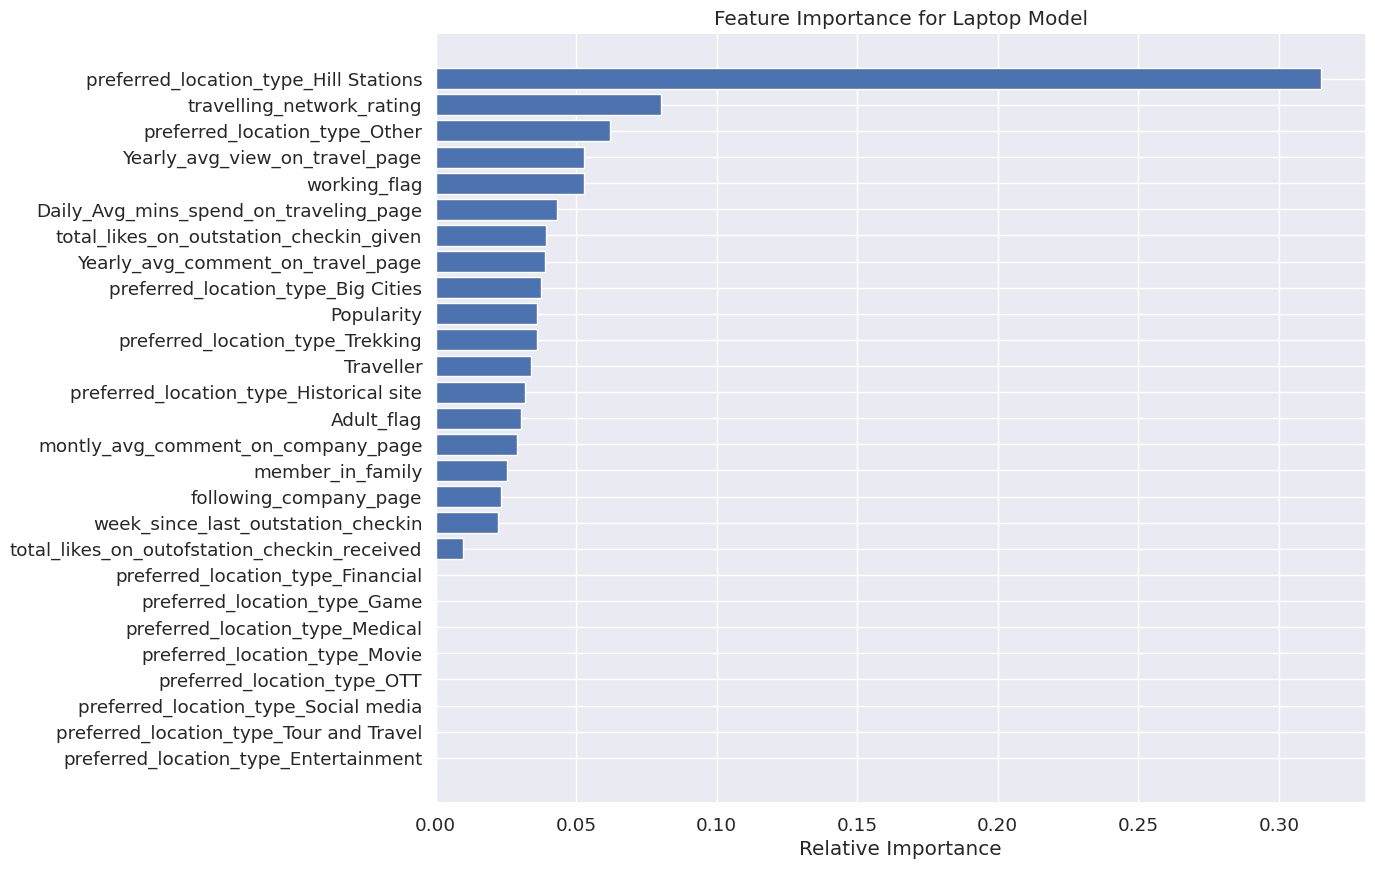

In [ ]:
importance = model_XGB_lap.feature_importances_
indices = np.argsort(importance)
feature_names = X_laptop.columns

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)),importance[indices],align='center')
plt.yticks(range(len(indices)),[feature_names[i]for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Laptop Model')

In [ ]:
feature_imp_mob = pd.DataFrame(model_XGB_mobile.feature_importances_,columns=['Imp'],index=X_mobile.columns).sort_values(by='Imp',ascending=False)
feature_imp_mob[:10]

Imp
working_flag                            0.109565
Daily_Avg_mins_spend_on_traveling_page  0.087562
preferred_location_type_Big Cities      0.080333
travelling_network_rating               0.056700
Yearly_avg_comment_on_travel_page       0.052378
Popularity                              0.051539
montly_avg_comment_on_company_page      0.046515
preferred_location_type_Social media    0.045679
Adult_flag                              0.043888
preferred_location_type_Entertainment   0.043270

Text(0.5, 1.0, 'Feature Importance for Mobile XGB Model')

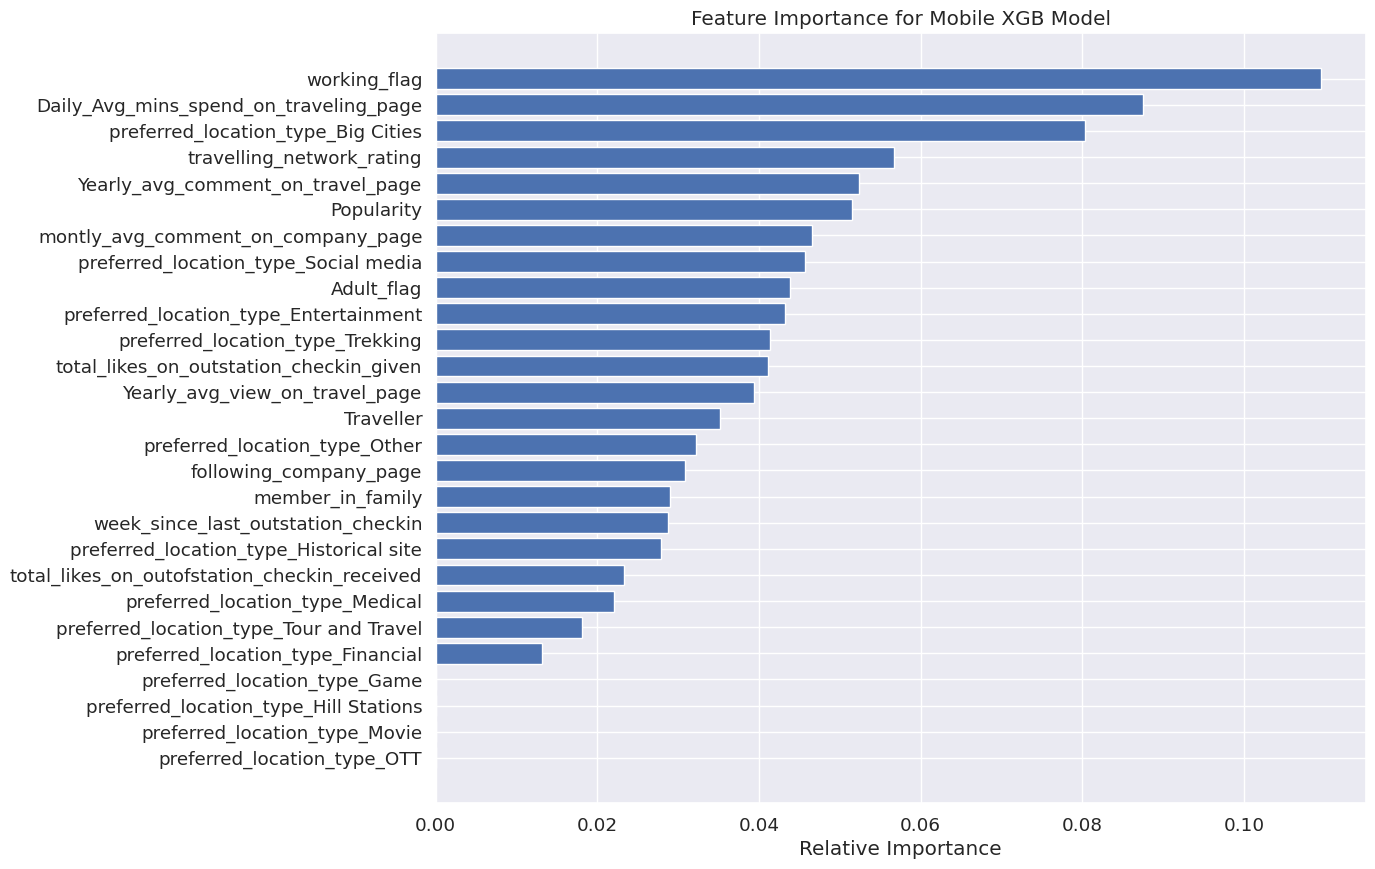

In [ ]:
importance = model_XGB_mobile.feature_importances_
indices = np.argsort(importance)
feature_names = X_mobile.columns

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)),importance[indices],align='center')
plt.yticks(range(len(indices)),[feature_names[i]for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Mobile XGB Model')

In [ ]:
feature_imp_lap.sort_values('Imp',ascending=False)[:10].index

Index(['preferred_location_type_Hill Stations', 'travelling_network_rating',
       'preferred_location_type_Other', 'Yearly_avg_view_on_travel_page',
       'working_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'total_likes_on_outstation_checkin_given',
       'Yearly_avg_comment_on_travel_page',
       'preferred_location_type_Big Cities', 'Popularity'],
      dtype='object')

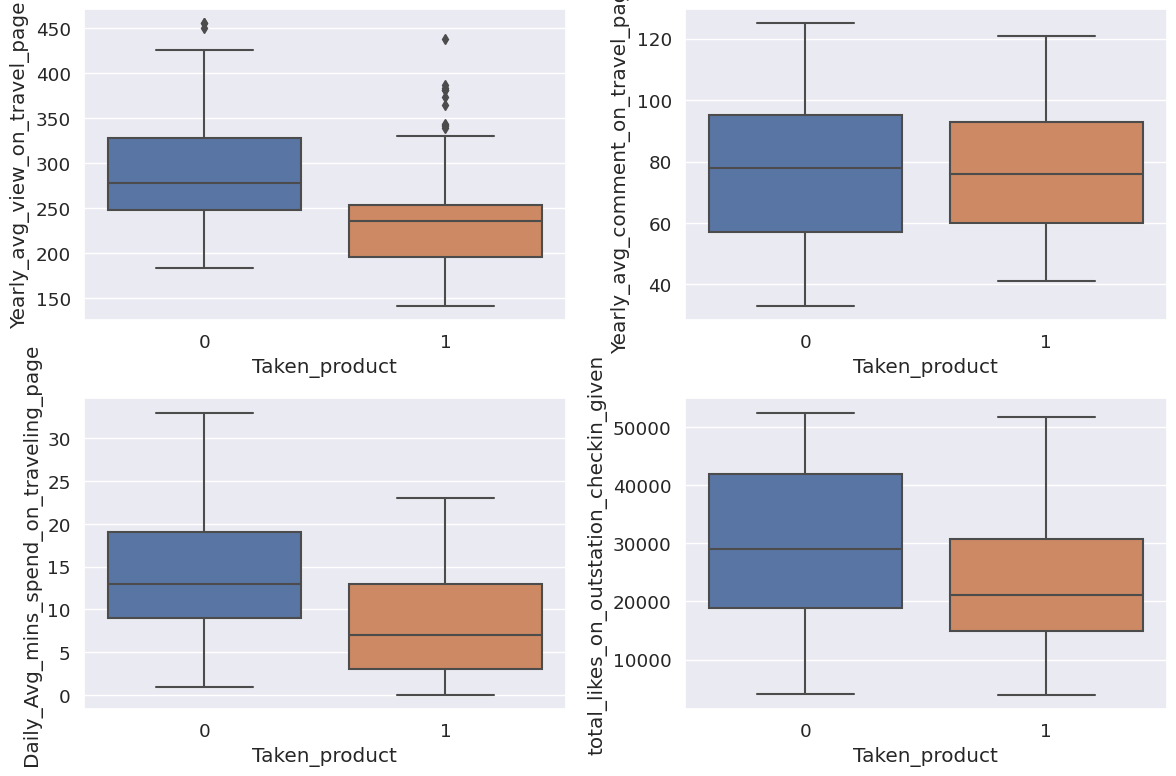

In [ ]:
lap_num_cols = ['Yearly_avg_view_on_travel_page','Yearly_avg_comment_on_travel_page',
                        'Daily_Avg_mins_spend_on_traveling_page','total_likes_on_outstation_checkin_given']
fig,axes = plt.subplots(2,2,figsize=(12,8))
for c,a in zip(lap_num_cols,axes.flatten()):
    sns.boxplot(x='Taken_product',y=c,data=predicted_laptop,ax=a)
    plt.tight_layout()

In [ ]:
lap_cat_cols = ['preferred_location_type_Hill Stations', 'travelling_network_rating',
       'preferred_location_type_Other','working_flag',
       'preferred_location_type_Big Cities', 'Popularity']

In [ ]:
feature_imp_mob.sort_values('Imp',ascending=False)[:10].index

Index(['working_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'preferred_location_type_Big Cities', 'travelling_network_rating',
       'Yearly_avg_comment_on_travel_page', 'Popularity',
       'montly_avg_comment_on_company_page',
       'preferred_location_type_Social media', 'Adult_flag',
       'preferred_location_type_Entertainment'],
      dtype='object')

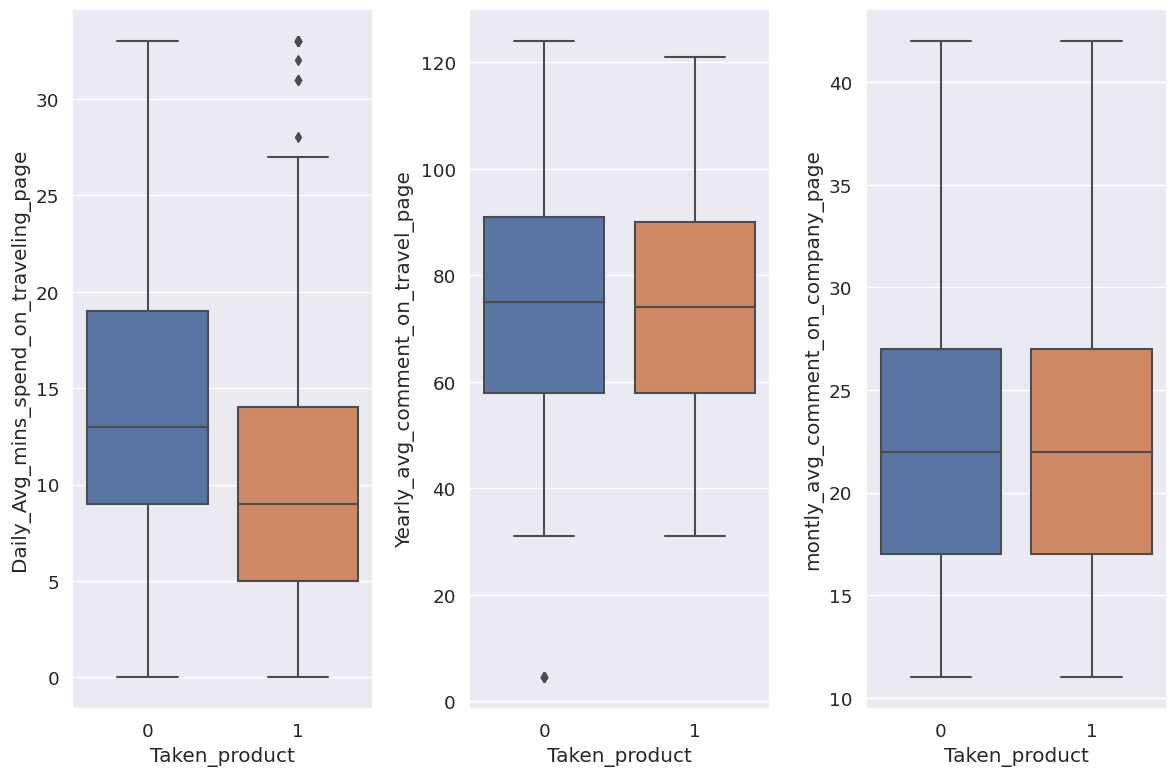

In [ ]:
mob_num_cols = ['Daily_Avg_mins_spend_on_traveling_page',
               'Yearly_avg_comment_on_travel_page','montly_avg_comment_on_company_page'
               ]
fig,axes = plt.subplots(1,3,figsize=(12,8))
for c,a in zip(mob_num_cols,axes.flatten()):
    sns.boxplot(x='Taken_product',y=c,data=predicted_mobile,ax=a)
    plt.tight_layout()

In [ ]:
mob_cat_cols = ['working_flag','preferred_location_type_Big Cities',
                'travelling_network_rating','Popularity',
               'preferred_location_type_Social media', 'Adult_flag',
               'preferred_location_type_Entertainment']

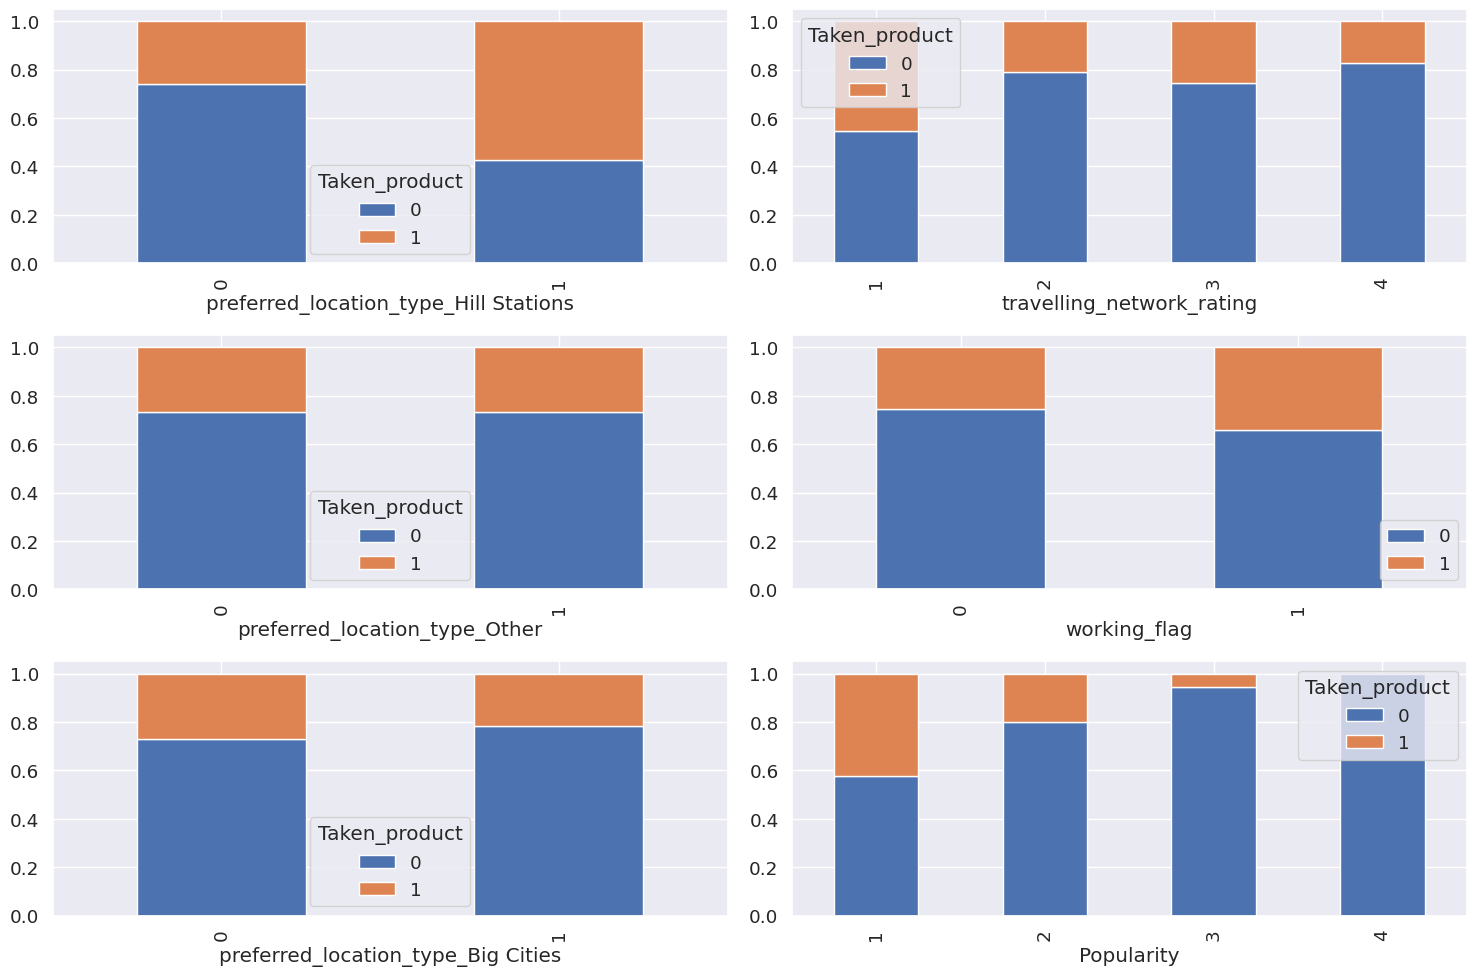

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(15,10))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
for c,a in zip(lap_cat_cols,axes):
    predicted_laptop.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    ax4.legend(loc='lower right')
    plt.tight_layout()

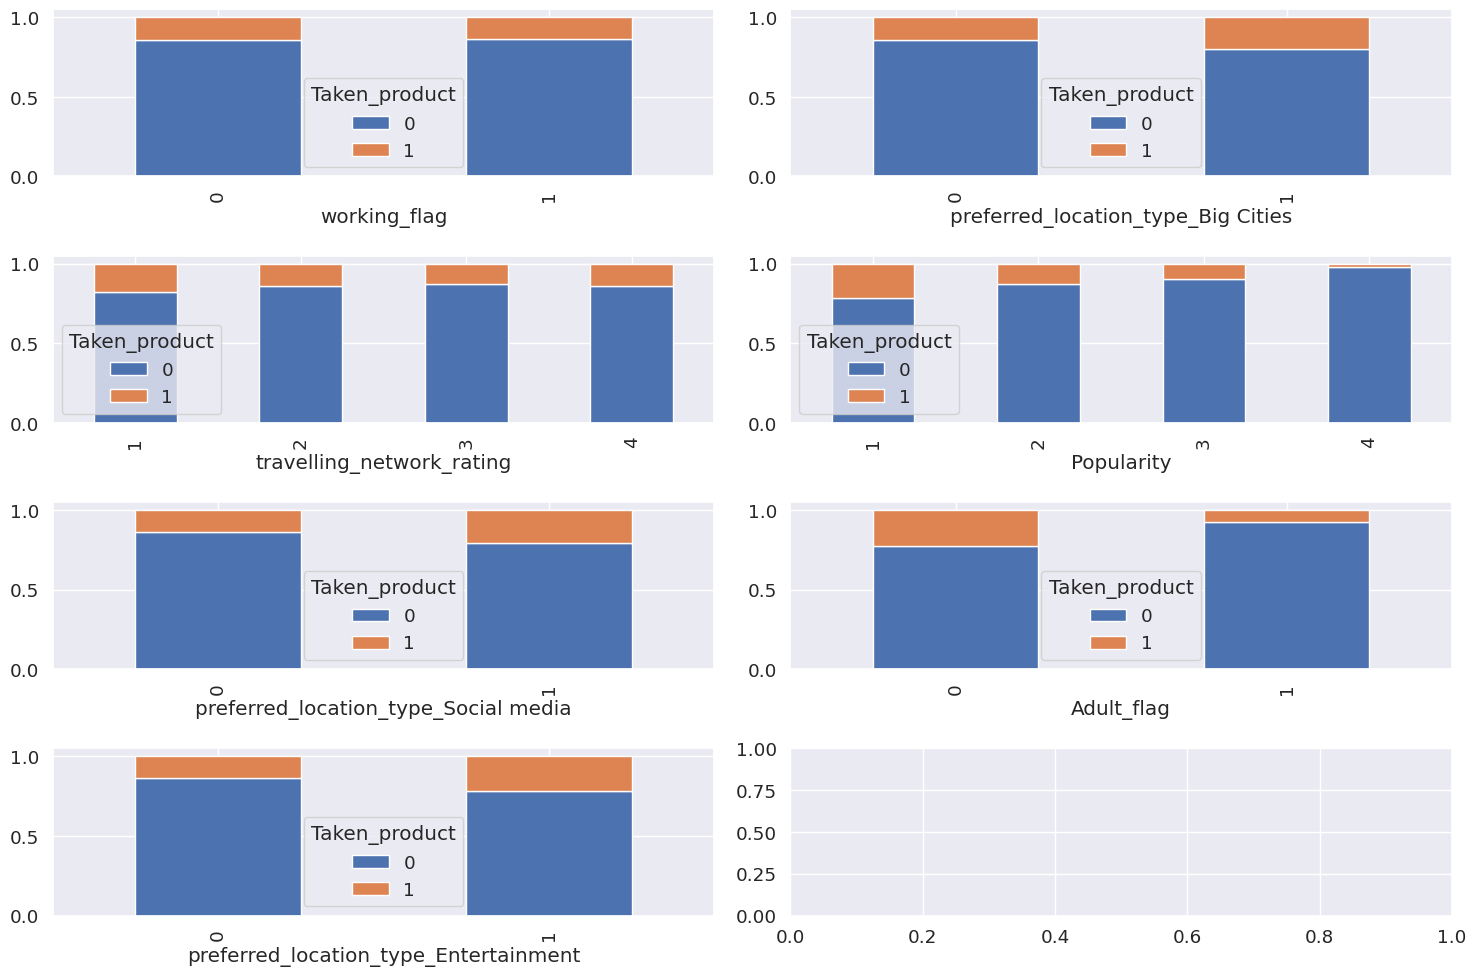

In [ ]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(15,10))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
for c,a in zip(mob_cat_cols,axes):
    predicted_mobile.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    plt.tight_layout()

In [ ]:
data_laptop[feature_imp_lap[:10].index]

preferred_location_type_Hill Stations  travelling_network_rating  \
5881                                       0                          4   
5883                                       0                          3   
5885                                       0                          3   
5888                                       0                          2   
5906                                       0                          2   
...                                      ...                        ...   
11730                                      0                          2   
11742                                      0                          4   
11746                                      0                          4   
11755                                      0                          3   
11758                                      0                          4   

       preferred_location_type_Other  Yearly_avg_view_on_travel_page  \
5881                               0                           379.0   
5883                               0                           255.0   
5885                               0                           250.0   
5888                               0                           295.0   
5906                               0                           250.0   
...                              ...                             ...   
11730                              0                           278.0   
11742                              0                           388.0   
11746                              0                           268.0   
11755                              0                           279.0   
11758                              0                           382.0   

       working_flag  Daily_Avg_mins_spend_on_traveling_page  \
5881              1                                    10.0   
5883              0                                     8.0   
5885              0                                     8.0   
5888              1                                    10.0   
5906              1                                    10.0   
...             ...                                     ...   
11730             0                                    23.0   
11742             0                                    14.0   
11746             0                                    17.0   
11755             0                                    23.0   
11758             0                                    20.0   

       total_likes_on_outstation_checkin_given  \
5881                                    9776.0   
5883                                   48725.0   
5885                                   35184.0   
5888                                    7572.0   
5906                                   39379.0   
...                                        ...   
11730                                  24127.0   
11742                                  30775.0   
11746                                  42010.0   
11755                                  30987.0   
11758                                  35851.0   

       Yearly_avg_comment_on_travel_page  preferred_location_type_Big Cities  \
5881                                64.0                                   0   
5883                                59.0                                   0   
5885                                84.0                                   0   
5888                                48.0                                   0   
5906                                80.0                                   0   
...                                  ...                                 ...   
11730                              115.0                                   0   
11742                              109.0                                   0   
11746                               98.0                                   0   
11755                               58.0                                   0   
117

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sc = StandardScaler()
data_laptop_scaled = sc.fit_transform(data_laptop[['working_flag','Popularity',
                                                   'travelling_network_rating',
                                                   'preferred_location_type_Hill Stations']])
data_mobile_scaled = sc.fit_transform(data_mobile[['working_flag','Popularity',
                                                   'Adult_flag',
                                                   'preferred_location_type_Entertainment']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

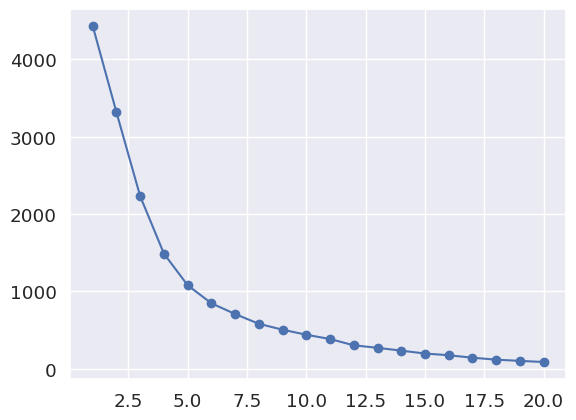

In [ ]:
wss = []
for i in range (1,21):
    k_means_lap = KMeans(n_clusters=i,random_state=123)
    k_means_lap.fit(data_laptop_scaled)
    clust = k_means_lap.labels_
    wss.append(k_means_lap.inertia_)
wss_lap = pd.DataFrame(wss,columns=['WSS'])
wss_lap['Number_of_cluster'] = range(1,21)
wss_lap = wss_lap[['Number_of_cluster','WSS']]
plt.plot(wss_lap['Number_of_cluster'],wss_lap['WSS'],marker='o')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

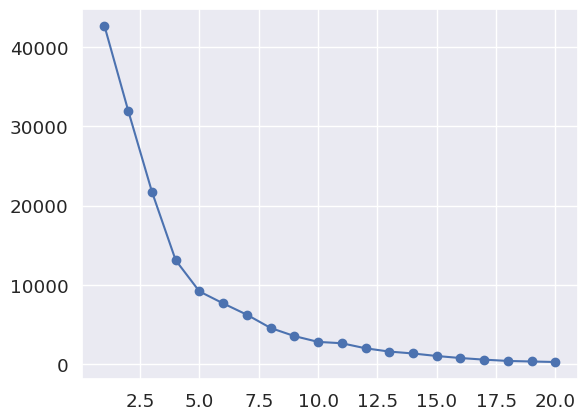

In [ ]:
wss = []
shiloutte_score = []
for i in range (1,21):
    k_means_mob = KMeans(n_clusters=i,random_state=123)
    k_means_mob.fit(data_mobile_scaled)
    wss.append(k_means_mob.inertia_)
wss_mob = pd.DataFrame(wss,columns=['WSS'])
wss_mob['Number_of_cluster'] = range(1,21)
wss_mob = wss_mob[['Number_of_cluster','WSS']]
plt.plot(wss_mob['Number_of_cluster'],wss_mob['WSS'],marker='o')

In [ ]:
k_means_lap = KMeans(n_clusters=4,random_state=123)
k_means_lap.fit(data_laptop_scaled)
labels_lap = k_means_lap.fit_predict(data_laptop_scaled)

k_means_mob = KMeans(n_clusters=4,random_state=123)
k_means_mob.fit(data_mobile_scaled)
labels_mob = k_means_mob.fit_predict(data_mobile_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data_laptop_copy = data_laptop.copy()
data_laptop_copy['cluster'] = labels_lap
data_laptop_copy['cluster'] = data_laptop_copy['cluster'].map({0: 'Cluster-1',
                                                              1 : 'Cluster-2',
                                                              2 : 'Cluster-3',
                                                              3 : 'Cluster-4'
                                                            })
data_laptop_copy

Taken_product  Yearly_avg_view_on_travel_page  \
5881               0                           379.0   
5883               0                           255.0   
5885               0                           250.0   
5888               0                           295.0   
5906               1                           250.0   
...              ...                             ...   
11730              0                           278.0   
11742              1                           388.0   
11746              0                           268.0   
11755              0                           279.0   
11758              0                           382.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
5881                                    9776.0                 1   
5883                                   48725.0                 4   
5885                                   35184.0                 2   
5888                                    7572.0                 3   
5906                                   39379.0                 1   
...                                        ...               ...   
11730                                  24127.0                 2   
11742                                  30775.0                 4   
11746                                  42010.0                 4   
11755                                  30987.0                 2   
11758                                  35851.0                 3   

       Yearly_avg_comment_on_travel_page  \
5881                                64.0   
5883                                59.0   
5885                                84.0   
5888                                48.0   
5906                                80.0   
...                                  ...   
11730                              115.0   
11742                              109.0   
11746                               98.0   
11755                               58.0   
11758                               83.0   

       total_likes_on_outofstation_checkin_received  \
5881                                         5142.0   
5883                                         2913.0   
5885                                         3074.0   
5888                                         9532.0   
5906                                         3926.0   
...                                             ...   
11730                                        5184.0   
11742                                        6787.0   
11746                                        5753.0   
11755                                        2616.0   
11758                                        5444.0   

       week_since_last_outstation_checkin  following_company_page  \
5881                                    1                       0   
5883                                    1                       1   
5885                                    0                       0   
5888                                    0                       0   
5906                                    1                       1   
...                                   ...                     ...   
11730                                   7                       0   
11742                                   8                       0   
11746                                   2                       1   
11755                                   4                       0   
11758                                   3                       0   

       montly_avg_comment_on_company_page  working_flag  \
5881                                 33.0             1   
5883                                 19.0             0   
5885                                 23.0             0   
5888                                 33.0             1   
5906                                 33.0             1   
...                                   ...           ...   
11730                                35.0             0   
11742                     

In [ ]:
data_laptop_copy['cluster'].value_counts()

Cluster-4    580
Cluster-1    324
Cluster-2    180
Cluster-3     24
Name: cluster, dtype: int64

In [ ]:
cluster_lap = data_laptop_copy[['Popularity', 'preferred_location_type_Hill Stations',
                                'working_flag', 'travelling_network_rating',
                           'Taken_product','cluster']]

In [ ]:
cluster_lap.groupby('cluster')['Taken_product'].value_counts(normalize=True)

cluster    Taken_product
Cluster-1  0                0.716049
           1                0.283951
Cluster-2  0                0.755556
           1                0.244444
Cluster-3  0                0.500000
           1                0.500000
Cluster-4  0                0.779310
           1                0.220690
Name: Taken_product, dtype: float64

In [ ]:
pd.pivot_table(data=cluster_lap,index='cluster',sort=True)

Popularity  Taken_product  preferred_location_type_Hill Stations  \
cluster                                                                       
Cluster-1    1.768519       0.283951                                      0   
Cluster-2    1.888889       0.244444                                      0   
Cluster-3    1.666667       0.500000                                      1   
Cluster-4    1.741379       0.220690                                      0   

           travelling_network_rating  working_flag  
cluster                                             
Cluster-1                   1.493827      0.000000  
Cluster-2                   2.644444      1.000000  
Cluster-3                   2.833333      0.166667  
Cluster-4                   3.531034      0.000000

In [ ]:
data_mobile_copy = data_mobile.copy()
data_mobile_copy['cluster'] = labels_mob
data_mobile_copy['cluster'] = data_mobile_copy['cluster'].map({0: 'Cluster-1',
                                                              1 : 'Cluster-2',
                                                              2 : 'Cluster-3',
                                                              3 : 'Cluster-4'})
data_mobile_copy

Taken_product  Yearly_avg_view_on_travel_page  \
0                  1                           307.0   
1                  0                           367.0   
2                  1                           277.0   
3                  0                           247.0   
4                  0                           202.0   
...              ...                             ...   
11753              0                           247.0   
11754              0                           210.0   
11756              0                           305.0   
11757              0                           214.0   
11759              0                           270.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
0                                      38570.0                 2   
1                                       9765.0                 1   
2                                      48055.0                 2   
3                                      48720.0                 4   
4                                      20685.0                 1   
...                                        ...               ...   
11753                                  11418.0                 3   
11754                                  40886.0                 3   
11756                                  21510.0                 1   
11757                                   5478.0                 3   
11759                                  22025.0                 3   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11753                               99.0   
11754                               53.0   
11756                               55.0   
11757                              103.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                            5993.0   
1                                            5130.0   
2                                            2090.0   
3                                            2909.0   
4                                            3468.0   
...                                             ...   
11753                                        9983.0   
11754                                        3024.0   
11756                                       10041.0   
11757                                        6203.0   
11759                                        4470.0   

       week_since_last_outstation_checkin  following_company_page  \
0                                       8                       1   
1                                       1                       0   
2                                       6                       1   
3                                       1                       1   
4                                       9                       0   
...                                   ...                     ...   
11753                                   1                       0   
11754                                   2                       0   
11756                                   4                       0   
11757                                   3                       1   
11759                                   2                       0   

       montly_avg_comment_on_company_page  working_flag  \
0                                    11.0             0   
1                                    23.0             1   
2                                    15.0             0   
3                                    11.0             0   
4                                    12.0             0   
...                                   ...           ...   
11753                                28.0             0   
11754                     

In [ ]:
data_mobile_copy['cluster'].value_counts()

Cluster-1    4838
Cluster-2    3741
Cluster-4    1557
Cluster-3     516
Name: cluster, dtype: int64

In [ ]:
feature_imp_mob[:10].index

Index(['working_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'preferred_location_type_Big Cities', 'travelling_network_rating',
       'Yearly_avg_comment_on_travel_page', 'Popularity',
       'montly_avg_comment_on_company_page',
       'preferred_location_type_Social media', 'Adult_flag',
       'preferred_location_type_Entertainment'],
      dtype='object')

In [ ]:
cluster_mob = data_mobile_copy[['working_flag','Popularity','Adult_flag',
                                'preferred_location_type_Entertainment',
                           'Taken_product','cluster']]

In [ ]:
cluster_mob.groupby('cluster')['Taken_product'].value_counts(normalize=True)

cluster    Taken_product
Cluster-1  0                0.905746
           1                0.094254
Cluster-2  0                0.782678
           1                0.217322
Cluster-3  0                0.761628
           1                0.238372
Cluster-4  0                0.853565
           1                0.146435
Name: Taken_product, dtype: float64

In [ ]:
pd.pivot_table(data=cluster_mob,index='cluster',sort=True)

Adult_flag  Popularity  Taken_product  \
cluster                                            
Cluster-1    1.000000    1.986771       0.094254   
Cluster-2    0.000000    1.942529       0.217322   
Cluster-3    0.569767    2.091085       0.238372   
Cluster-4    0.614001    1.921002       0.146435   

           preferred_location_type_Entertainment  working_flag  
cluster                                                         
Cluster-1                                      0      0.000000  
Cluster-2                                      0      0.000000  
Cluster-3                                      1      0.129845  
Cluster-4                                      0      1.000000

# Business Insights
Please Refer the Project File

.

.